In [1]:
# Dataframe manipulation libraries
import pandas as pd
import numpy as np
from scipy import stats # to detect outliers

# Graph Libraries
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import matplotlib.pyplot as plt
import data_prep as dp

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


# Load data
features_train = pd.read_csv('./data/dengue_features_train.csv')
labels_train = pd.read_csv('./data/dengue_labels_train.csv')
features_test = pd.read_csv('./data/dengue_features_test.csv')

# Predicting Dengue
Zoshua Colah, Arsalan Ahmed


Hi, welcome to our Modelling Dengue Notebook. We are two rookie undergraduate students at the University of Washington in an introductory ML class applying Machine Learning models to predict Dengue in San Juan & Iquitos as part of the Driven Data Challenge.

Our notebook is extremely long due to the amount of EDA we did and the number of datasets we created and tested with various Machine Learning models. 

**To help you navigate this document better, we recommend taking a look at our Table of Contents:***

**1. Setup & Importing Data**
    
    1. Rolling Averages - New Features Added 

**2. San Juan**

    0. Data Preperation
    1. Understanding our Data
    2. Missing Values
    3. Exploratory Data Analysis
    4. Outlier Engineering
    
    
**3. Iquitos**
    
    0. Data Preperation
    1. Understanding our Data
    2. Missing Values
    3. Exploratory Data Analysis
    4. Outlier Engineering   
    
**4. Machine Learning Models**
    
    1. KNN
    2. XG Boost
    3. Random Forest
    4. Decision Tree
    
**5. Comparision**

# Setup & Importing Data & Understanding Column Names

We have created a separate data_prep.py file to help us easily generate our datasets without any clutter. We have introduced the following new columns as part of the feature generation process: 

1. Rolling Averages for all climate and vegetation features (read discussion below)
2. Month: the month number

## Rolling Averages

There can be a lot of fluctuation in our variables which can cause bias in our model. To help reduce the bias we have introduced Rolling Averages to help provide a better understanding of the overall current scenario.

**We have added rolling average columns for all the climate variables and vegetation indexes**

*A simple rolling average (also called a moving average, if you wanted to know) is the unweighted mean of the last n values. In simple words: An average of the last n values in a data set, applied row-by-row, so that you get a series of average*

One year has 52 weeks on average. Initially we decided to take n as 52 because of this.

However after running a for loop to find the week with the least MOE and best fit, we found that n as 50 would be better. Hence n is 50. 

Please refer to our supplement files to see this.


## Missingness of our Data

**We have followed the following steps**
1. Take a sample of our data
2. Check for total number of missing values in each column
3. Percentage of data missing from our dataframe

Below we can see the count of missing values for each city and visualize where exactly do we have missing values for each column. 

[Source of Inspiration for the Visualization](https://github.com/AlexJF12/predicting-dengue/blob/master/1%20-%20Dengue%20cases%20data%20cleaning.ipynb)

### San Juan

In [2]:
df_sj = features_train[features_train['city'] == 'sj']
missing_values_count = df_sj.isnull().sum()
missing_values_count

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

***From the visualization below we notice that the vegetation index column for the north east has a lot of missing values***

Text(0.5,1,'San Juan Missing Data')

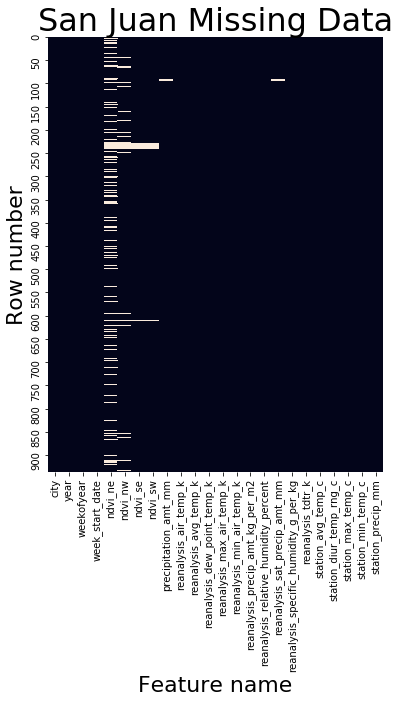

In [3]:
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(df_sj.isnull().reset_index(drop=True),ax=ax, cbar = False, yticklabels = 50)

plt.ylabel("Row number", size = 22)
plt.xlabel("Feature name", size = 22)
plt.title("San Juan Missing Data", size = 32)

### Iquitos

In [4]:
df_iq = features_train[features_train['city'] == 'iq']
missing_values_count = df_iq.isnull().sum()
missing_values_count

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

***We can notice that there are missing values for particular short intervals of time for Iquitos***

Text(0.5,1,'Iquitos Missing Data')

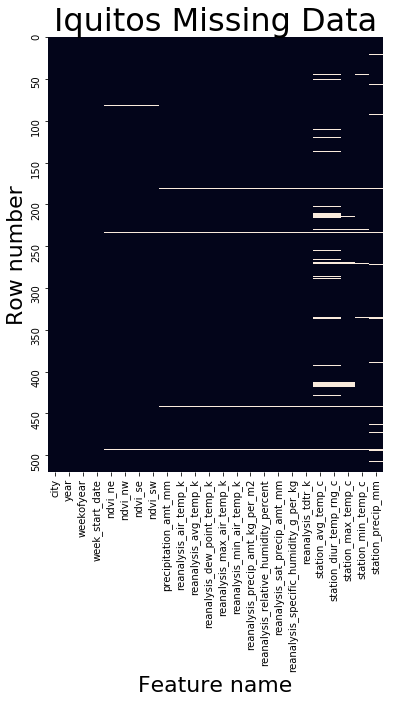

In [5]:
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(df_iq.isnull().reset_index(drop=True),ax=ax, cbar = False, yticklabels = 50)

plt.ylabel("Row number", size = 22)
plt.xlabel("Feature name", size = 22)
plt.title("Iquitos Missing Data", size = 32)

### How did we handle missing values?

We handled missing values by using Forward Fill.

## Take a peak at the Training Data

We do not look at testing data before model validation ever as it influences our decision making when making models. 

In [6]:
print("Training Features")
features_train.sample(3)

Training Features


city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
1420   iq  2009          43      2009-10-22   0.2968  0.308486  0.362300   
441    sj  1998          43      1998-10-22   0.0213  0.085000  0.196967   
415    sj  1998          17      1998-04-23   0.0671  0.091367  0.144486   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
1420  0.361657                 82.59             298.855714   
441   0.196200                 32.09             300.247143   
415   0.147957                 22.22             297.735714   

            ...          reanalysis_precip_amt_kg_per_m2  \
1420        ...                                     67.4   
441         ...                                     36.5   
415         ...                                     24.3   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1420                             90.657143                         82.59   
441                              82.038571                         32.09   
415                              77.712857                         22.22   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1420                              18.661429           8.571429   
441                               18.410000           2.128571   
415                               15.014286           2.157143   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1420           27.733333                12.200000                35.3   
441            28.157143                 6.928571                33.9   
415            25.600000                 5.857143                29.4   

      station_min_temp_c  station_precip_mm  
1420                21.0              137.1  
441                 23.9               26.7  
415                 21.7               73.4  

[3 rows x 24 columns]

In [7]:
print("Training Labels")
labels_train.sample(3)

Training Labels


city  year  weekofyear  total_cases
510   sj  2000           7            7
867   sj  2007           1           10
361   sj  1997          15           11

### General Column Names & Data Types

**City and Date Indicators**
- **city** – City abbreviations: sj for San Juan and iq for Iquitos
- **year** - Year
- **weekofyear** - Week Number
- **dayofyear** - Day of Year Number 
- **month** - Month Number of the Year
- **week_start_date** – Date given in yyyy-mm-dd format
- **total_cases** - Total Cases for that week
- **previous_week_cases** - Total Cases in the previous week
- **odd_year** - Whether year is odd or not


**Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements**
- **ndvi_ne** – Pixel northeast of city centroid
- **ndvi_nw** – Pixel northwest of city centroid
- **ndvi_se** – Pixel southeast of city centroid
- **ndvi_sw** – Pixel southwest of city centroid

**PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)**

- **precipitation_amt_mm – Total precipitation**

**NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)**

- **reanalysis_sat_precip_amt_mm** – Total precipitation
- **reanalysis_dew_point_temp_k** – Mean dew point temperature
- **reanalysis_air_temp_k** – Mean air temperature
- **reanalysis_relative_humidity_percent** – Mean relative humidity
- **reanalysis_specific_humidity_g_per_kg** – Mean specific humidity
- **reanalysis_precip_amt_kg_per_m2** – Total precipitation
- **reanalysis_max_air_temp_k** – Maximum air temperature
- **reanalysis_min_air_temp_k** – Minimum air temperature
- **reanalysis_avg_temp_k** – Average air temperature
- **reanalysis_tdtr_k** – Diurnal temperature range

**NOAA's GHCN daily climate data weather station measurements**

- **station_max_temp_c** – Maximum temperature
- **station_min_temp_c** – Minimum temperature
- **station_avg_temp_c** – Average temperature
- **station_precip_mm** – Total precipitation
- **station_diur_temp_rng_c** – Diurnal temperature range


**Note:** to avoid clutter we have not put the column names for our rolling average columns

# San Juan

In [8]:
data_sj = dp.features_train(features_train, labels_train, 'sj')
data_sj_n = dp.normalize(data_sj)
data_test_sj = dp.features_test(features_test, features_train, 'sj')
data_test_sj_n = dp.normalize(data_test_sj)

In [9]:
data_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'odd_year', 'ndvi_mean', 'ndvi_mean_rolling_avg', 'ndvi_ne_rolling_avg',
       'ndvi_nw_rolling_avg', 'ndvi_se_rolling_avg', 'ndvi_sw_rolling_avg',
       'precipitation_amt_mm_rolling_avg', 'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg',
       'reanalysis_max_air_temp_k_rolling_avg',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_am

## Understanding our Data

### Peek at San Juan Data
*Displaying the first 5 rows*

**Note: We have added Day of the Year and Odd Year and Month as as additional columns**

In [10]:
data_sj.head(5)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
50   sj  1991          16      1991-04-16  0.077400  0.102400  0.163550   
51   sj  1991          17      1991-04-23  0.077400  0.188450  0.188314   
52   sj  1991          18      1991-04-30  0.209167  0.160575  0.176171   
53   sj  1991          19      1991-05-07  0.115950  0.180175  0.106386   
54   sj  1991          20      1991-05-14  0.115950  0.104550  0.151150   

     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
50  0.206167                 44.57             297.284286   
51  0.224943                 32.72             298.074286   
52  0.176171                  0.00             298.831429   
53  0.111186                 35.38             298.638571   
54  0.096400                  4.16             298.325714   

                ...                reanalysis_max_air_temp_k_rolling_avg  \
50              ...                                              301.140   
51              ...                                              301.114   
52              ...                                              301.124   
53              ...                                              301.114   
54              ...                                              301.078   

    reanalysis_min_air_temp_k_rolling_avg  \
50                                297.034   
51                                297.040   
52                                297.036   
53                                297.040   
54                                297.022   

    reanalysis_precip_amt_kg_per_m2_rolling_avg  \
50                                      34.8350   
51                                      34.8702   
52                                      34.5158   
53                                      34.6498   
54                                      35.1132   

    reanalysis_relative_humidity_percent_rolling_avg  \
50                                         79.155286   
51                                         79.176857   
52                                         79.123000   
53                                         79.107086   
54                                         79.099229   

    reanalysis_tdtr_k_rolling_avg  station_avg_temp_c_rolling_avg  \
50                       2.347714                       26.902857   
51                       2.346286                       26.899143   
52                       2.356286                       26.911143   
53                       2.356000                       26.900286   
54                       2.345714                       26.852000   

    station_diur_temp_rng_c_rolling_avg  station_max_temp_c_rolling_avg  \
50                             7.331429                          31.860   
51                             7.364286                          31.882   
52                             7.388857                          31.882   
53                             7.392000                          31.850   
54                             7.336286                          31.762   

    station_min_temp_c_rolling_avg  station_precip_mm_rolling_avg  
50                          22.086                         21.854  
51                          22.076                         21.752  
52                          22.076                         20.980  
53                          22.066                         21.704  
54                          22.044                         22.244  

[5 rows x 45 columns]

### Summary for San Juan Data

#### Key Insights:

**1. Total Cases:** Mean: 34.212834	Standard Dev: 51.399375

**2. Average Temperature:** Mean: 299.273178 Standard Dev: 1.219425

**3. Precipitation in mm:** Mean: 35.340973	Standard Dev: 44.672851

**4. Humidity per kg:** Mean: 16.550246 Standard Dev: 1.559292

In [11]:
data_sj.describe().T

count         mean  \
year                                              886.0  1999.308126   
weekofyear                                        886.0    26.480813   
ndvi_ne                                           886.0     0.051028   
ndvi_nw                                           886.0     0.059181   
ndvi_se                                           886.0     0.174379   
ndvi_sw                                           886.0     0.163999   
precipitation_amt_mm                              886.0    35.505632   
reanalysis_air_temp_k                             886.0   299.174070   
reanalysis_avg_temp_k                             886.0   299.286448   
reanalysis_dew_point_temp_k                       886.0   295.113696   
reanalysis_max_air_temp_k                         886.0   301.406433   
reanalysis_min_air_temp_k                         886.0   297.312867   
reanalysis_precip_amt_kg_per_m2                   886.0    30.139537   
reanalysis_relative_humidity_percent              886.0    78.537296   
reanalysis_tdtr_k                                 886.0     2.523396   
station_avg_temp_c                                886.0    27.004708   
station_diur_temp_rng_c                           886.0     6.721961   
station_max_temp_c                                886.0    31.582167   
station_min_temp_c                                886.0    22.623928   
station_precip_mm                                 886.0    27.037359   
total_cases                                       886.0    34.770880   
month                                             886.0     6.413093   
ndvi_mean                                         886.0     0.112147   
ndvi_mean_rolling_avg                             886.0     0.115907   
ndvi_ne_rolling_avg                               886.0     0.057172   
ndvi_nw_rolling_avg                               886.0     0.065999   
ndvi_se_rolling_avg                               886.0     0.175246   
ndvi_sw_rolling_avg                               886.0     0.165212   
precipitation_amt_mm_rolling_avg                  886.0    35.524514   
reanalysis_air_temp_k_rolling_avg                 886.0   299.163491   
reanalysis_avg_temp_k_rolling_avg                 886.0   299.277186   
reanalysis_dew_point_temp_k_rolling_avg           886.0   295.120660   
reanalysis_max_air_temp_k_rolling_avg             886.0   301.401984   
reanalysis_min_air_temp_k_rolling_avg             886.0   297.306108   
reanalysis_precip_amt_kg_per_m2_rolling_avg       886.0    30.421307   
reanalysis_relative_humidity_percent_rolling_avg  886.0    78.620778   
reanalysis_tdtr_k_rolling_avg                     886.0     2.516519   
station_avg_temp_c_rolling_avg                    886.0    27.011856   
station_diur_temp_rng_c_rolling_avg               886.0     6.758192   
station_max_temp_c_rolling_avg                    886.0    31.613230   
station_min_temp_c_rolling_avg                    886.0    22.602619   
station_precip_mm_rolling_avg                     886.0    26.883235   

                                                        std          min  \
year                                               4.934472  1991.000000   
weekofyear                                        15.013259     1.000000   
ndvi_ne                                            0.102386    -0.406250   
ndvi_nw                                            0.086382    -0.456100   
ndvi_se                                            0.057095    -0.015533   
ndvi_sw                                            0.055124    -0.063457   
precipitation_amt_mm                              44.926028     0.000000   
reanalysis_air_temp_k                              1.239851   295.938571   
reanalysis_avg_temp_k                              1.223895   296.114286   
reanalysis_dew_point_temp_k                        1.565015   289.642857   
reanalysis_max_air_temp_k                          1.262127   297.800000   
reanalysis_min_air_temp_k                

### Looking for outliers in our Data

***From the plot below we notice that there are outliers in total cases for the past so many years between 90 and 500 cases***

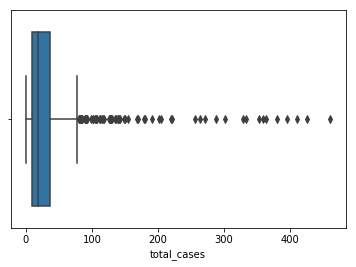

In [12]:
sns.boxplot(x=data_sj['total_cases'])

***Looking at the plot below, we can most of data points are lying bottom left side but there are points which are far from the population like top left & bottom right corner.***

**This also indicates that higher rainfall does not necessarrily lead to higher total number of cases for the week**

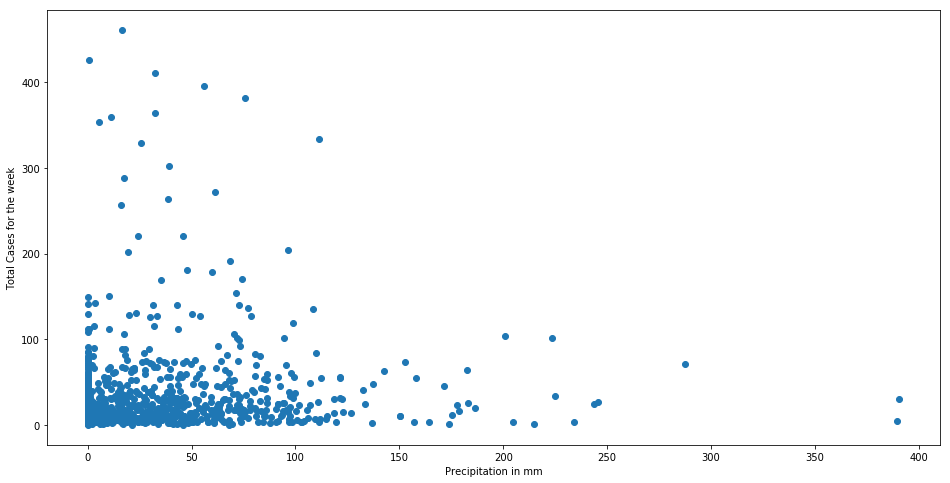

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_sj['precipitation_amt_mm'],data_sj['total_cases'])
ax.set_xlabel('Precipitation in mm')
ax.set_ylabel('Total Cases for the week')
plt.show()

***We will handle our outliers after exploring our data further. This is so that we get a better understanding of the domain before we remove or reset outliers.***

Below is the same scatter plot with each dot colored by month

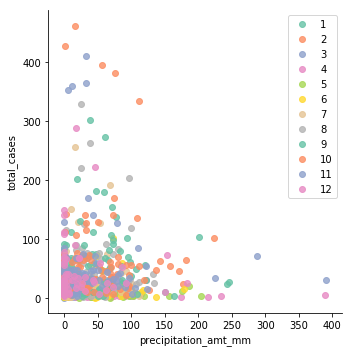

In [14]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="precipitation_amt_mm", y="total_cases", data=data_sj, fit_reg=False, 
           hue='month', legend=False, palette="Set2")
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

Below is a scatter plot with each dot colored by month

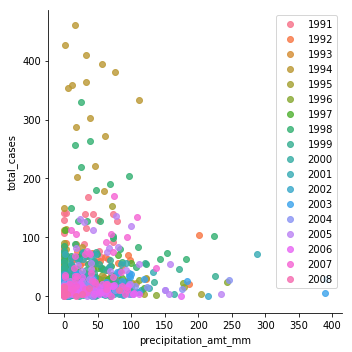

In [15]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="precipitation_amt_mm", y="total_cases", data=data_sj, fit_reg=False, 
           hue='year', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

Below is a bar chart showing the average number of cases in each week for each year. We notice that the average for the years 94 and 98 are extremely high this may be due to outliers for these years. We will get to see this in the EDA.

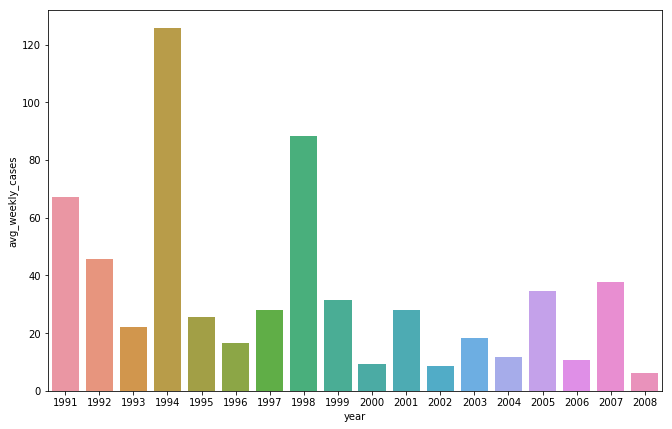

In [16]:
weekly_avg_sj = pd.DataFrame(data_sj.groupby(['year'])['total_cases'].mean().reset_index(name='avg_weekly_cases'))
plt.subplots(figsize=(11,7))
sns.barplot(x='year', y='avg_weekly_cases', data=weekly_avg_sj)

## Exploring our Data

**Our first step in exploring the data was to see Dengue changed with time. The reason we decided on this was to see how Dengue changed with time and if there was any seasonality.**


As Alex Freemain points out in his EDA on Github, the spikes in the time-series are obvious outbreaks. It will be important to predict these outbreaks for health reasons and hence predicting just the general cyclic trend of Dengue will not be enough. 

Below we will notice that the number of visualizations for each week are not consitent and vary with depending on the time of year. This can be a seasonlity trend as we will also notice that the rainfall received changes with time, during which the mosquitoes come out, bite and spread dengue.

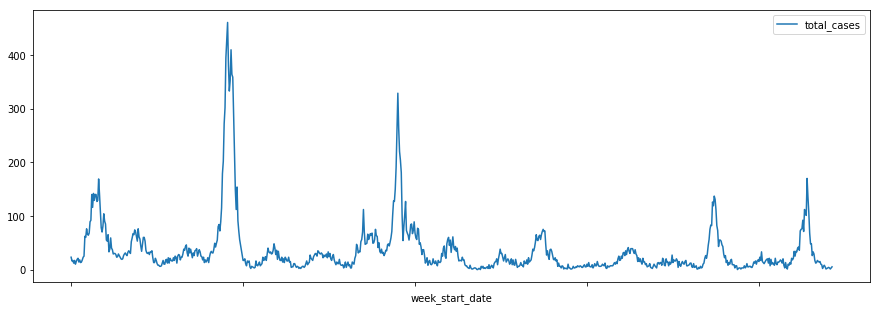

In [17]:
data_sj.plot(x='week_start_date', y='total_cases', figsize = (15,5))

### Facet Scatter Plot of Total Cases each week in San Juan

#### Exploring the total number of cases (y) in each week for each year(x)


- There appears to be a significant change in the total number of cases during the latter half of the weeks of the year.

**While the facet scatter plot has helped us identify the change, it will help to map this out through a simple wide scatter plot for San Juan**

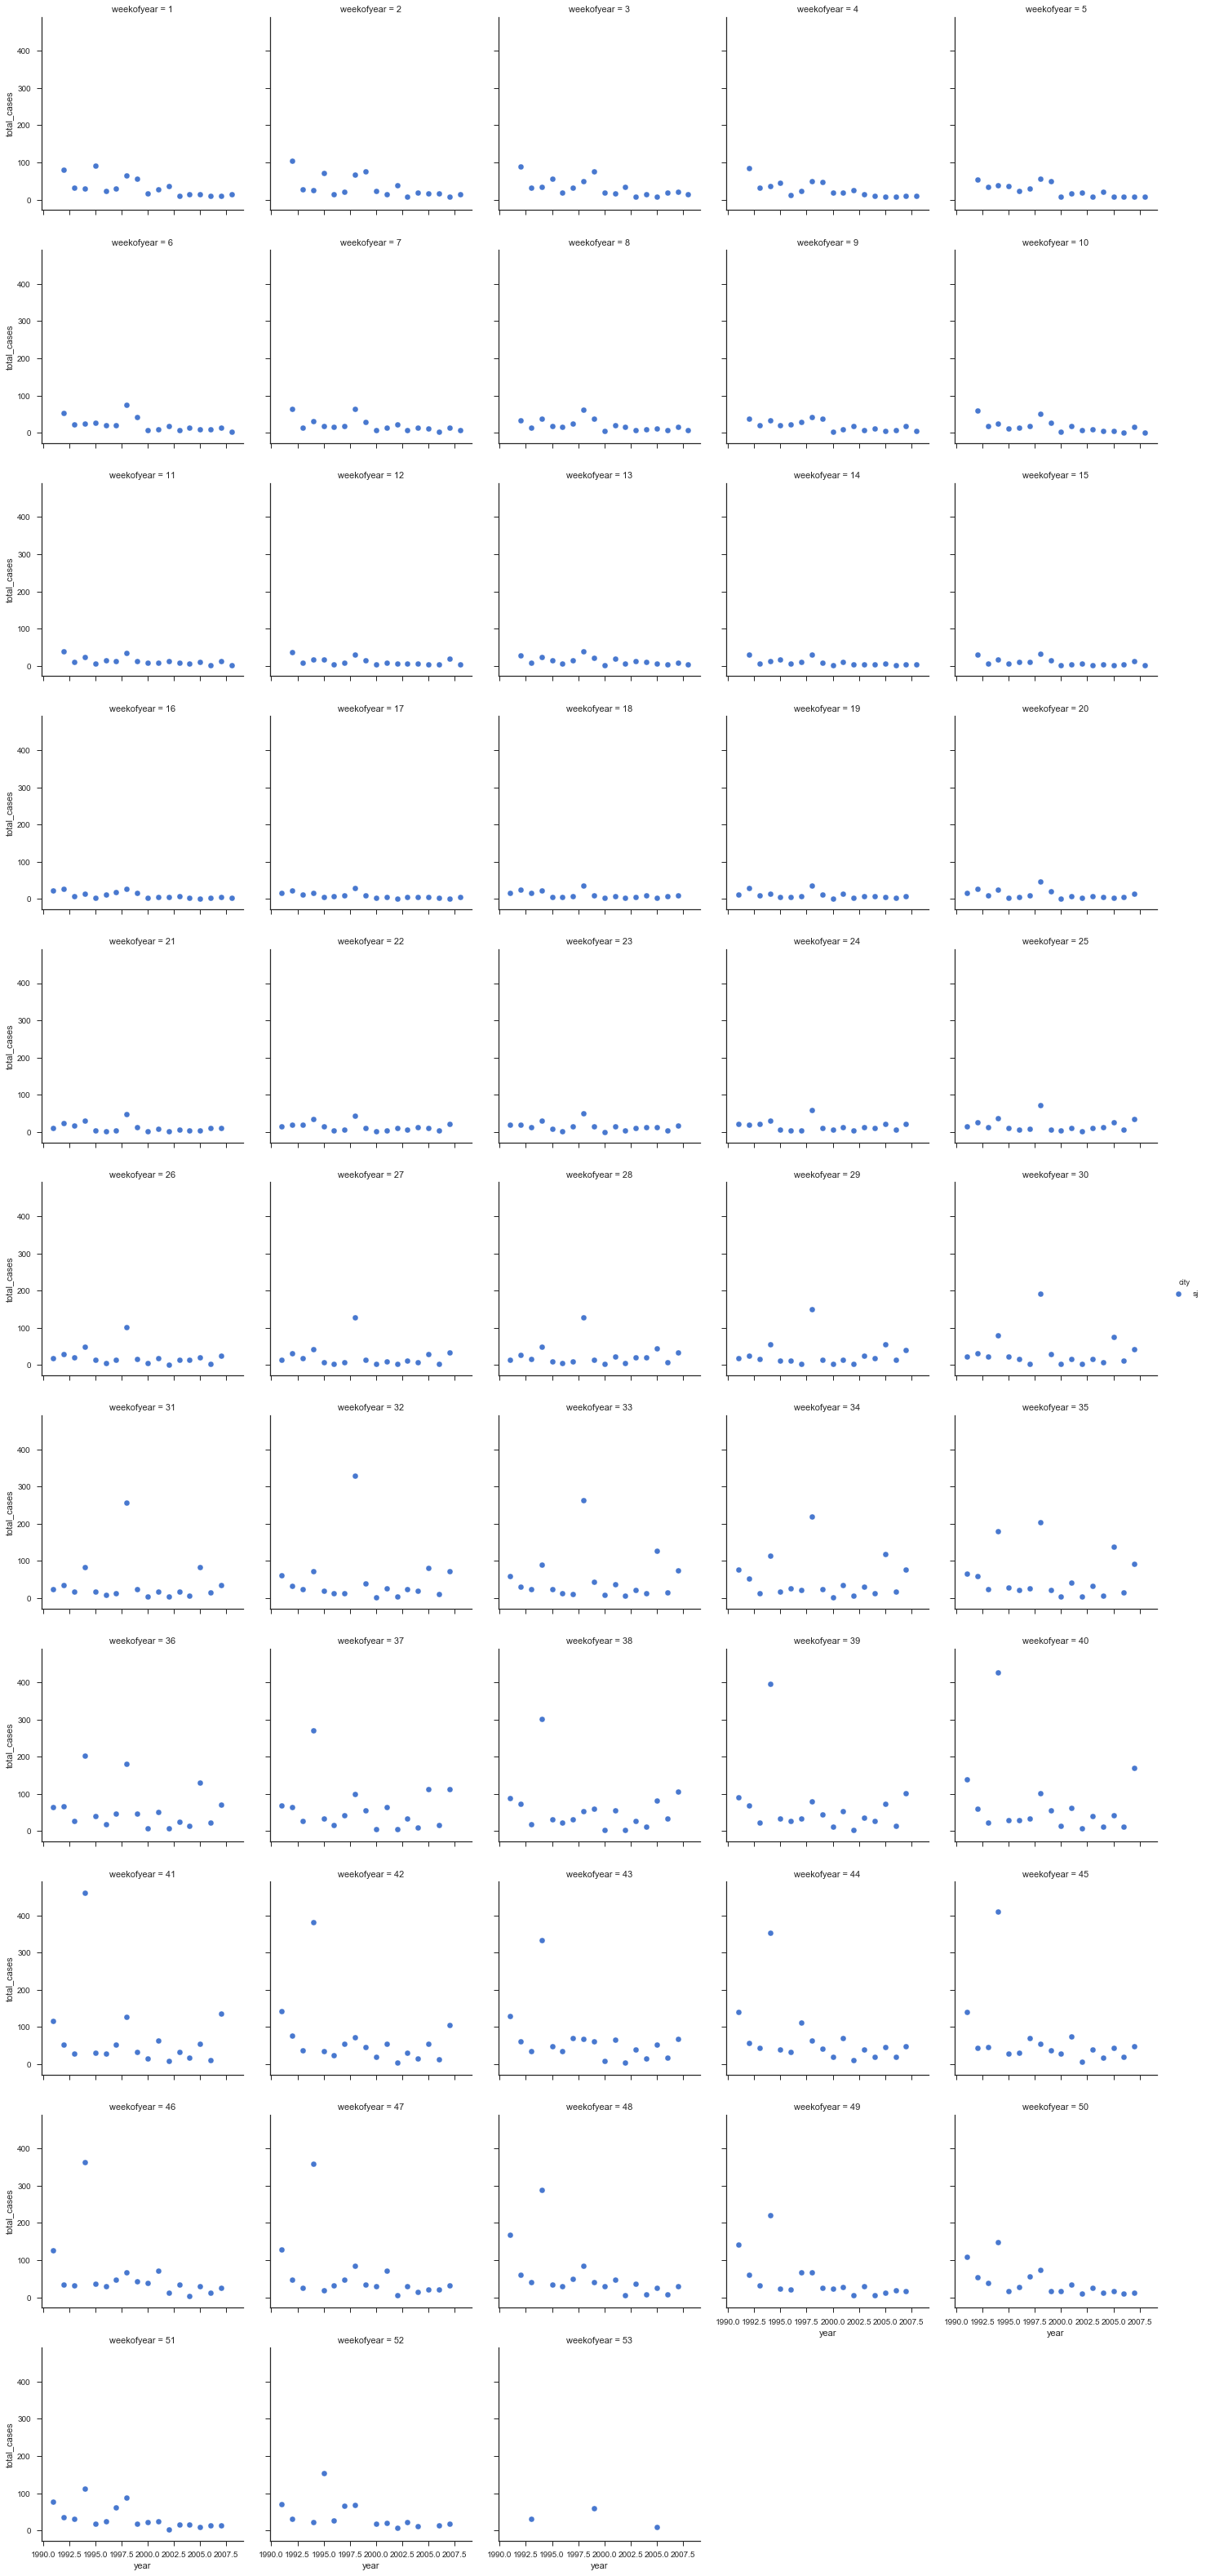

In [18]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_sj, col="weekofyear",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "year", "total_cases", edgecolor="w").add_legend())

### Simplified Scatter Chart of Total Cases by each week in San Juan

**Key Insights:**

- In San Juan, for weeks 25 - 50, we can see there are outliers where the numbers of cases is larger than the normal amount of cases. This can be due to an outbreak in the city on different occassions. 

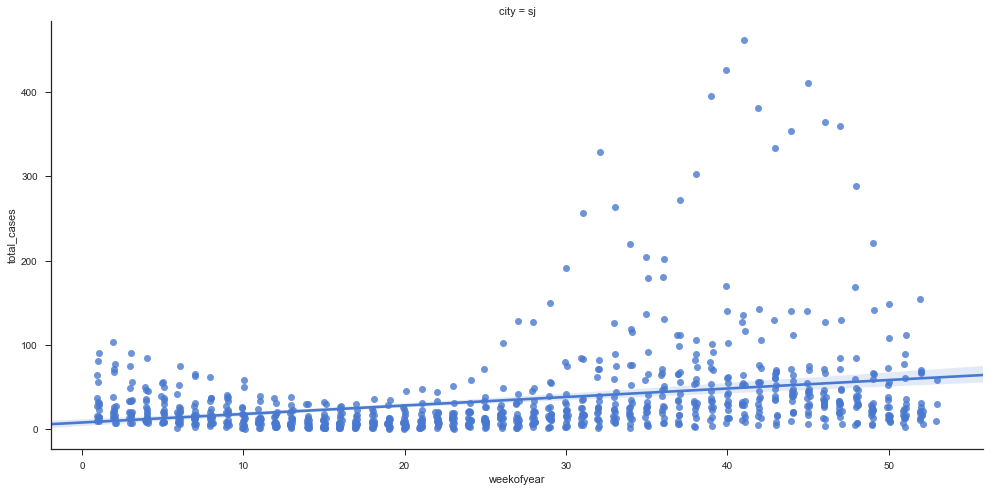

In [19]:
g = sns.lmplot(x="weekofyear", y="total_cases", hue="city", col="city", data=data_sj, aspect= 2, size = 7, x_jitter=.1)

### Facet Chart of Total Number of Cases (y) for each month(x) by Year

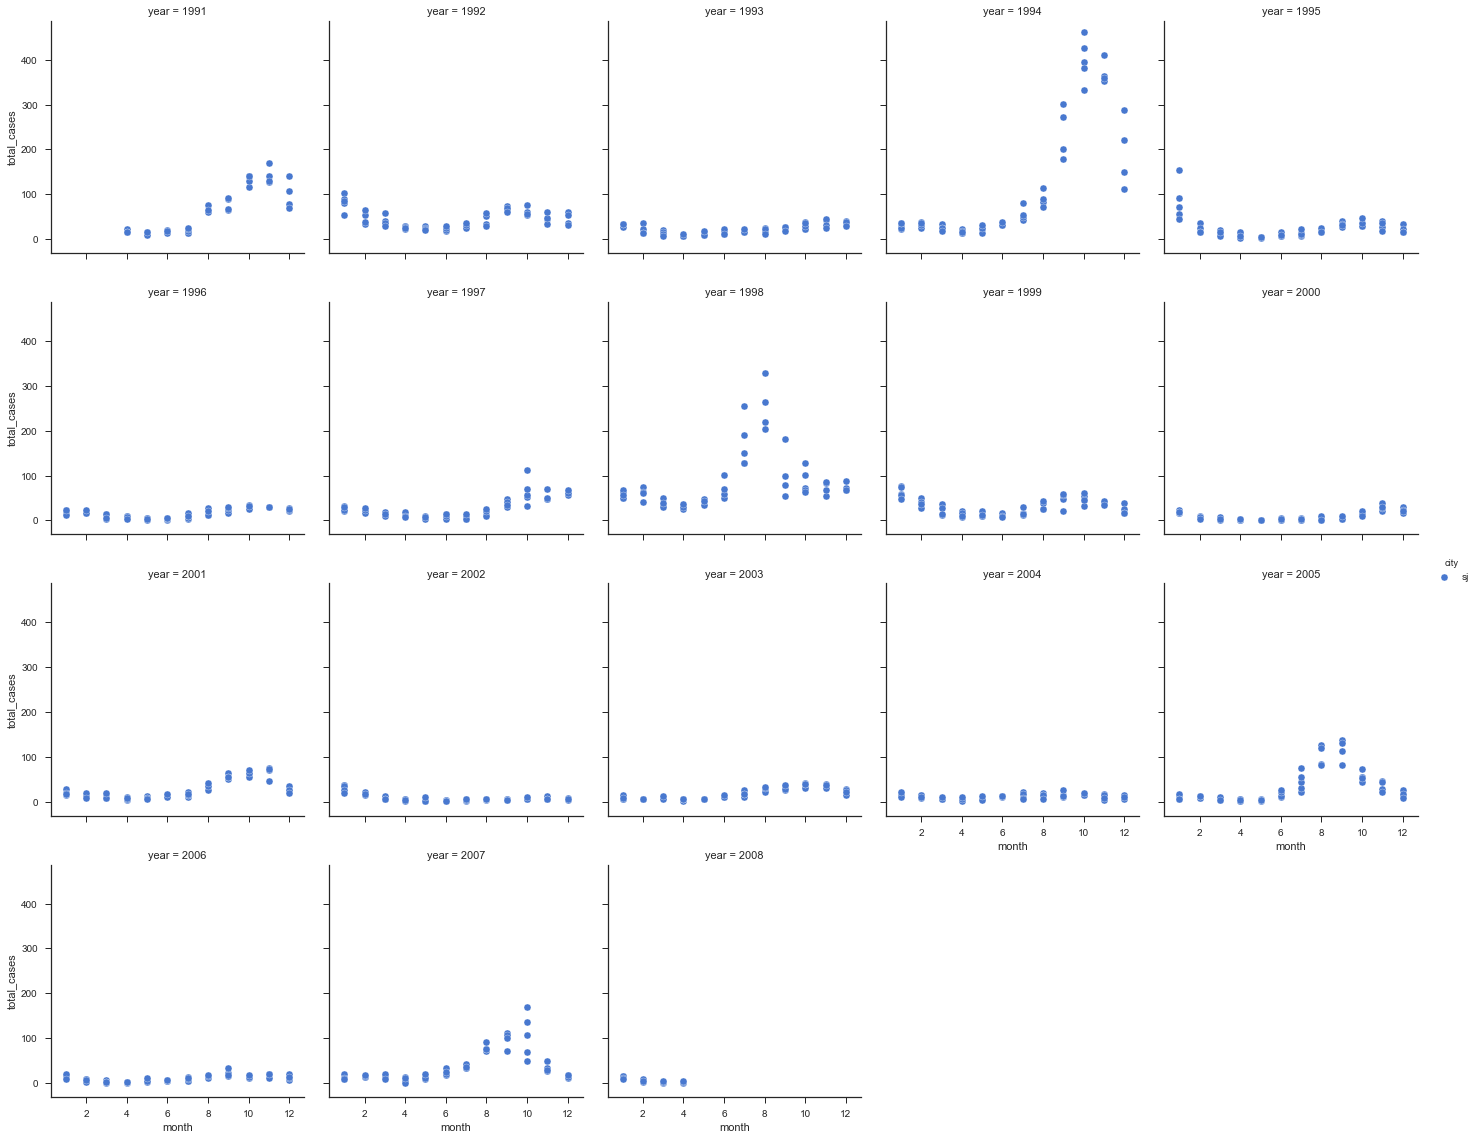

In [20]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_sj, col="year",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "month", "total_cases", edgecolor="w").add_legend())

### Facet Chart of Total Cases for each year

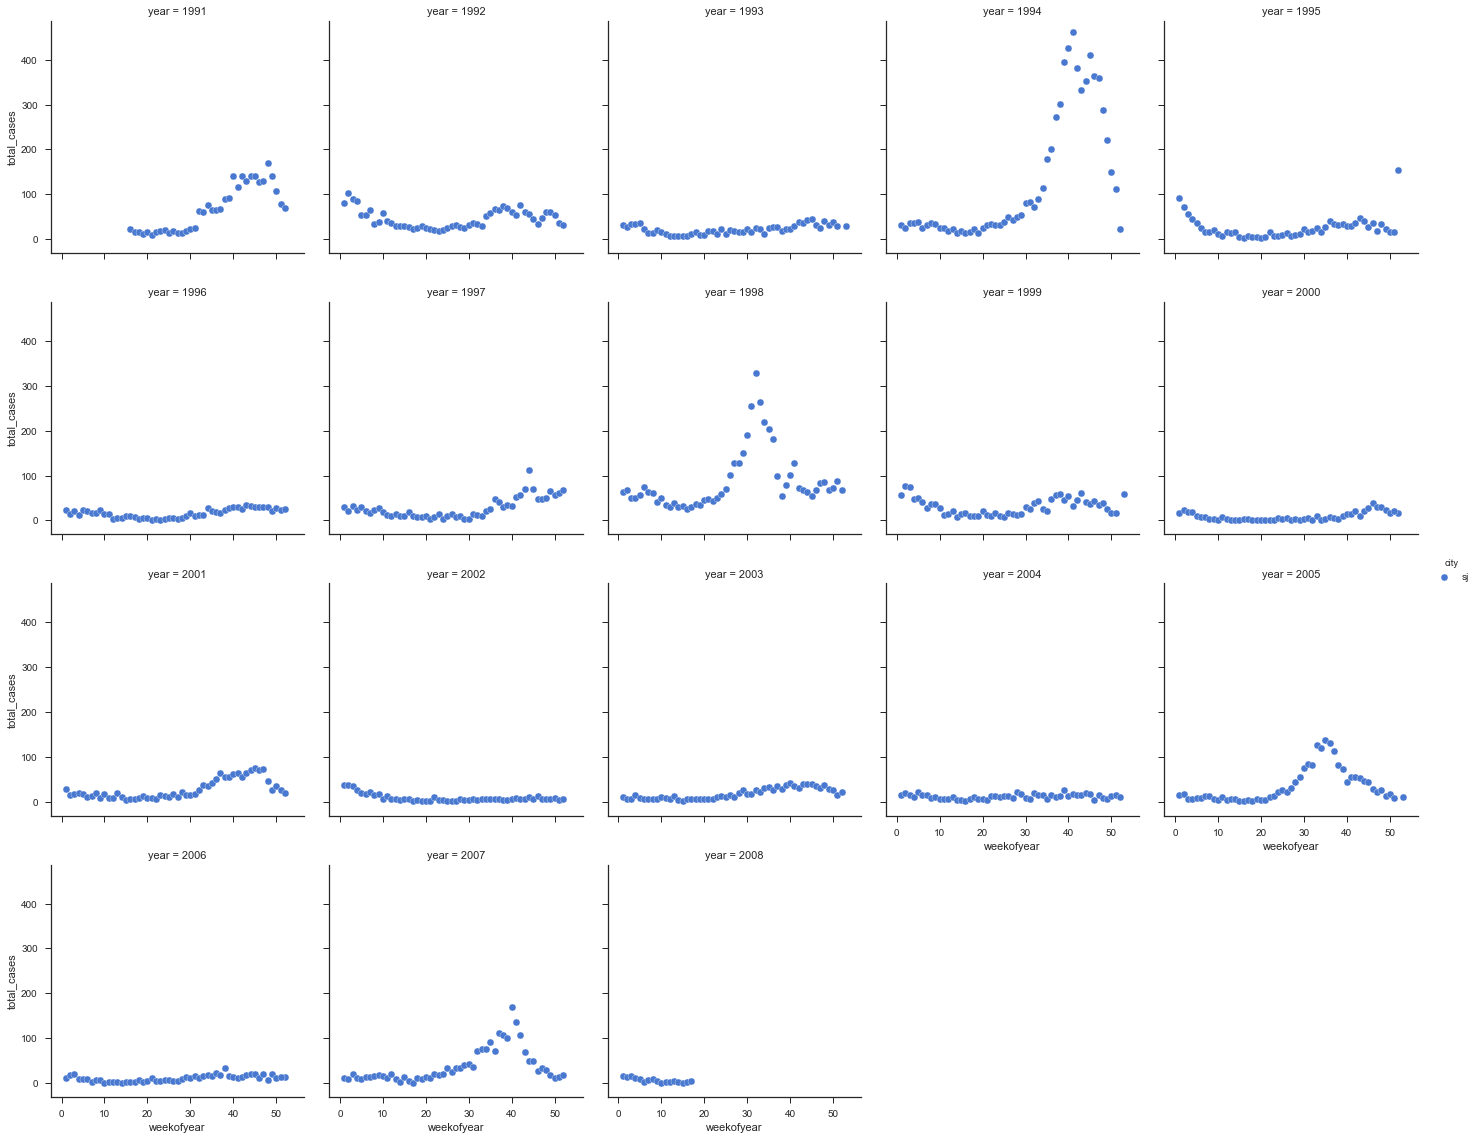

In [21]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_sj, col="year",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "weekofyear", "total_cases", edgecolor="w").add_legend())

### Facet Chart of Temperature (y) for each week (x) by Year

**Key Insight: We notice that the temperature range for all years lies between 296 K and 302 K**

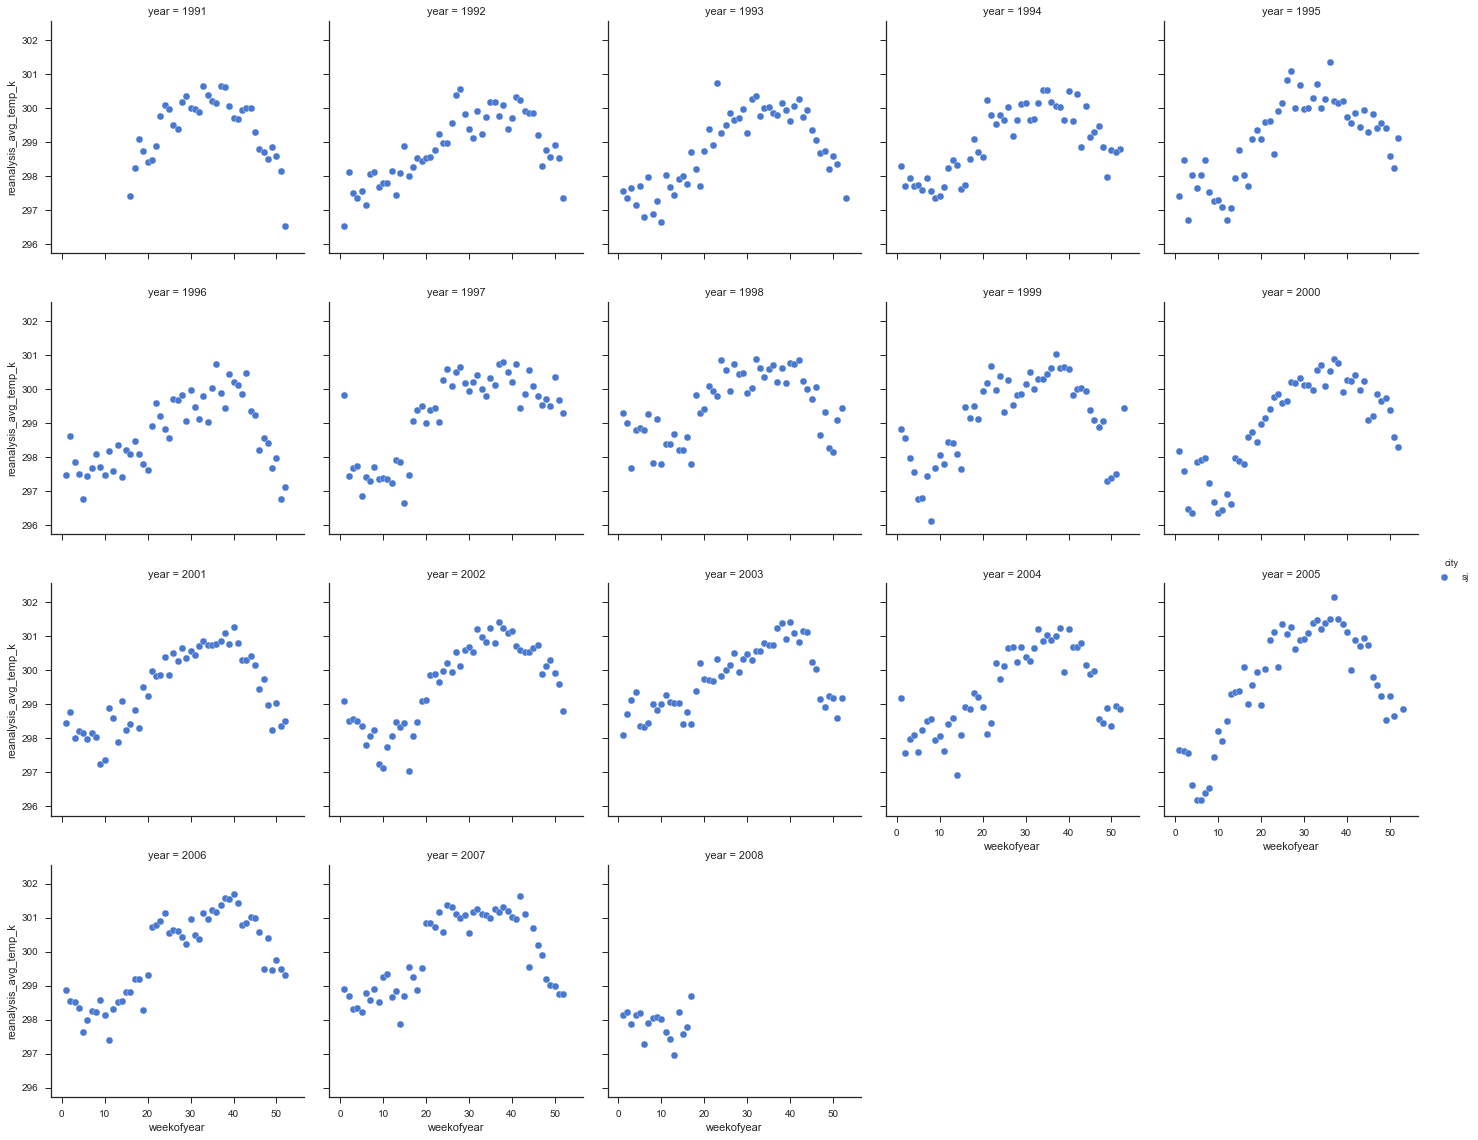

In [22]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_sj, col="year",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "weekofyear", "reanalysis_avg_temp_k", edgecolor="w").add_legend())

### Precipitation (y) for each week(x) by Year

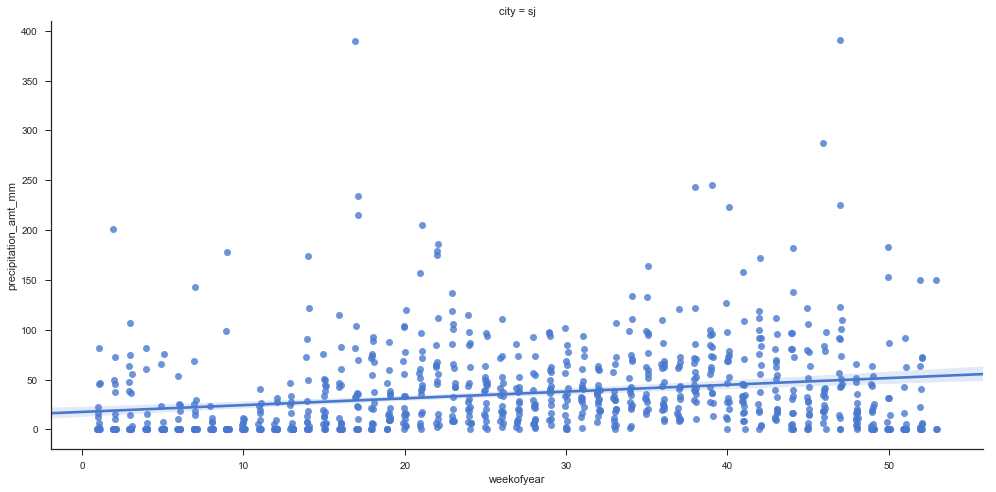

In [23]:
g = sns.lmplot(x="weekofyear", y="precipitation_amt_mm", hue="city", col="city", data=data_sj, aspect= 2, size = 7, x_jitter=.1)

### Plotting Change in Total Dengue Cases & Precipitation by Week

#### Dengue Cases
**Key Insights:**

- In San Juan, year over year we can see an increase in the total cases starting Week 24, which rollsover to Week 11 in the next year

Text(0.5,1,'Growth of Dengue with Time - Weekly Breakdown for all years in San Juan')

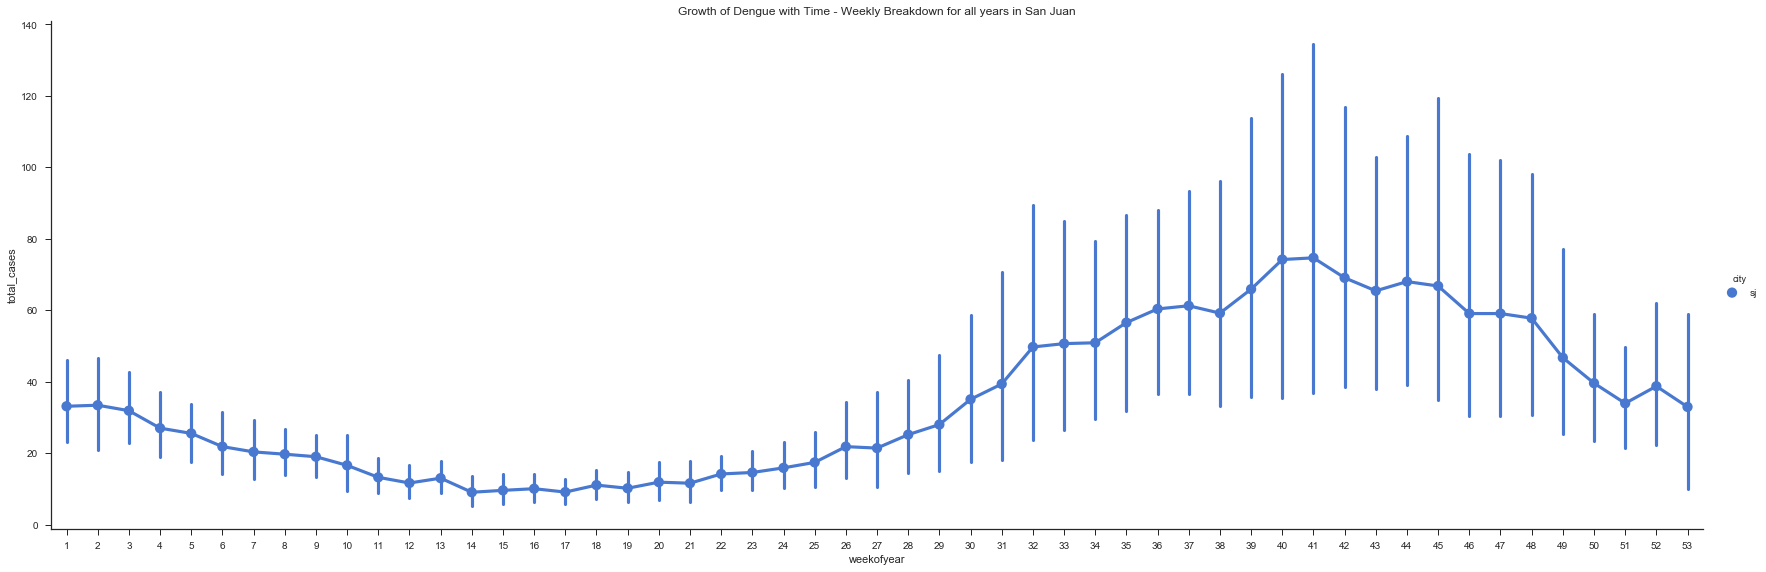

In [24]:
sns.factorplot(x="weekofyear", y="total_cases", hue="city", size=8, aspect=3,data=data_sj)
plt.title("Growth of Dengue with Time - Weekly Breakdown for all years in San Juan")

#### Precipitation

**Key Insights from both charts below:**

- On average San Juan receives heavy rainfall from week 14 to week 47

Text(0.5,1,'Precipitation Change with Time - Weekly Breakdown - for all years in San Juan ')

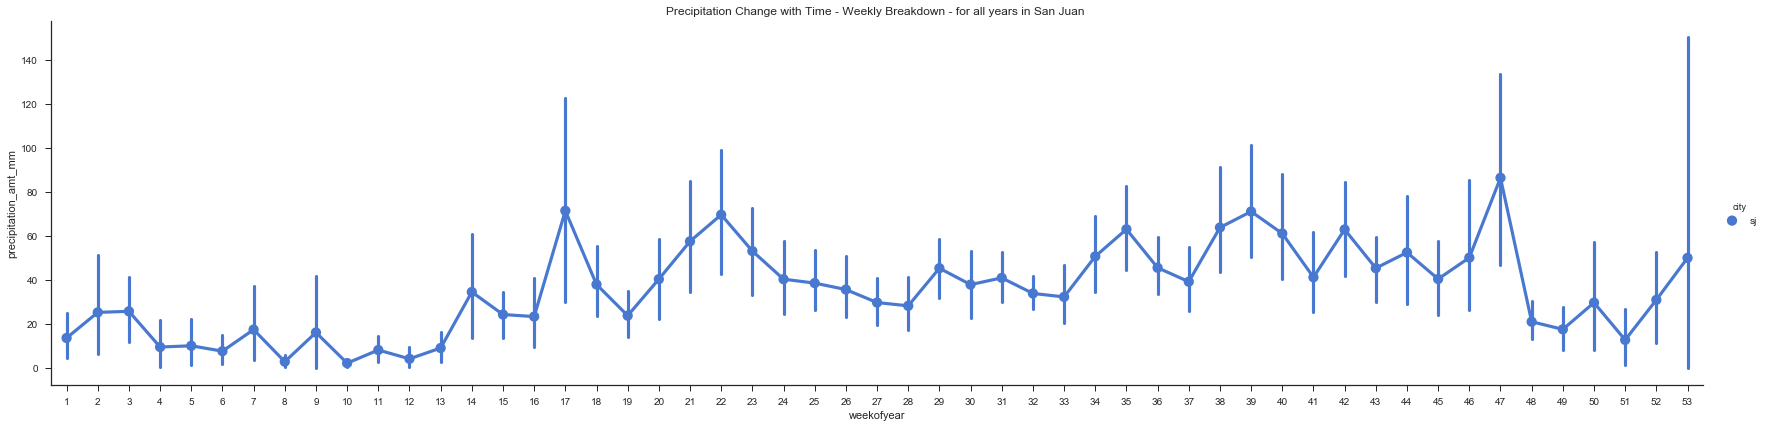

In [25]:
sns.factorplot(x="weekofyear", y="precipitation_amt_mm", hue="city", size=6, aspect=4,data=data_sj)
plt.title("Precipitation Change with Time - Weekly Breakdown - for all years in San Juan ")

### Correlation Heat Map

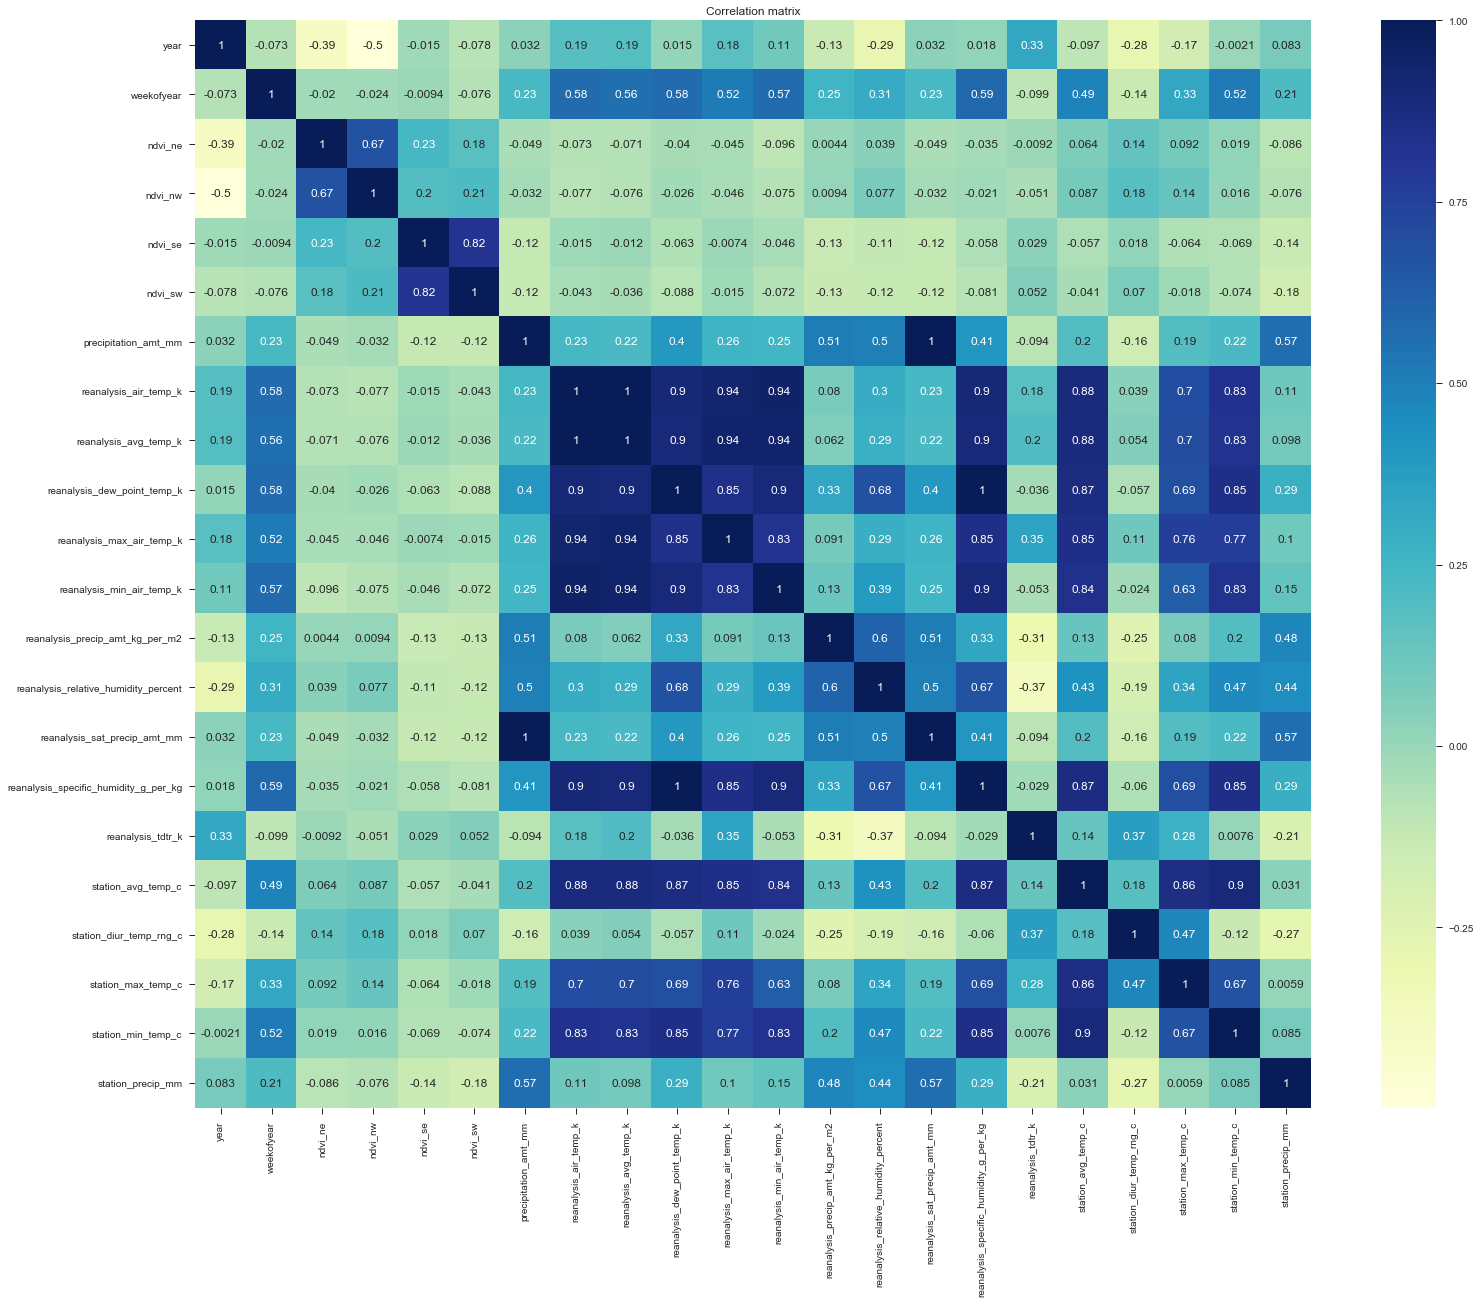

In [26]:
plt.figure(figsize=(25,20))
plt.title('Correlation matrix')
sns.heatmap(df_sj.corr(), cmap="YlGnBu", annot = True)

**As mentioned in the Benchmark file by Driven Data:**

Many of the temperature data are strongly correlated, which is expected. But the total_cases variable doesn't have many obvious strong correlations.
Interestingly, total_cases seems to only have weak correlations with other variables. Many of the climate variables are much more strongly correlated. Interestingly, the vegetation index also only has weak correlation with other variables. These correlations may give us some hints as to how to improve our model.

## Correlation for Dengue Cases
The graphs below represent correlation of the dependent variable 'Dengue Cases' with the environmental and climate variables in San Juan. We checked the correlation between the given variables with the percent dengue cases each week with respect to year. Using weekly dengue cases percentage values we standardized the data resulting in better correlation with the variables. Since the region and climate of two cities is different, we can see there is a significant difference in the correlation behavior of our variables among two cities.

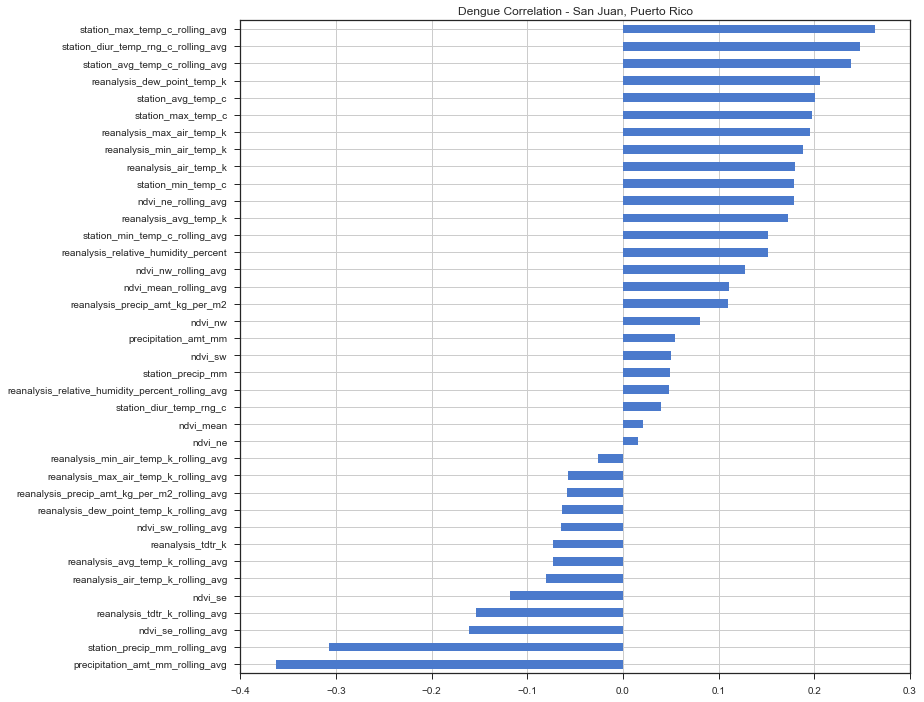

In [27]:
#Code to generate correlation graphs below for the two cities
corr_sj = data_sj.corr(method='pearson')
corr_sj = corr_sj['total_cases'].to_frame(name = 'corr_with_cases_sj')
corr_sj = corr_sj.sort_values(by=['corr_with_cases_sj'])
corr_sj = (corr_sj.drop('total_cases')
     .drop('year')
     .drop('month')
     .drop('weekofyear')
     .drop('odd_year'))
corr_sj.plot(kind='barh', title='Dengue Correlation - San Juan, Puerto Rico', xlim=(-.40,.30), grid = True, legend = False, color = '#4B7ACC', figsize=(12,12))

#### A few observations as mentioned in the benchmark file

###### The wetter the better
The correlation strengths differ for each city, but it looks like reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are the most strongly correlated with total_cases. This makes sense: we know mosquitos thrive wet climates, the wetter the better!

######  Hot and heavy
As we all know, "cold and humid" is not a thing. So it's not surprising that as minimum temperatures, maximum temperatures, and average temperatures rise, the total_cases of dengue fever tend to rise as well.

######  Sometimes it rains, so what
Interestingly, the precipitation measurements bear little to no correlation to total_cases, despite strong correlations to the humidity measurements, as evident by the heatmaps above.

##### A few good variables as recommended by the Benchmark File

* reanalysis_specific_humidity_g_per_kg
* reanalysis_dew_point_temp_k
* station_avg_temp_c
* station_min_temp_c

## Outlier Engineering for San Juan

As we noticed earlier there are outliers in our dataset. Let us see how many outliers we have. However after testing our model we have seen that it will as we will not be able to predict the outbreaks. This is why we will not remove them.

In [28]:
data = data_sj['total_cases']
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 19
Non-outlier observations: 867


**From above we notice that we have 20 outliers (outside of 3 S.D. for total cases in San Juan) and we have 916 non-outlier observations for total cases**

In [29]:
dp.remove_outliers(data_sj).head(4)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
50   sj  1991          16      1991-04-16  0.077400  0.102400  0.163550   
51   sj  1991          17      1991-04-23  0.077400  0.188450  0.188314   
52   sj  1991          18      1991-04-30  0.209167  0.160575  0.176171   
53   sj  1991          19      1991-05-07  0.115950  0.180175  0.106386   

     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
50  0.206167                 44.57             297.284286   
51  0.224943                 32.72             298.074286   
52  0.176171                  0.00             298.831429   
53  0.111186                 35.38             298.638571   

                ...                reanalysis_max_air_temp_k_rolling_avg  \
50              ...                                              301.140   
51              ...                                              301.114   
52              ...                                              301.124   
53              ...                                              301.114   

    reanalysis_min_air_temp_k_rolling_avg  \
50                                297.034   
51                                297.040   
52                                297.036   
53                                297.040   

    reanalysis_precip_amt_kg_per_m2_rolling_avg  \
50                                      34.8350   
51                                      34.8702   
52                                      34.5158   
53                                      34.6498   

    reanalysis_relative_humidity_percent_rolling_avg  \
50                                         79.155286   
51                                         79.176857   
52                                         79.123000   
53                                         79.107086   

    reanalysis_tdtr_k_rolling_avg  station_avg_temp_c_rolling_avg  \
50                       2.347714                       26.902857   
51                       2.346286                       26.899143   
52                       2.356286                       26.911143   
53                       2.356000                       26.900286   

    station_diur_temp_rng_c_rolling_avg  station_max_temp_c_rolling_avg  \
50                             7.331429                          31.860   
51                             7.364286                          31.882   
52                             7.388857                          31.882   
53                             7.392000                          31.850   

    station_min_temp_c_rolling_avg  station_precip_mm_rolling_avg  
50                          22.086                         21.854  
51                          22.076                         21.752  
52                          22.076                         20.980  
53                          22.066                         21.704  

[4 rows x 45 columns]

# Iquitos

In [30]:
# Iquitos
data_iq = dp.features_train(features_train, labels_train, 'iq')
data_iq_n = dp.normalize(data_iq)
data_test_iq = dp.features_test(features_test, features_train, 'iq')
data_test_iq_n = dp.normalize(data_test_iq)

## Understanding our Data

### Peek at Iquitos Data
*Displaying the first 5 rows*

**Note: We have added Day of the Year and Odd Year and Month as as additional columns**

In [31]:
data_iq.head(5)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
50   iq  2001          25      2001-06-18  0.104100  0.108243  0.059657   
51   iq  2001          26      2001-06-25  0.192300  0.275286  0.316457   
52   iq  2001          27      2001-07-02  0.229083  0.193267  0.270457   
53   iq  2001          28      2001-07-09  0.359717  0.311057  0.264986   
54   iq  2001          29      2001-07-16  0.319500  0.205086  0.194743   

     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
50  0.113757                 53.93             296.000000   
51  0.325414                  1.22             294.845714   
52  0.242186                 52.10             295.795714   
53  0.438843                 39.09             295.808571   
54  0.361633                 52.05             297.555714   

                ...                reanalysis_max_air_temp_k_rolling_avg  \
50              ...                                              307.610   
51              ...                                              307.600   
52              ...                                              307.610   
53              ...                                              307.682   
54              ...                                              307.700   

    reanalysis_min_air_temp_k_rolling_avg  \
50                                292.272   
51                                292.218   
52                                292.192   
53                                292.226   
54                                292.218   

    reanalysis_precip_amt_kg_per_m2_rolling_avg  \
50                                      46.7536   
51                                      45.8700   
52                                      45.0466   
53                                      44.9014   
54                                      44.6254   

    reanalysis_relative_humidity_percent_rolling_avg  \
50                                         84.624486   
51                                         84.339314   
52                                         84.119486   
53                                         84.141257   
54                                         84.062943   

    reanalysis_tdtr_k_rolling_avg  station_avg_temp_c_rolling_avg  \
50                      10.185143                       27.113110   
51                      10.225714                       27.103110   
52                      10.249143                       27.097110   
53                      10.260857                       27.128776   
54                      10.299429                       27.132110   

    station_diur_temp_rng_c_rolling_avg  station_max_temp_c_rolling_avg  \
50                            11.223867                          33.964   
51                            11.193533                          33.930   
52                            11.191533                          33.934   
53                            11.199867                          33.974   
54                            11.171600                          33.964   

    station_min_temp_c_rolling_avg  station_precip_mm_rolling_avg  
50                          20.418                         46.730  
51                          20.344                         46.238  
52                          20.330                         46.878  
53                          20.426                         46.724  
54                          20.464                         47.380  

[5 rows x 45 columns]

## Summary for Iquitos Data

In [32]:
data_iq.describe().T

count         mean  \
year                                              470.0  2005.480851   
weekofyear                                        470.0    26.555319   
ndvi_ne                                           470.0     0.263711   
ndvi_nw                                           470.0     0.239630   
ndvi_se                                           470.0     0.247751   
ndvi_sw                                           470.0     0.267684   
precipitation_amt_mm                              470.0    64.678915   
reanalysis_air_temp_k                             470.0   297.874556   
reanalysis_avg_temp_k                             470.0   299.134316   
reanalysis_dew_point_temp_k                       470.0   295.599456   
reanalysis_max_air_temp_k                         470.0   307.004681   
reanalysis_min_air_temp_k                         470.0   292.939149   
reanalysis_precip_amt_kg_per_m2                   470.0    58.680085   
reanalysis_relative_humidity_percent              470.0    89.087781   
reanalysis_tdtr_k                                 470.0     9.084985   
station_avg_temp_c                                470.0    27.548163   
station_diur_temp_rng_c                           470.0    10.399840   
station_max_temp_c                                470.0    33.968511   
station_min_temp_c                                470.0    21.294255   
station_precip_mm                                 470.0    63.175957   
total_cases                                       470.0     8.355319   
month                                             470.0     6.417021   
ndvi_mean                                         470.0     0.254694   
ndvi_mean_rolling_avg                             470.0     0.254757   
ndvi_ne_rolling_avg                               470.0     0.264432   
ndvi_nw_rolling_avg                               470.0     0.239183   
ndvi_se_rolling_avg                               470.0     0.248357   
ndvi_sw_rolling_avg                               470.0     0.267057   
precipitation_amt_mm_rolling_avg                  470.0    65.075334   
reanalysis_air_temp_k_rolling_avg                 470.0   297.828192   
reanalysis_avg_temp_k_rolling_avg                 470.0   299.084070   
reanalysis_dew_point_temp_k_rolling_avg           470.0   295.513967   
reanalysis_max_air_temp_k_rolling_avg             470.0   306.972136   
reanalysis_min_air_temp_k_rolling_avg             470.0   292.872174   
reanalysis_precip_amt_kg_per_m2_rolling_avg       470.0    57.189437   
reanalysis_relative_humidity_percent_rolling_avg  470.0    88.905583   
reanalysis_tdtr_k_rolling_avg                     470.0     9.119981   
station_avg_temp_c_rolling_avg                    470.0    27.516075   
station_diur_temp_rng_c_rolling_avg               470.0    10.423599   
station_max_temp_c_rolling_avg                    470.0    33.939579   
station_min_temp_c_rolling_avg                    470.0    21.245689   
station_precip_mm_rolling_avg                     470.0    64.128596   

                                                        std          min  \
year                                               2.643465  2001.000000   
weekofyear                                        15.045918     1.000000   
ndvi_ne                                            0.082528     0.061729   
ndvi_nw                                            0.076005     0.058950   
ndvi_se                                            0.077269     0.029880   
ndvi_sw                                            0.087281     0.064743   
precipitation_amt_mm                              35.520757     0.000000   
reanalysis_air_temp_k                              1.115203   294.635714   
reanalysis_avg_temp_k                              1.280958   294.892857   
reanalysis_dew_point_temp_k                        1.382201   290.088571   
reanalysis_max_air_temp_k                          2.303825   300.000000   
reanalysis_min_air_temp_k                

### Looking for outliers in our Data

***From the plot below we notice that there are outliers in total cases for the past so many years between 90 and 500 cases***

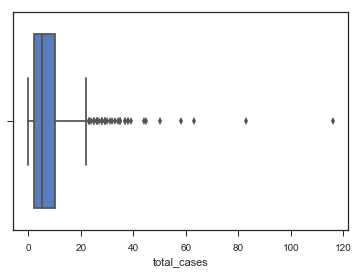

In [33]:
sns.boxplot(x=data_iq['total_cases'])

***Looking at the plot below, we can most of data points are lying bottom left side but there are points which are far from the population like top left & bottom right corner.***

**This also indicates that higher rainfall does not necessarrily lead to higher total number of cases for the week**

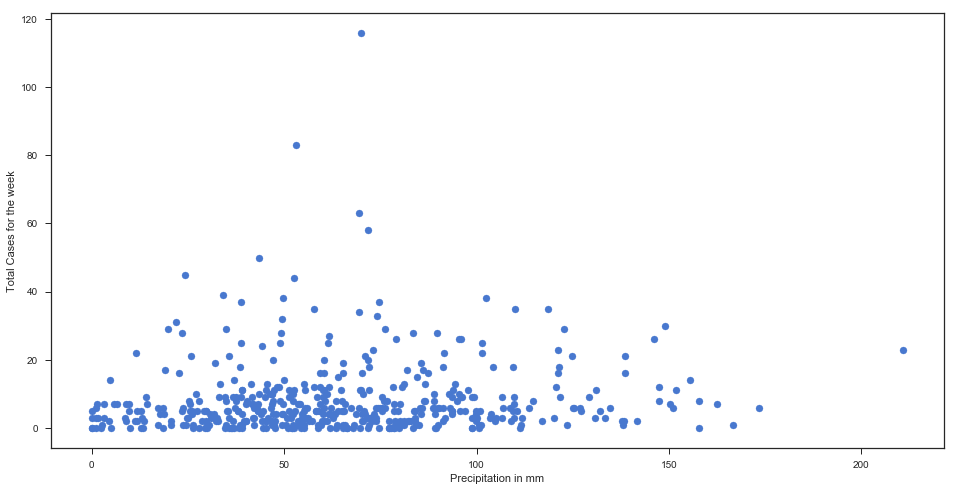

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_iq['precipitation_amt_mm'],data_iq['total_cases'])
ax.set_xlabel('Precipitation in mm')
ax.set_ylabel('Total Cases for the week')
plt.show()

***We will handle our outliers after exploring our data further. This is so that we get a better understanding of the domain before we remove or reset outliers.***

Below is the same scatter plot with each dot colored by month

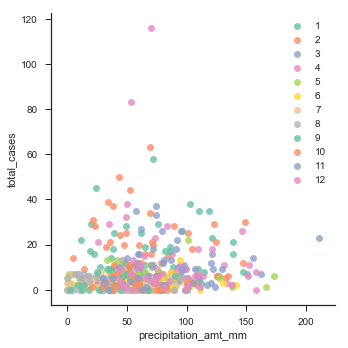

In [35]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="precipitation_amt_mm", y="total_cases", data=data_iq, fit_reg=False, 
           hue='month', legend=False, palette="Set2")
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

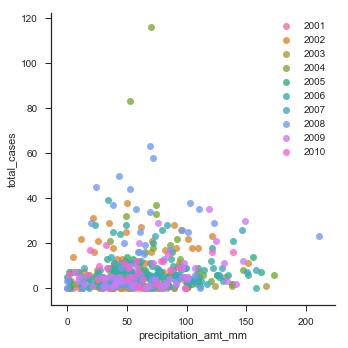

In [36]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="precipitation_amt_mm", y="total_cases", data=data_iq, fit_reg=False, 
           hue='year', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

Below is a bar chart showing the average number of cases in each week for each year. We notice that the average for the year 2003 is really low.

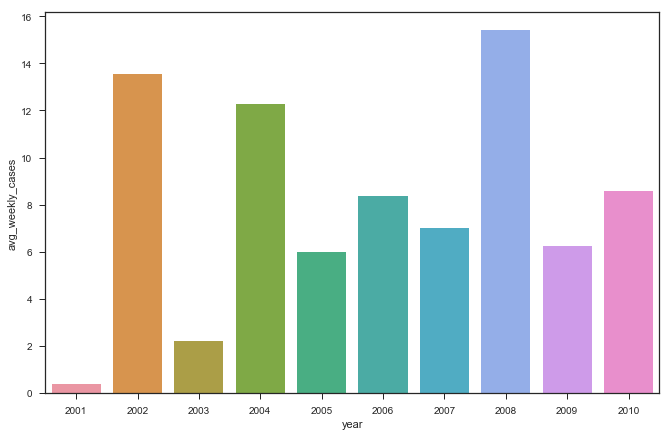

In [37]:
weekly_avg_sj = pd.DataFrame(data_iq.groupby(['year'])['total_cases'].mean().reset_index(name='avg_weekly_cases'))
plt.subplots(figsize=(11,7))
sns.barplot(x='year', y='avg_weekly_cases', data=weekly_avg_sj)

## Exploring our Data

### Total Number of Cases with time

We notice that there has been an outbreak on some occassions with a sudden drop in weekly cases for some years.

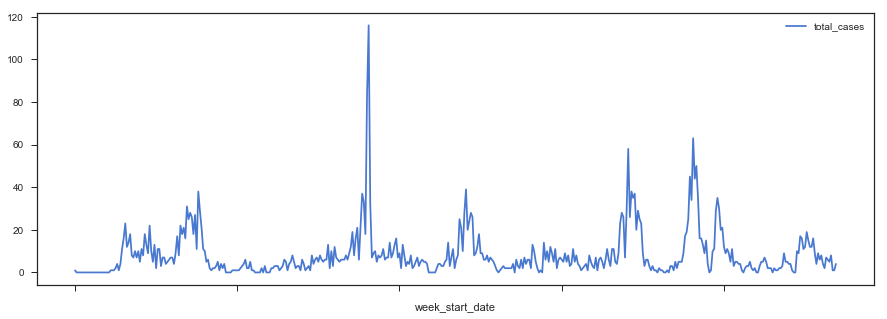

In [38]:
data_iq.plot(x='week_start_date', y='total_cases', figsize = (15,5))

### Facet Scatter Plot of Total Cases in Each Week for each Year

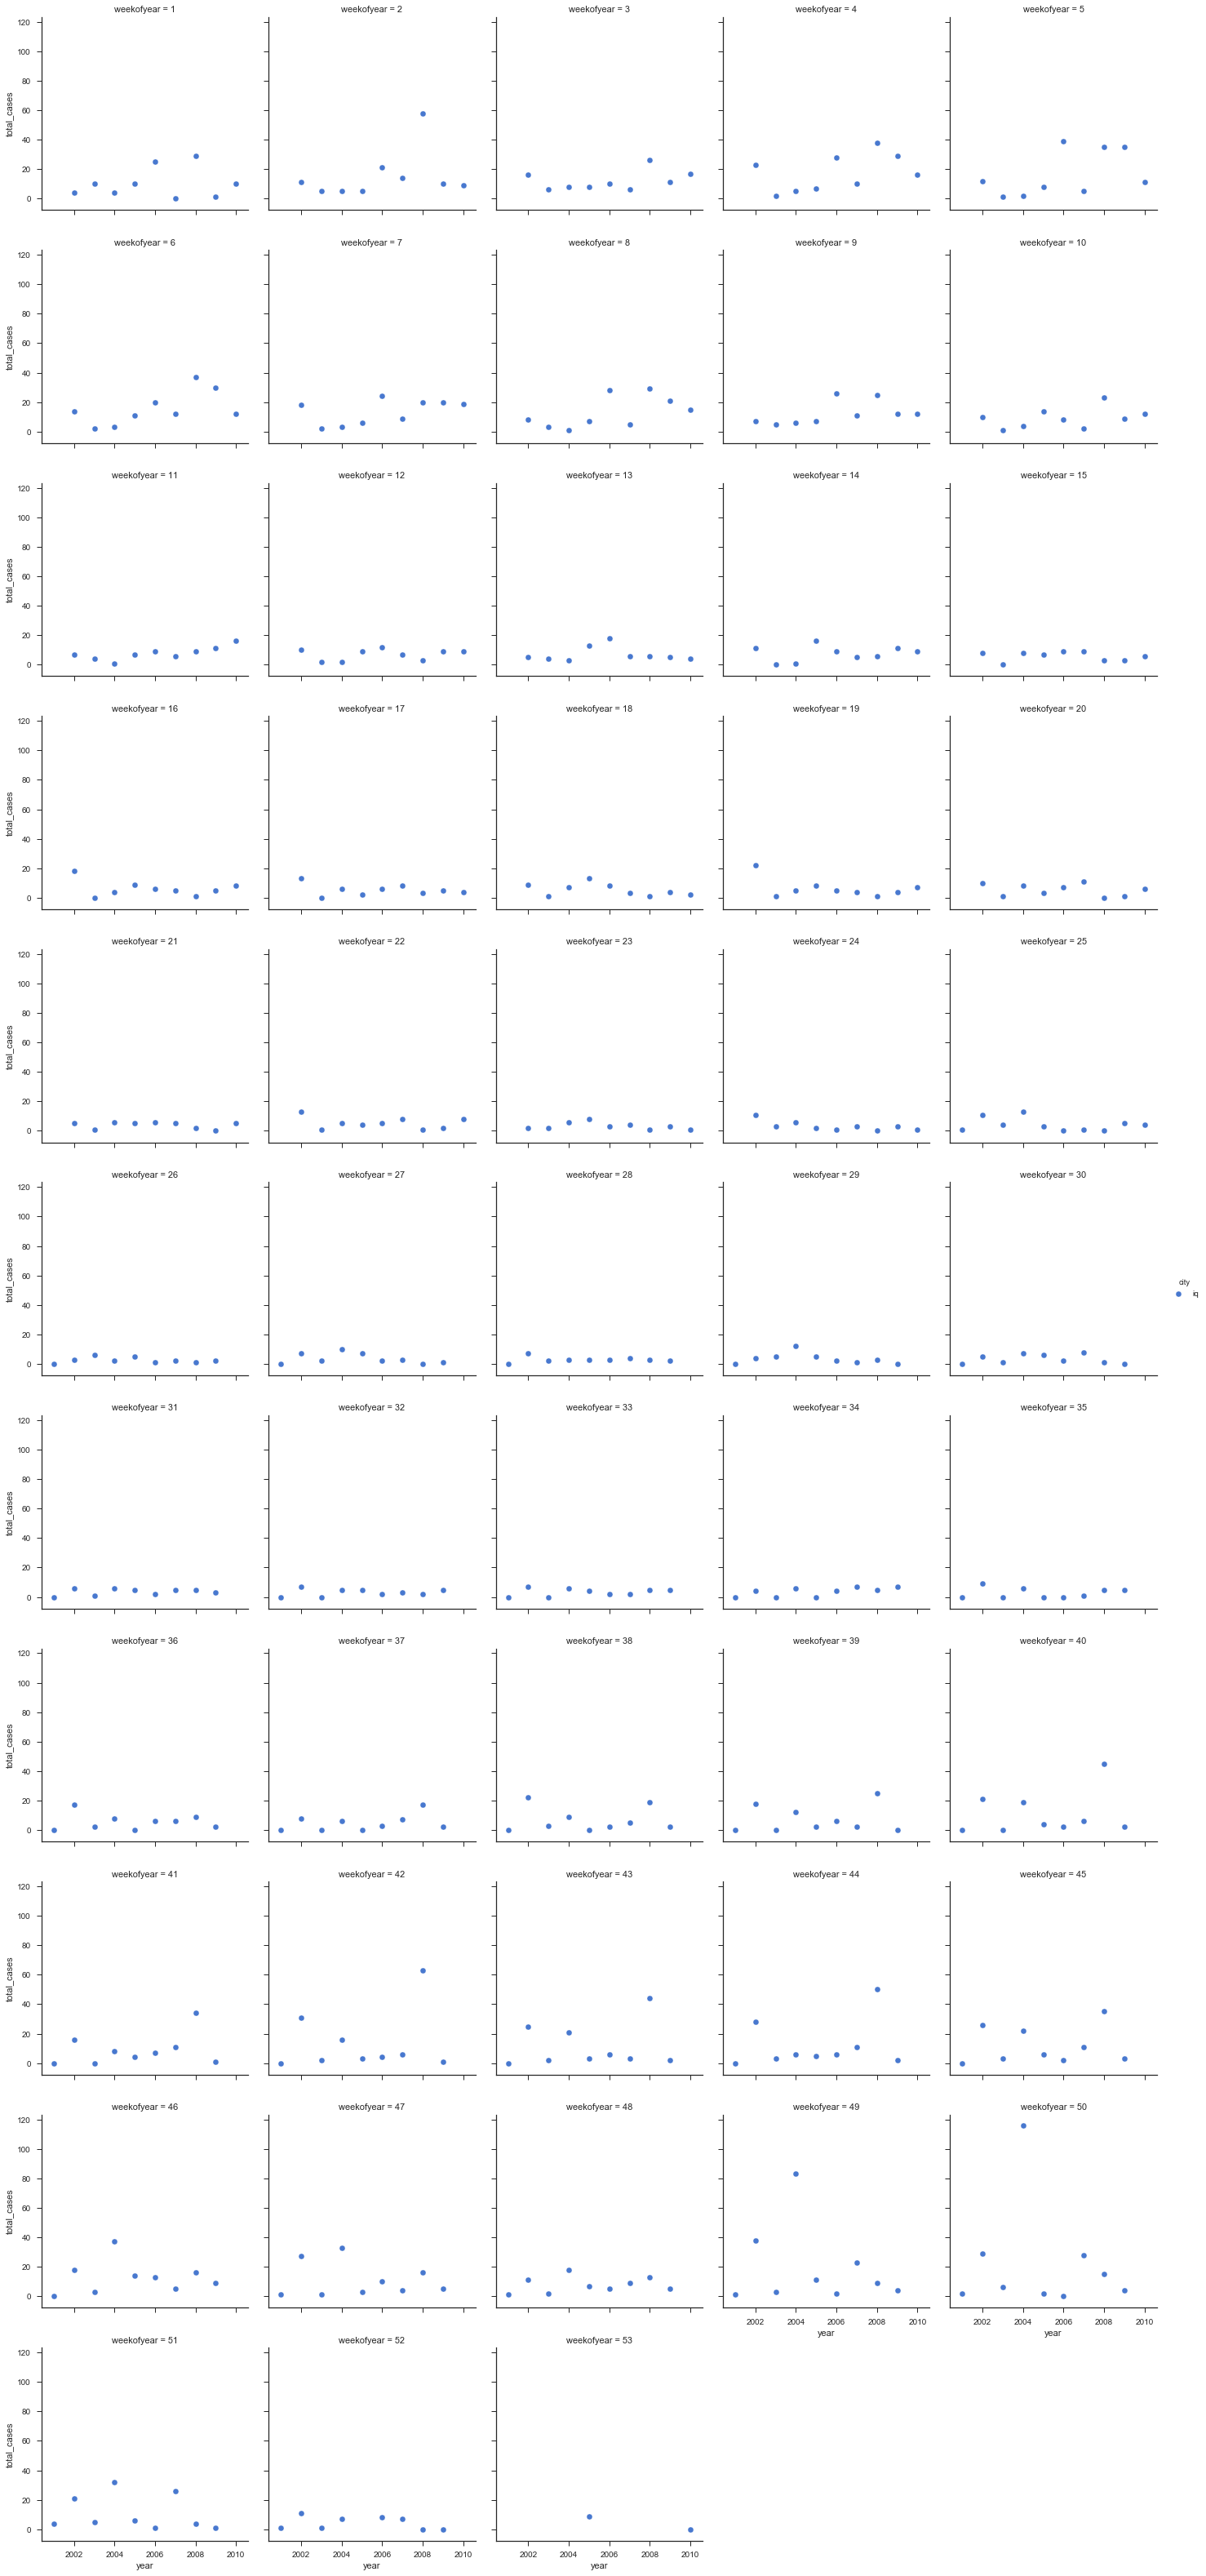

In [39]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_iq, col="weekofyear",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "year", "total_cases", edgecolor="w").add_legend())

### Total Cases by Week in Iquitos

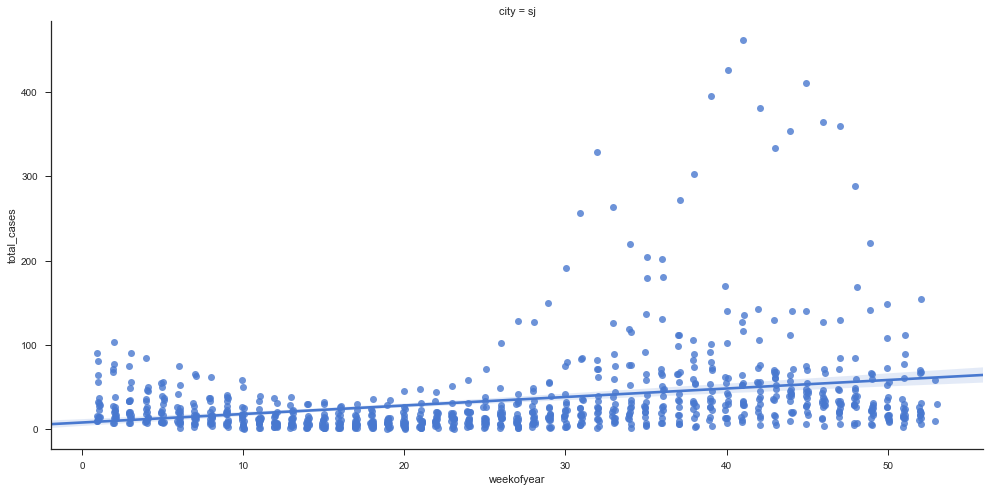

In [40]:
g = sns.lmplot(x="weekofyear", y="total_cases", hue="city", col="city", data=data_sj, aspect= 2, size = 7, x_jitter=.1)

### Facet Grid of total cases in each month for each year

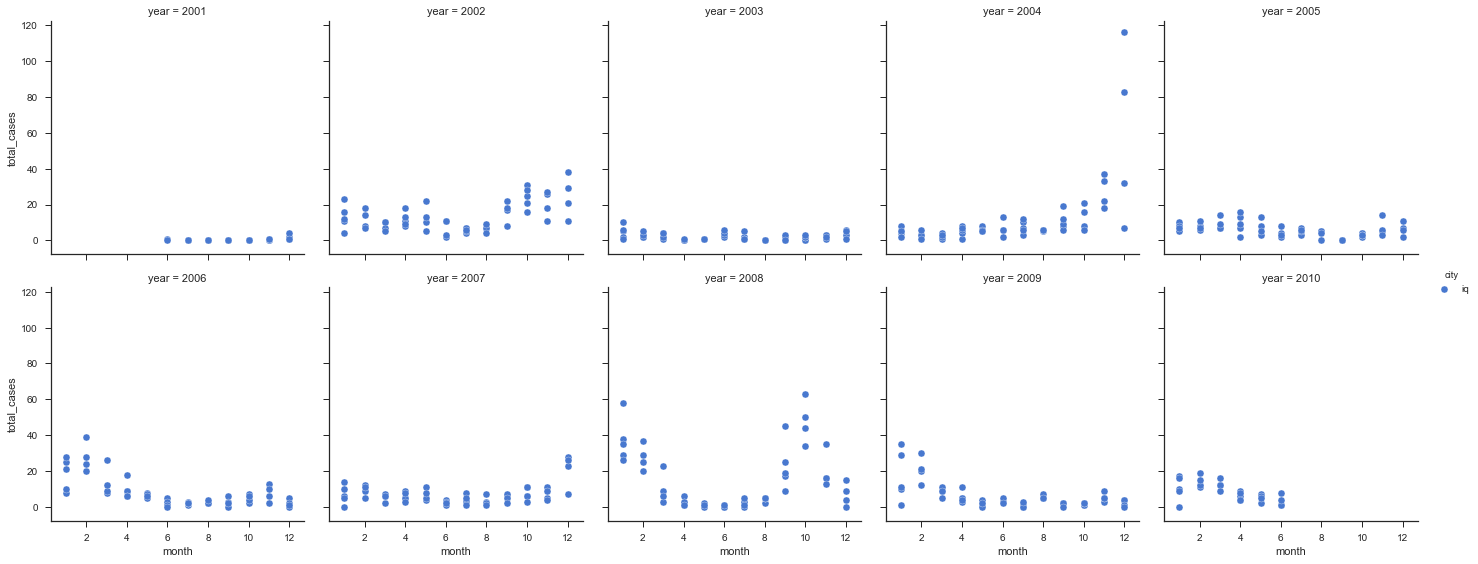

In [41]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_iq, col="year",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "month", "total_cases", edgecolor="w").add_legend())

### Facet Grid of total cases in each week for each year

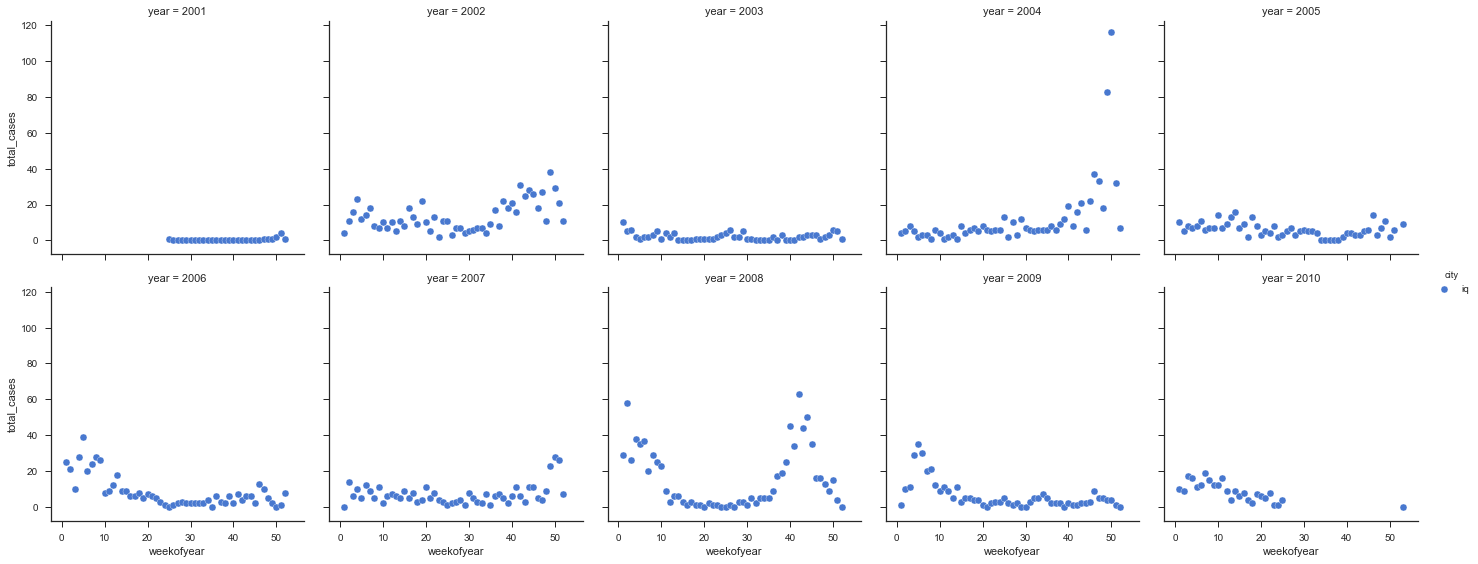

In [42]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_iq, col="year",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "weekofyear", "total_cases", edgecolor="w").add_legend())

### Facet Grid of Temperature in each year

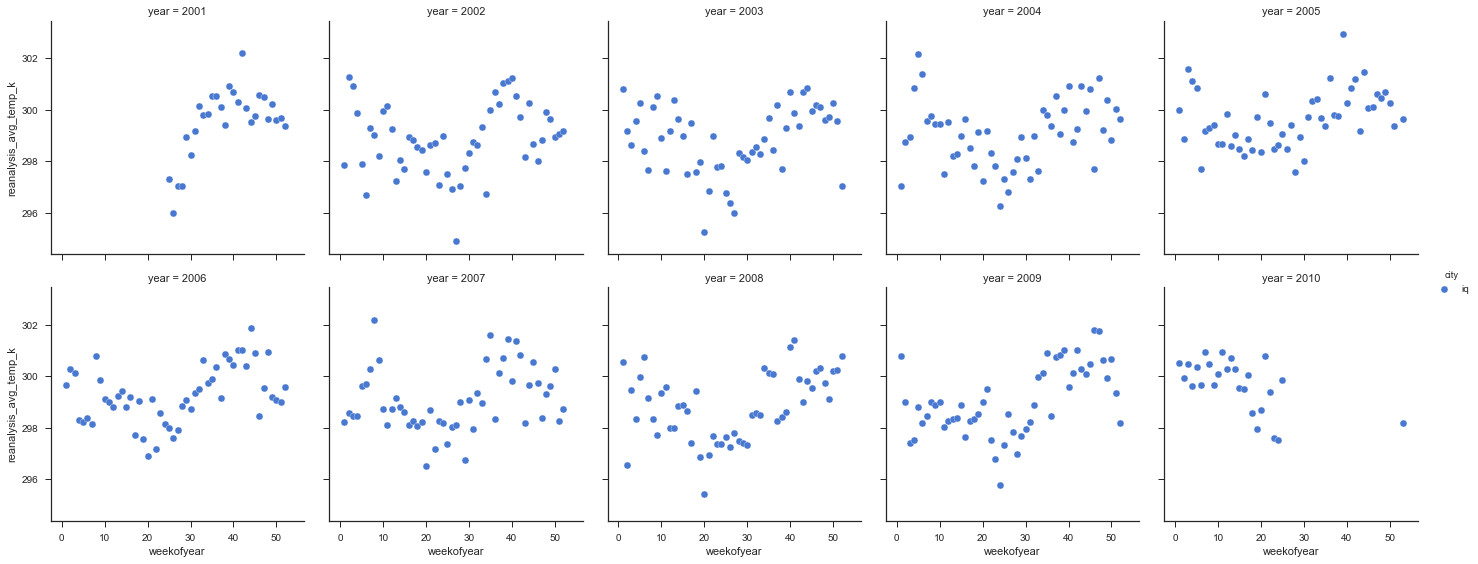

In [43]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data_iq, col="year",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "weekofyear", "reanalysis_avg_temp_k", edgecolor="w").add_legend())

### Precipitation in each week of year

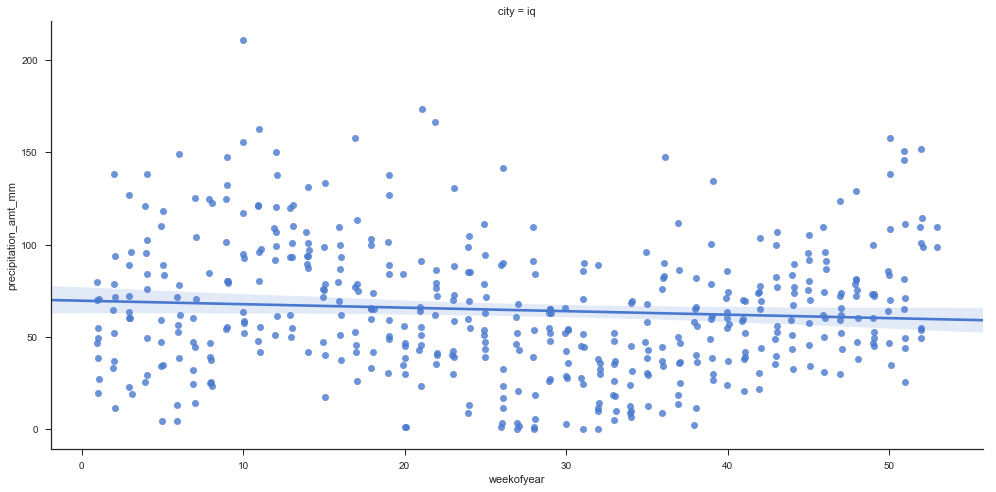

In [44]:
g = sns.lmplot(x="weekofyear", y="precipitation_amt_mm", hue="city", col="city", data=data_iq, aspect= 2, size = 7, x_jitter=.1)

### Average Growth of Dengue by Week Number

Text(0.5,1,'Growth of Dengue with Time - Weekly Breakdown for all years in Iquitos')

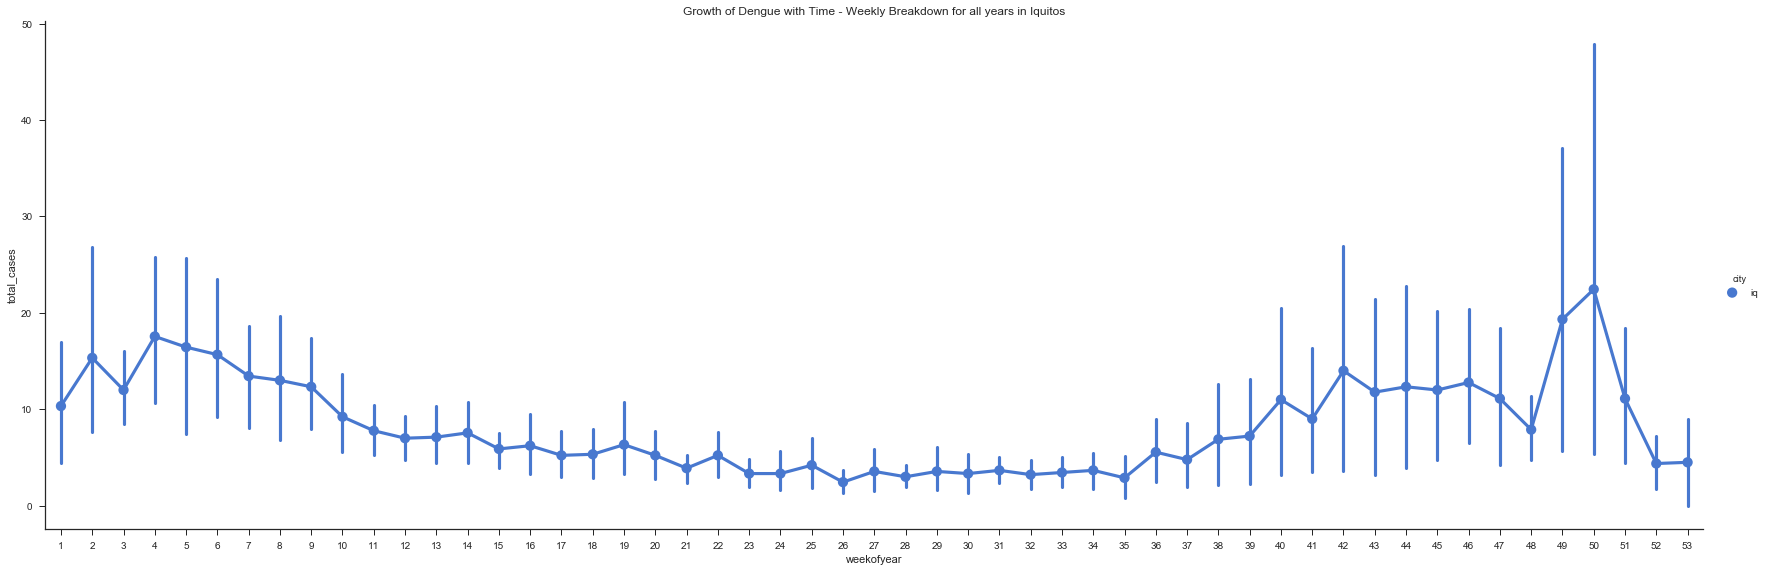

In [45]:
sns.factorplot(x="weekofyear", y="total_cases", hue="city", size=8, aspect=3,data=data_iq)
plt.title("Growth of Dengue with Time - Weekly Breakdown for all years in Iquitos")

### Average Growth of Dengue by Month Number

From the graphs below we notice that total number of dengue cases decreases as the total amount of precipitation decreases.

Text(0.5,1,'Growth of Dengue with Time - Weekly Breakdown for all years in Iquitos')

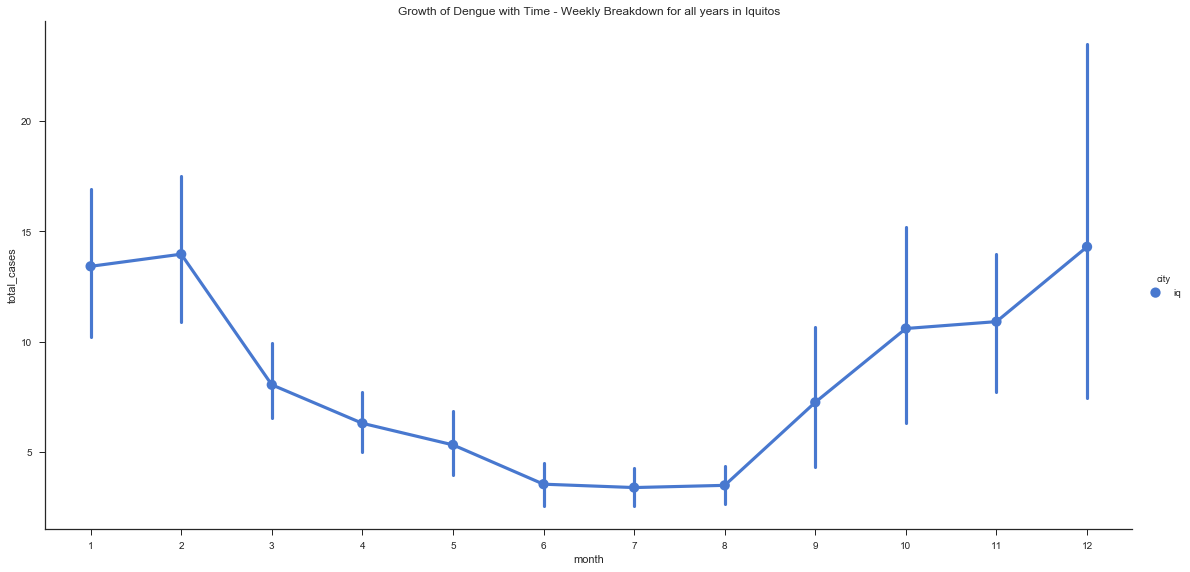

In [46]:
sns.factorplot(x="month", y="total_cases", hue="city", size=8, aspect=2,data=data_iq)
plt.title("Growth of Dengue with Time - Weekly Breakdown for all years in Iquitos")

### Average Precipitation by Week Number

Text(0.5,1,'Precipitation Change with Time - Weekly Breakdown - for all years in Iquitos ')

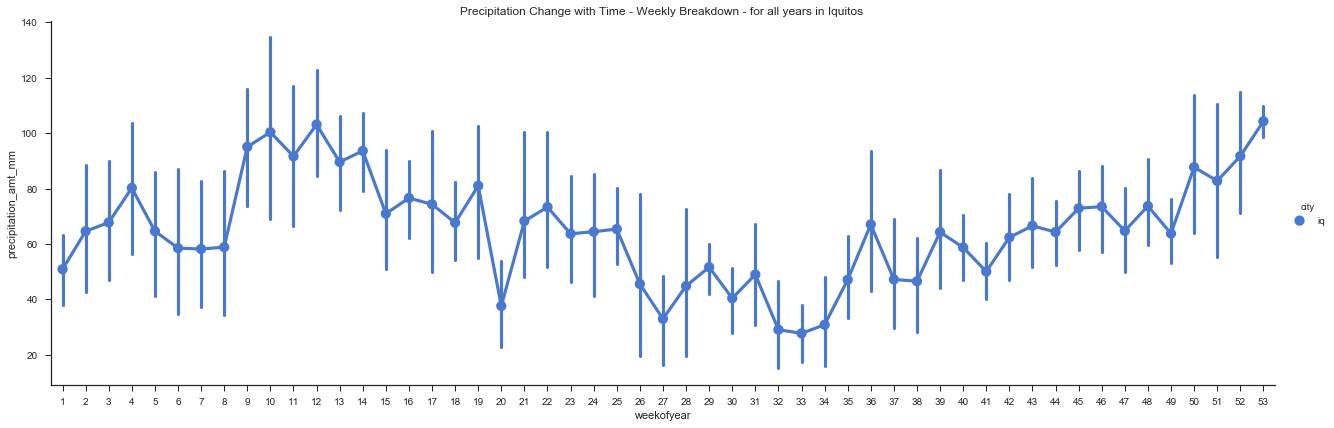

In [47]:
sns.factorplot(x="weekofyear", y="precipitation_amt_mm", hue="city", size=6, aspect=3,data=data_iq)
plt.title("Precipitation Change with Time - Weekly Breakdown - for all years in Iquitos ")

Text(0.5,1,'Precipitation Change with Time - Weekly Breakdown - for all years in Iquitos ')

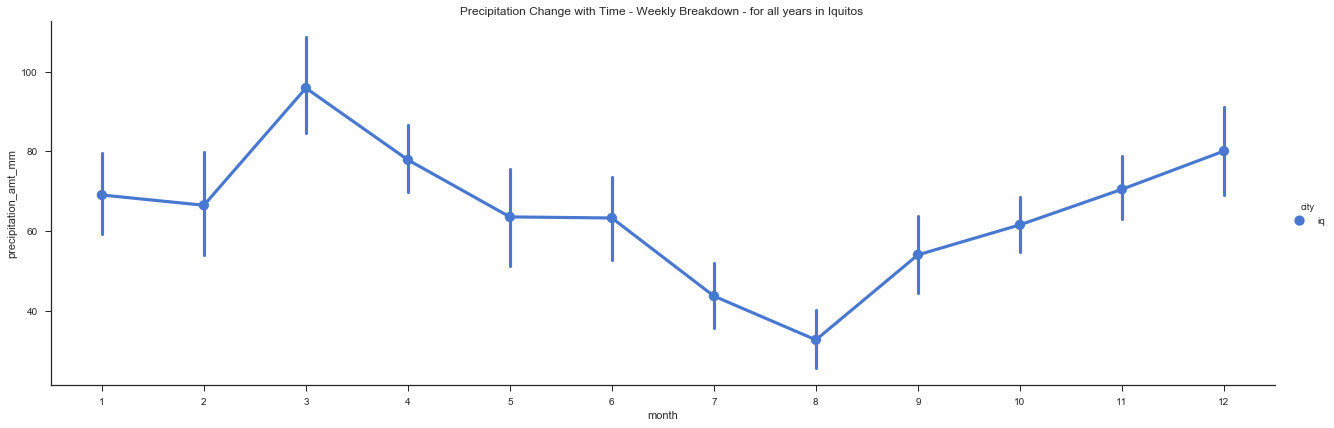

In [48]:
sns.factorplot(x="month", y="precipitation_amt_mm", hue="city", size=6, aspect=3,data=data_iq)
plt.title("Precipitation Change with Time - Weekly Breakdown - for all years in Iquitos ")

### Correlation Heat Map

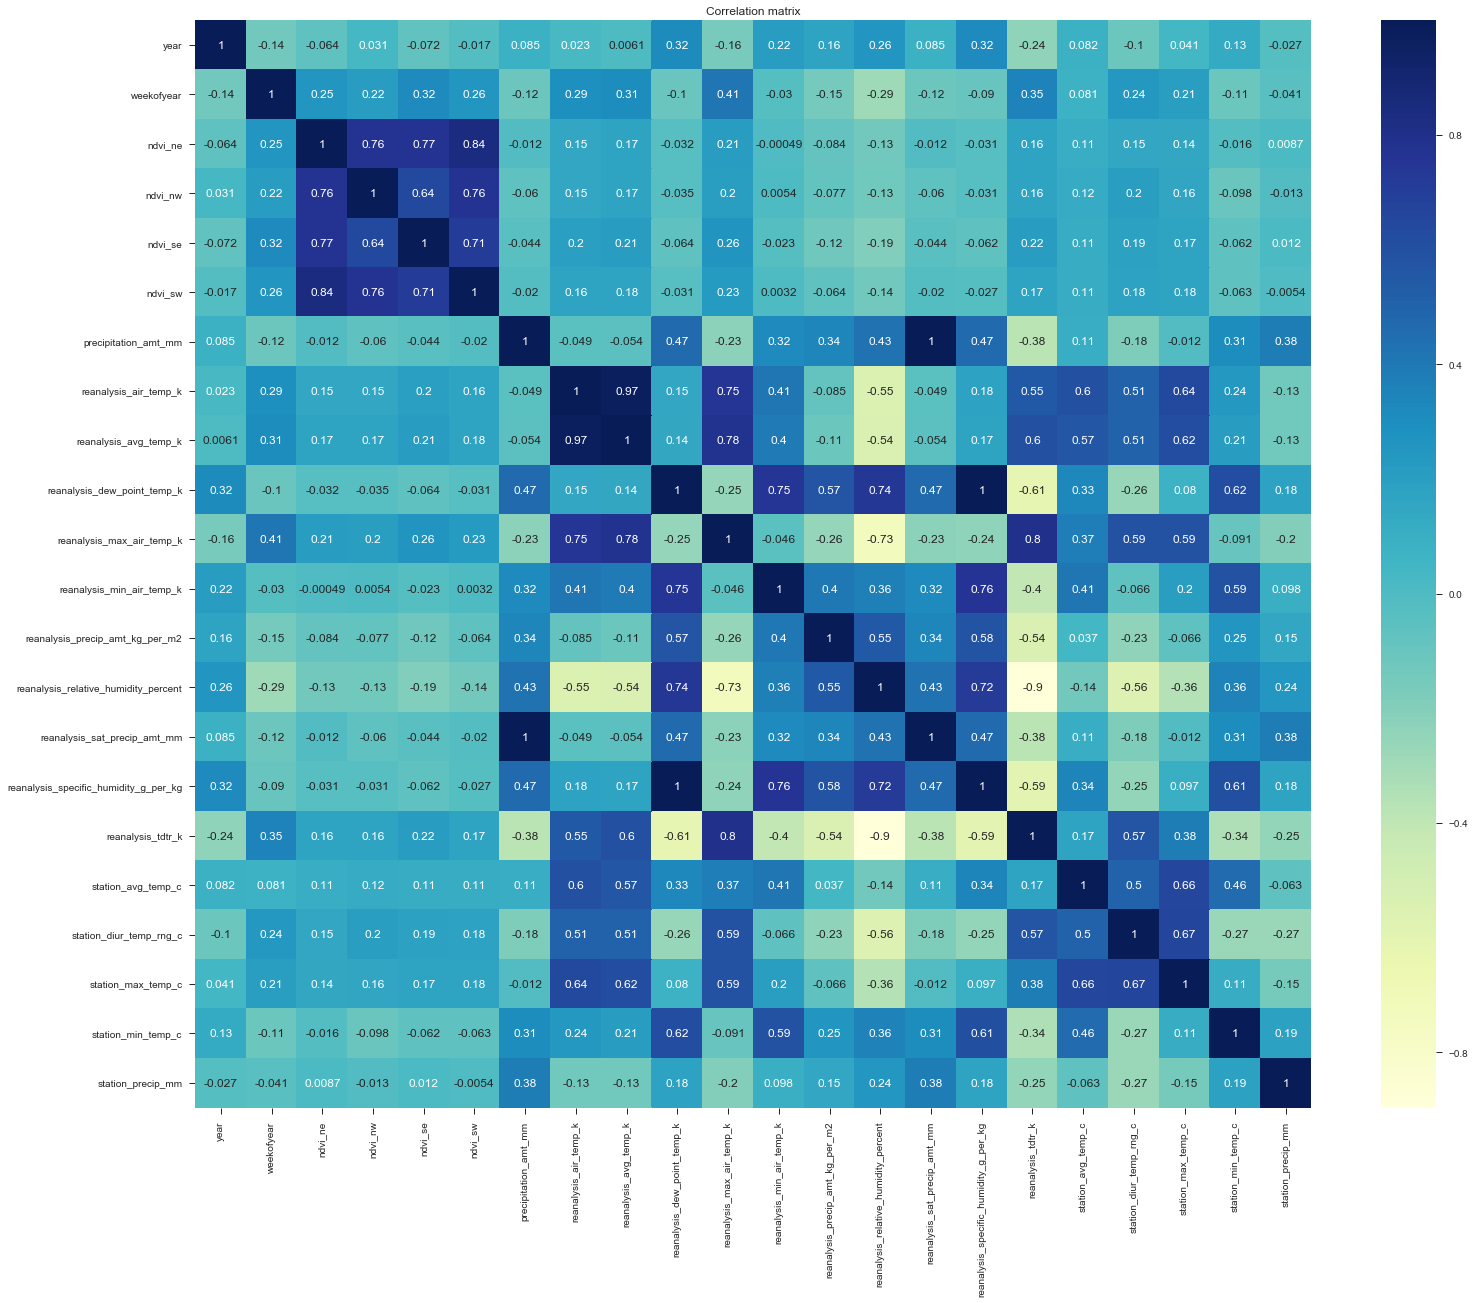

In [49]:
plt.figure(figsize=(25,20))
plt.title('Correlation matrix')
sns.heatmap(df_iq.corr(), cmap="YlGnBu", annot = True)

## Correlation for Dengue Cases

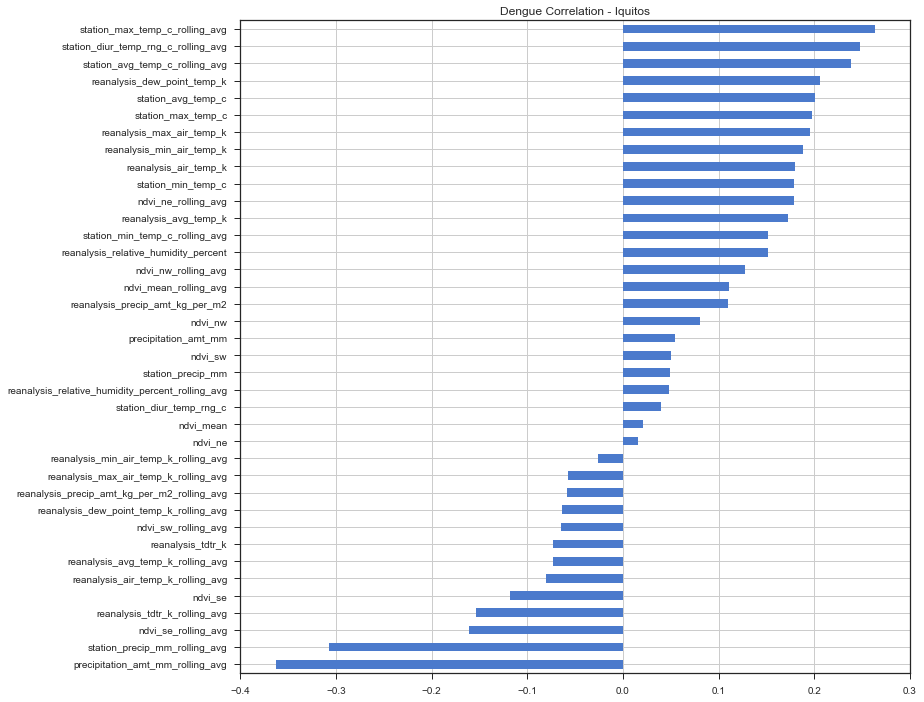

In [50]:
#Code to generate correlation graphs below for the two cities
corr_iq = data_iq.corr(method='pearson')
corr_iq = corr_iq['total_cases'].to_frame(name = 'corr_with_cases_sj')
corr_iq = corr_iq.sort_values(by=['corr_with_cases_sj'])
corr_iq = (corr_iq.drop('total_cases')
     .drop('year')
     .drop('month')
     .drop('weekofyear')
     .drop('odd_year'))
corr_sj.plot(kind='barh', title='Dengue Correlation - Iquitos', xlim=(-.40,.30), grid = True, legend = False, color = '#4B7ACC', figsize=(12,12))

In [51]:
data = data_iq['total_cases']
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 7
Non-outlier observations: 463


# Machine Learning Models

We will be testing our models with to see which give us the least margin of error and fit perfectly. 

Since we are predicting a continuous valued attribute associated with an object we will need to use Regression Machine Learning models from scikit learn.

As part of our modelling process, we did: 

1. Feature Importance Weighting
2. Dimensionality Reduction 
3. Updated our Features
4. Using Grid Search & Cross Validation we:
    1. Predicted Outcomes and 
    2. Printed Mean Absolute Error
5. Graphed out the Predicted vs Actual

For each machine learning model, we will mention: 

1. How it works?
2. Why we used it?

At the end of this discussion we will shift to selecting the best model via a comparision visualization collection & then add our concluding thoughts.

## K Nearest Neighbor

In K Nearest Neighbor, the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

We decided to use KNN, because it is an extremely recommended algorithm for large sets of time series data. 

## KNN San Juan 

### Splitting Training and Test Data

In [52]:
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n,
    data_sj['total_cases'],
    test_size = 0.3
)

### Features Selection

#### Recursive Feature Elimination

In [53]:
from sklearn.feature_selection import RFE

for n in range(1,20,1):
    
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(ExtraTreesRegressor(), n)
    fit = rfe.fit(test_features_sj, test_outcomes_sj)

    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj[data_sj_n.columns[fit.ranking_ == 1]],
        data_sj['total_cases'],
        test_size = 0.3
    )

    knr_reg = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
    knr_preds_sj = knr_reg.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_sj, knr_preds_sj))

Features: 1 , MAE: 28.133492726958103
Features: 2 , MAE: 22.84540706961099
Features: 3 , MAE: 14.30017510839078
Features: 4 , MAE: 11.772795633589688
Features: 5 , MAE: 12.647825755173752
Features: 6 , MAE: 10.76387359938594
Features: 7 , MAE: 10.176684182946284
Features: 8 , MAE: 25.13937824772532
Features: 9 , MAE: 10.526887460232915
Features: 10 , MAE: 12.151059814442695
Features: 11 , MAE: 18.819214361059434
Features: 12 , MAE: 8.771012704420215
Features: 13 , MAE: 8.768842420700706
Features: 14 , MAE: 13.32234142553923
Features: 15 , MAE: 17.91224213123566
Features: 16 , MAE: 10.084586249925463
Features: 17 , MAE: 16.060444440961188
Features: 18 , MAE: 18.06244747050495
Features: 19 , MAE: 11.930888712527462


#### Extra Tree Regressor

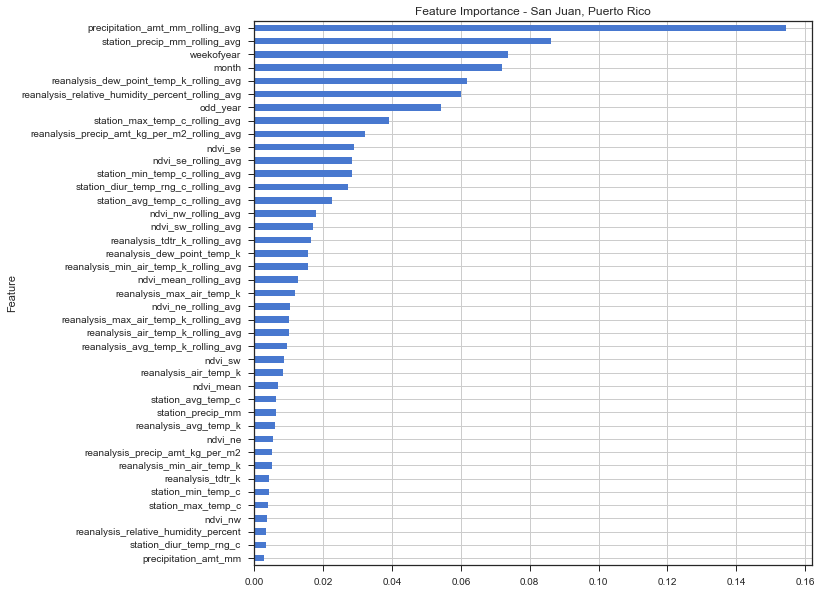

In [54]:
model = ExtraTreesRegressor()
feature_imp = pd.DataFrame({'Feature' : [], 'Importance' : []})
for i in range(1,10):
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )
    for i in range(1,10):
        model.fit(train_features_sj, train_outcomes_sj)
        imp = pd.DataFrame({'Feature': data_sj_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, figsize=(10,10))

### Update Train/Test Data

In [55]:
# San Juan
# ['month','reanalysis_relative_humidity_percent', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_tdtr_k']
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n[['month',
               'odd_year',
               'ndvi_sw_rolling_avg',
               'precipitation_amt_mm_rolling_avg',
               'reanalysis_dew_point_temp_k_rolling_avg',
               'reanalysis_precip_amt_kg_per_m2_rolling_avg',
               'reanalysis_relative_humidity_percent_rolling_avg',
               'station_diur_temp_rng_c_rolling_avg',
               'station_max_temp_c_rolling_avg']],
    data_sj['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation

#### Margin of Error

In [56]:
params = {'n_neighbors':range(2, 30), 'weights':['uniform', 'distance']}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
knr_preds_sj = grid_search.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
knr_mae_sj = mean_absolute_error(test_outcomes_sj, knr_preds_sj)
knr_mdae_sj = median_absolute_error(test_outcomes_sj, knr_preds_sj)
knr_evs_sj = explained_variance_score(test_outcomes_sj, knr_preds_sj)
print(knr_mae_sj)

9.547511340188656


#### Optimal Number of Neighbors

In [57]:
grid_search.cv_results_['params'][grid_search.best_index_]

{'n_neighbors': 5, 'weights': 'distance'}

#### Actual Versus Predicted Scatter Plot

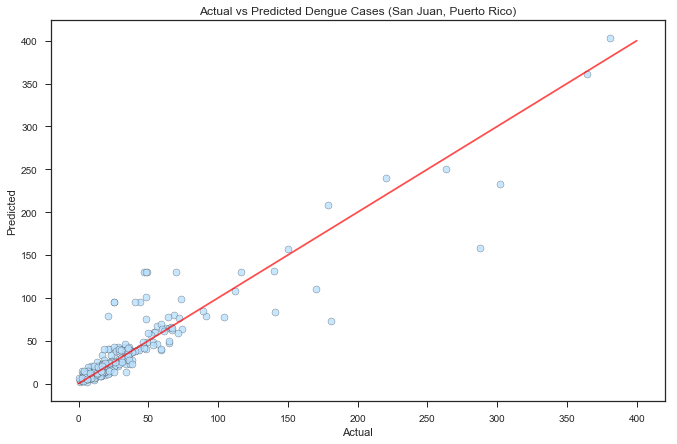

In [58]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (San Juan, Puerto Rico)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_sj, knr_preds_sj, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 400], [0, 400], 'red', alpha=0.7)

#### Final KNN Model

In [59]:
knr_preds_final_sj = knr_reg.fit(train_features_sj, train_outcomes_sj).predict(
    data_test_sj_n[['month',
                    'odd_year',
                    'ndvi_sw_rolling_avg',
                    'precipitation_amt_mm_rolling_avg',
                    'reanalysis_dew_point_temp_k_rolling_avg',
                    'reanalysis_precip_amt_kg_per_m2_rolling_avg',
                    'reanalysis_relative_humidity_percent_rolling_avg',
                    'station_diur_temp_rng_c_rolling_avg',
                    'station_max_temp_c_rolling_avg']]
)

In [60]:
submission_sj = data_test_sj[['city', 'year', 'weekofyear']].copy()
submission_sj['total_cases'] = np.round(knr_preds_final_sj).astype(int)

#### Residuals

Text(0.5,1,'Residuals')

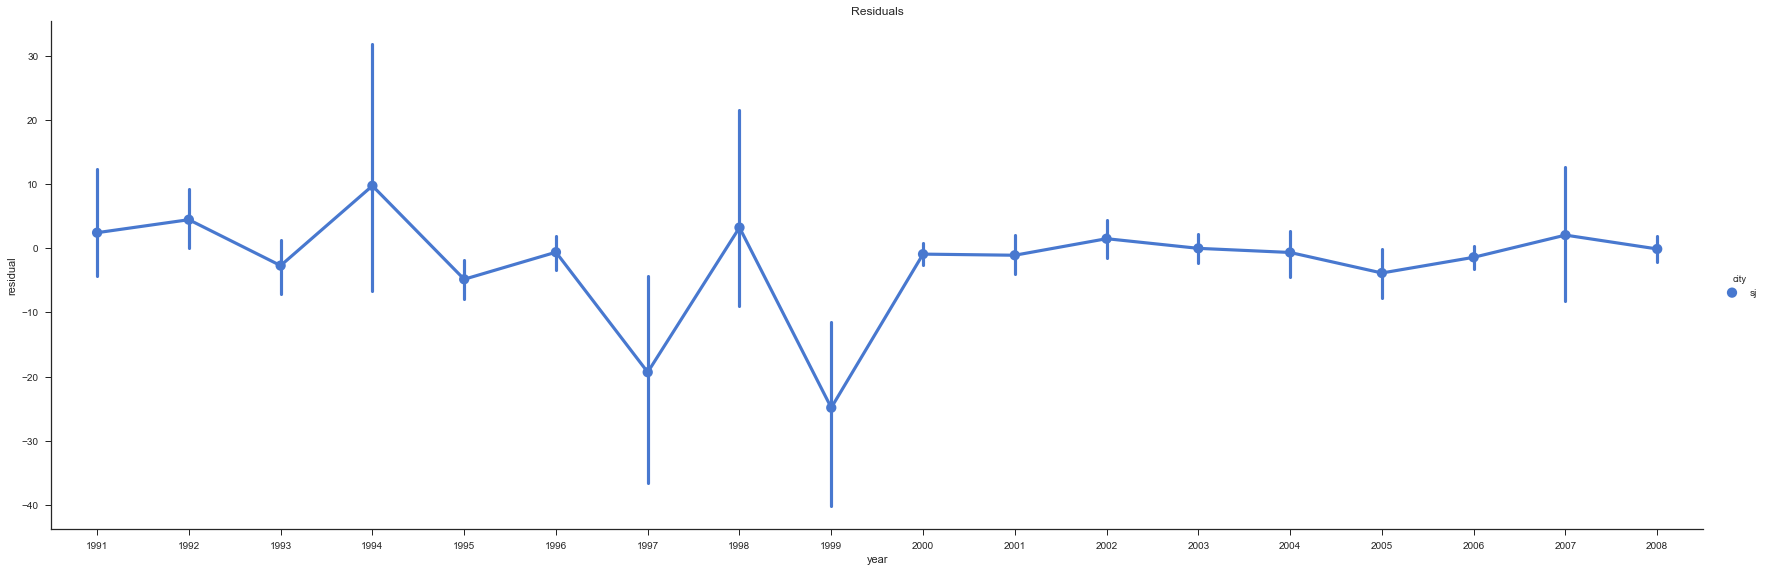

In [61]:
knn_preds_week_sj = pd.DataFrame(test_features_sj)
knn_preds_week_sj['Actual'] = test_outcomes_sj.values
knn_preds_week_sj['Predicted'] = knr_preds_sj
knn_preds_week_sj = pd.merge(data_sj, knn_preds_week_sj, left_index = True, right_index = True)
knn_preds_week_sj = knn_preds_week_sj.assign(residual=knn_preds_week_sj.Actual - knn_preds_week_sj.Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=knn_preds_week_sj)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

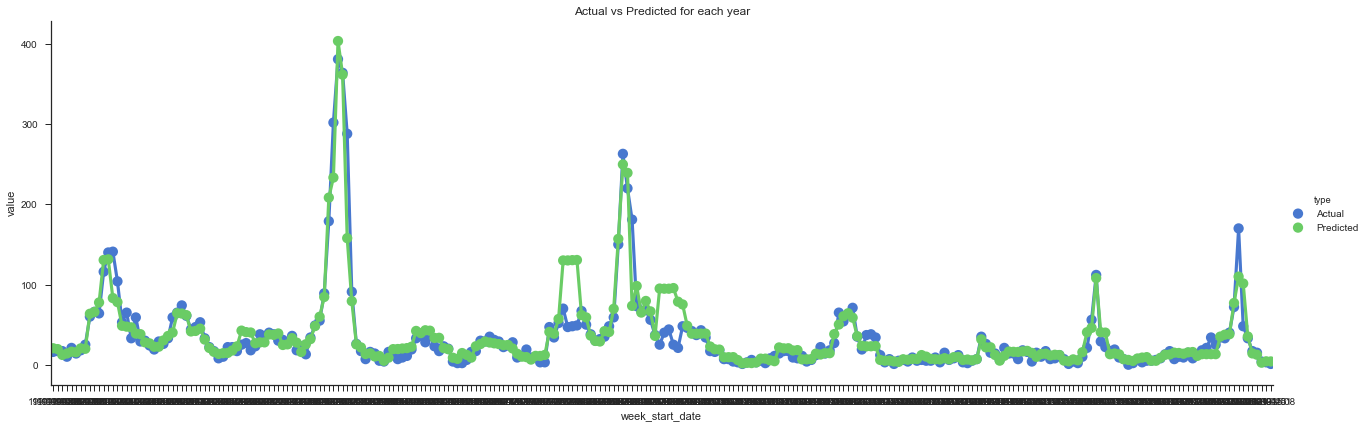

In [62]:
knn_preds_week_sj = knn_preds_week_sj.melt(id_vars=['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_x',
       'odd_year_x', 'ndvi_mean', 'ndvi_mean_rolling_avg',
       'ndvi_ne_rolling_avg', 'ndvi_nw_rolling_avg', 'ndvi_se_rolling_avg',
       'ndvi_sw_rolling_avg_x', 'precipitation_amt_mm_rolling_avg_x',
       'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg_x',
       'reanalysis_max_air_temp_k_rolling_avg',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg_x',
       'reanalysis_relative_humidity_percent_rolling_avg_x',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg',
       'station_diur_temp_rng_c_rolling_avg_x',
       'station_max_temp_c_rolling_avg_x', 'station_min_temp_c_rolling_avg',
       'station_precip_mm_rolling_avg', 'month_y', 'odd_year_y',
       'ndvi_sw_rolling_avg_y', 'precipitation_amt_mm_rolling_avg_y',
       'reanalysis_dew_point_temp_k_rolling_avg_y',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg_y',
       'reanalysis_relative_humidity_percent_rolling_avg_y',
       'station_diur_temp_rng_c_rolling_avg_y',
       'station_max_temp_c_rolling_avg_y', 'residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=knn_preds_week_sj, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

## KNN Iquitos

### Train/Test Split

In [63]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n,
    data_iq['total_cases'],
    test_size = 0.3
)

### Features Selection

In [64]:
from sklearn.feature_selection import RFE

for n in range(1,20,1):
    
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(ExtraTreesRegressor(), n)
    fit = rfe.fit(test_features_iq, test_outcomes_iq)

    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq[data_iq_n.columns[fit.ranking_ == 1]],
        data_iq['total_cases'],
        test_size = 0.3
    )

    knr_reg = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
    knr_preds_iq = knr_reg.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_iq, knr_preds_iq))

Features: 1 , MAE: 7.964772438692862
Features: 2 , MAE: 7.526215023243125
Features: 3 , MAE: 7.422715296960007
Features: 4 , MAE: 6.064308336813999
Features: 5 , MAE: 4.811517233273174
Features: 6 , MAE: 5.325051274918283
Features: 7 , MAE: 5.29844015182675
Features: 8 , MAE: 7.715616600943205
Features: 9 , MAE: 6.176772876340359
Features: 10 , MAE: 5.937164597906182
Features: 11 , MAE: 4.802713410286034
Features: 12 , MAE: 5.425498143588204
Features: 13 , MAE: 6.139650879307358
Features: 14 , MAE: 6.381115757576928
Features: 15 , MAE: 5.071503159448216
Features: 16 , MAE: 5.304012695361466
Features: 17 , MAE: 5.4596383656008
Features: 18 , MAE: 6.031018838052589
Features: 19 , MAE: 5.492852883086299


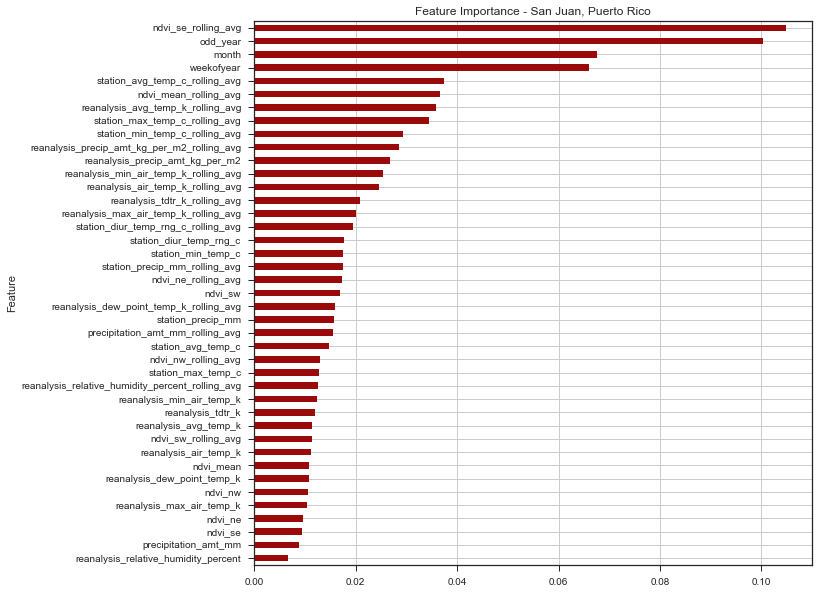

In [65]:
model = ExtraTreesRegressor()
feature_imp = pd.DataFrame({'Feature' : [], 'Importance' : []})
for i in range(1,10):
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )
    for i in range(1,10):
        model.fit(train_features_iq, train_outcomes_iq)
        imp = pd.DataFrame({'Feature': data_iq_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, color = '#9b0a0a', figsize=(10,10))

### Update Train/Test Data

In [66]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n[['reanalysis_avg_temp_k',
               'month',
               'odd_year',
               'ndvi_nw_rolling_avg',
               'ndvi_sw_rolling_avg',
               'reanalysis_max_air_temp_k_rolling_avg',
               'reanalysis_tdtr_k_rolling_avg',
               'station_diur_temp_rng_c_rolling_avg',
               'station_max_temp_c_rolling_avg']],
    data_iq['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation

#### Mean Absolute Error

In [67]:
params = {'n_neighbors':range(2, 10), 'weights':['uniform', 'distance']}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
knr_preds_iq = grid_search.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
knr_mae_iq = mean_absolute_error(test_outcomes_iq, knr_preds_iq)
knr_mdae_iq = median_absolute_error(test_outcomes_iq, knr_preds_iq)
knr_evs_iq = explained_variance_score(test_outcomes_iq, knr_preds_iq)
print(knr_mae_iq)

3.776722996149727


#### Optimal Number of Neighbors

In [68]:
grid_search.cv_results_['params'][grid_search.best_index_]

{'n_neighbors': 2, 'weights': 'distance'}

#### Actual vs Predicted Iquitos Scatter Plot

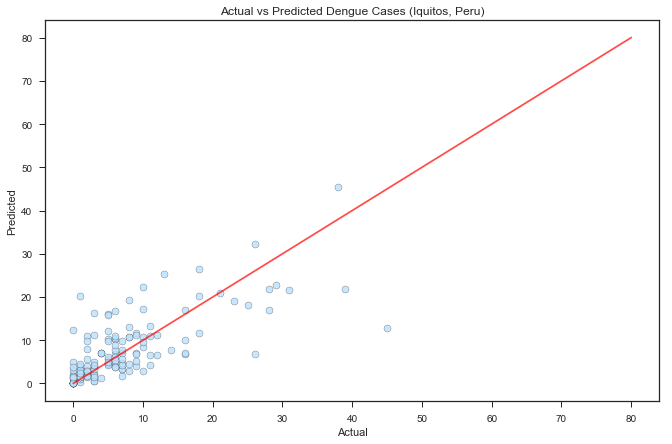

In [69]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (Iquitos, Peru)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_iq, knr_preds_iq, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 80], [0, 80], 'red', alpha=0.7)

### Final KNN Model for IQ

In [70]:
knr_preds_final_iq = knr_reg.fit(train_features_iq, train_outcomes_iq).predict(
    data_test_iq_n[['reanalysis_avg_temp_k',
                    'month',
                    'odd_year',
                    'ndvi_nw_rolling_avg',
                    'ndvi_sw_rolling_avg',
                    'reanalysis_max_air_temp_k_rolling_avg',
                    'reanalysis_tdtr_k_rolling_avg',
                    'station_diur_temp_rng_c_rolling_avg',
                    'station_max_temp_c_rolling_avg']]
)

submission_iq = data_test_iq[['city', 'year', 'weekofyear']].copy()


#### Residuals

Text(0.5,1,'Residuals')

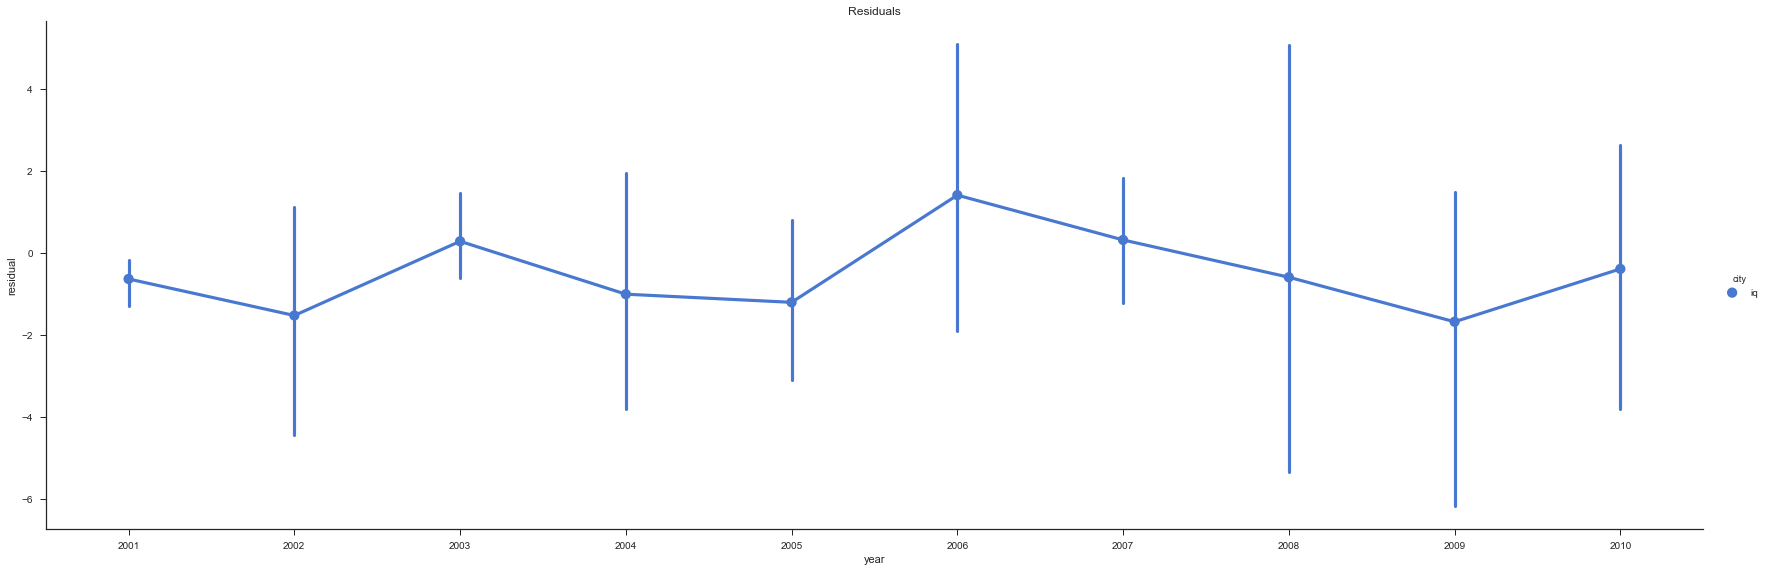

In [71]:
knn_preds_week_iq = pd.DataFrame(test_features_iq)
knn_preds_week_iq['Actual'] = test_outcomes_iq.values
knn_preds_week_iq['Predicted'] = knr_preds_iq
knn_preds_week_iq = pd.merge(data_iq, knn_preds_week_iq, left_index = True, right_index = True)
knn_preds_week_iq = knn_preds_week_iq.assign(residual=knn_preds_week_iq.Actual - knn_preds_week_iq.Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=knn_preds_week_iq)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

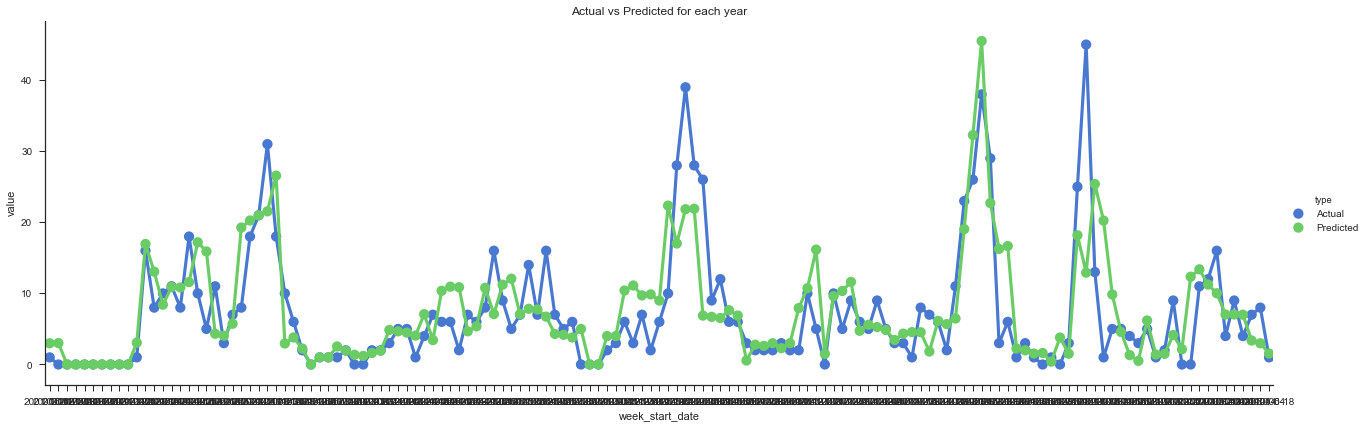

In [72]:
knn_preds_week_iq = knn_preds_week_iq.melt(id_vars=['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k_x', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_x',
       'odd_year_x', 'ndvi_mean', 'ndvi_mean_rolling_avg',
       'ndvi_ne_rolling_avg', 'ndvi_nw_rolling_avg_x', 'ndvi_se_rolling_avg',
       'ndvi_sw_rolling_avg_x', 'precipitation_amt_mm_rolling_avg',
       'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg',
       'reanalysis_max_air_temp_k_rolling_avg_x',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg',
       'reanalysis_relative_humidity_percent_rolling_avg',
       'reanalysis_tdtr_k_rolling_avg_x', 'station_avg_temp_c_rolling_avg',
       'station_diur_temp_rng_c_rolling_avg_x',
       'station_max_temp_c_rolling_avg_x', 'station_min_temp_c_rolling_avg',
       'station_precip_mm_rolling_avg', 'reanalysis_avg_temp_k_y', 'month_y',
       'odd_year_y', 'ndvi_nw_rolling_avg_y', 'ndvi_sw_rolling_avg_y',
       'reanalysis_max_air_temp_k_rolling_avg_y',
       'reanalysis_tdtr_k_rolling_avg_y',
       'station_diur_temp_rng_c_rolling_avg_y',
       'station_max_temp_c_rolling_avg_y','residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=knn_preds_week_iq, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

## KNN Submission to Driven Data - Best Score (19.4543)

In [73]:
frames = [submission_sj, submission_iq]
submission = pd.concat(frames)
submission.to_csv('knn_best.csv', index = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


## Xtreme Gradient Boosting

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. 


We used it as it minimises the error of Normal Decision Trees as the implementation of XGBoost offers several advanced features for model tuning, computing environments and algorithm enhancement.

## Xtreme Gradient Boosting for San Juan

### Training and Test Data

In [74]:
# Testing & Training Data
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n,
    data_sj['total_cases'],
    test_size = 0.3
)

### Feature Selection
#### Recursive Feature Elimination

In [75]:
from sklearn.feature_selection import RFE

for n in range(1,20,1):
    
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(XGBRegressor(), n)
    fit = rfe.fit(test_features_sj, test_outcomes_sj)

    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj[data_sj_n.columns[fit.ranking_ == 1]],
        data_sj['total_cases'],
        test_size = 0.3
    )

    xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.03, max_depth = 10, subsample = 0.8, colsample_bytree = 0.701)
    xgb_preds_sj = xgb_reg.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_sj, xgb_preds_sj))


Features: 1 , MAE: 33.83979257291421
Features: 2 , MAE: 24.348538034168403
Features: 3 , MAE: 22.326293131462613
Features: 4 , MAE: 16.813920373307134
Features: 5 , MAE: 8.373529181444555
Features: 6 , MAE: 11.650297846112933
Features: 7 , MAE: 10.419811341099273
Features: 8 , MAE: 10.488946499905191
Features: 9 , MAE: 9.157661781275182
Features: 10 , MAE: 10.850977557046074
Features: 11 , MAE: 9.745062968784705
Features: 12 , MAE: 11.008426702560339
Features: 13 , MAE: 9.928849299599353
Features: 14 , MAE: 8.76913256842391
Features: 15 , MAE: 7.686975049793272
Features: 16 , MAE: 8.015233431543622
Features: 17 , MAE: 11.015054046211386
Features: 18 , MAE: 9.846770652702876
Features: 19 , MAE: 9.838708419548837


#### XG Regressor Feature Importance

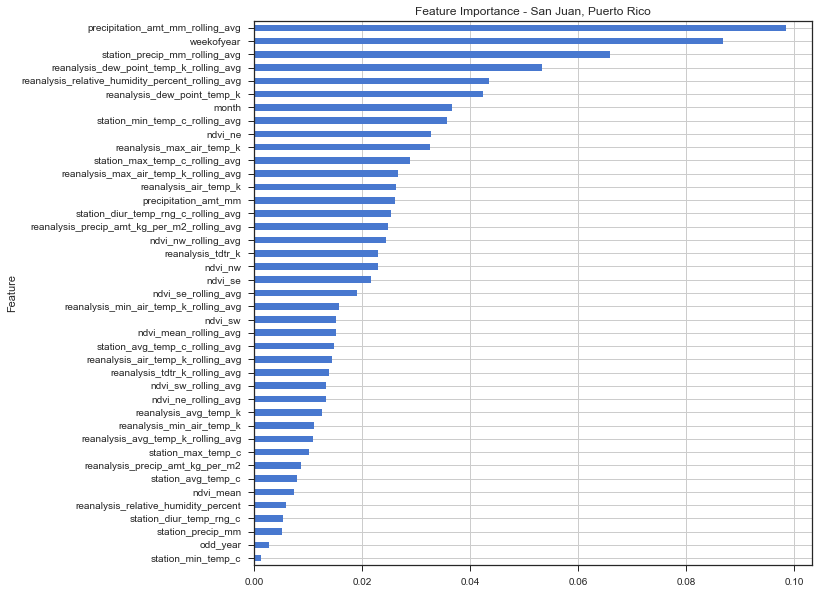

In [76]:
model = XGBRegressor()
feature_imp = pd.DataFrame()
for i in range(1,10):
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n,
    data_sj['total_cases'],
    test_size = 0.3
    )
    for i in range(1,10):
        model.fit(train_features_sj, train_outcomes_sj)
        imp = pd.DataFrame({'Feature': data_sj_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, figsize=(10,10))

### Update Features

In [77]:
# San Juan
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n[['precipitation_amt_mm_rolling_avg',
               'weekofyear',
               'station_precip_mm_rolling_avg',
               'reanalysis_dew_point_temp_k_rolling_avg',
               'reanalysis_relative_humidity_percent_rolling_avg',
               'station_max_temp_c_rolling_avg',
               'reanalysis_air_temp_k_rolling_avg',
               'ndvi_mean_rolling_avg']],
    data_sj['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation & Mean Absolute Error

In [78]:
params = {'n_estimators':[1000], 'learning_rate':[0.03], 'max_depth':[10], 'subsample':[0.8], 'colsample_bytree':[0.701]}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(XGBRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
xgb_preds_sj = grid_search.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
xgb_mae_sj = mean_absolute_error(test_outcomes_sj, xgb_preds_sj)
xgb_mdae_sj = median_absolute_error(test_outcomes_sj, xgb_preds_sj)
xgb_evs_sj = explained_variance_score(test_outcomes_sj, xgb_preds_sj)
print(xgb_mae_sj)

7.587810327235918


### Actual vs Predicted San Juan XG Boost Scatter Plot

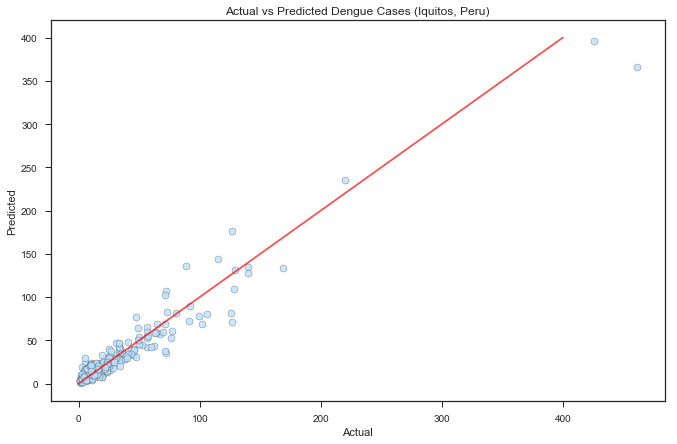

In [79]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (Iquitos, Peru)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_sj, xgb_preds_sj, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 400], [0, 400], 'red', alpha=0.7)

#### Residuals

Text(0.5,1,'Residuals')

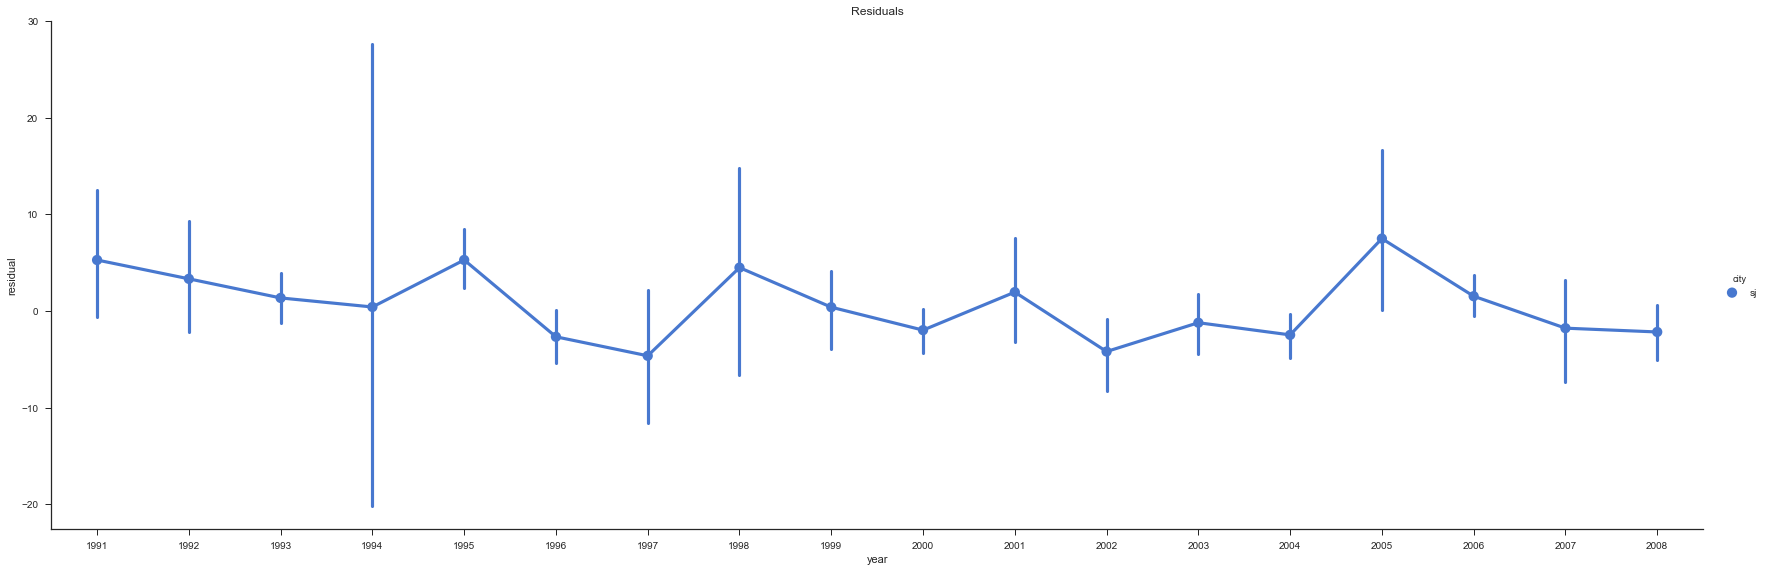

In [80]:
xgb_preds_week_sj = pd.DataFrame(test_features_sj)
xgb_preds_week_sj['Actual'] = test_outcomes_sj.values
xgb_preds_week_sj['Predicted'] = xgb_preds_sj
xgb_preds_week_sj = pd.merge(data_sj, xgb_preds_week_sj, left_index = True, right_index = True)
plot_d = xgb_preds_week_sj.assign(residual=xgb_preds_week_sj.Actual - xgb_preds_week_sj .Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=plot_d)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

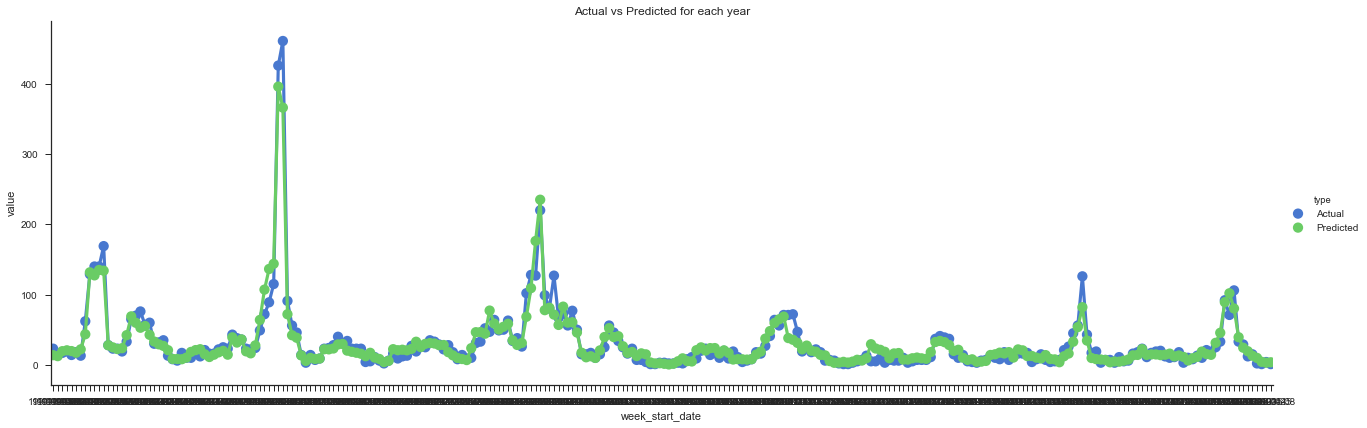

In [81]:
plot_d = plot_d.melt(id_vars=['city', 'year', 'weekofyear_x', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'odd_year', 'ndvi_mean', 'ndvi_mean_rolling_avg_x',
       'ndvi_ne_rolling_avg', 'ndvi_nw_rolling_avg', 'ndvi_se_rolling_avg',
       'ndvi_sw_rolling_avg', 'precipitation_amt_mm_rolling_avg_x',
       'reanalysis_air_temp_k_rolling_avg_x',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg_x',
       'reanalysis_max_air_temp_k_rolling_avg',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg',
       'reanalysis_relative_humidity_percent_rolling_avg_x',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg',
       'station_diur_temp_rng_c_rolling_avg',
       'station_max_temp_c_rolling_avg_x', 'station_min_temp_c_rolling_avg',
       'station_precip_mm_rolling_avg_x', 'precipitation_amt_mm_rolling_avg_y',
       'weekofyear_y', 'station_precip_mm_rolling_avg_y',
       'reanalysis_dew_point_temp_k_rolling_avg_y',
       'reanalysis_relative_humidity_percent_rolling_avg_y',
       'station_max_temp_c_rolling_avg_y',
       'reanalysis_air_temp_k_rolling_avg_y', 'ndvi_mean_rolling_avg_y', 'residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=plot_d, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

In [82]:
xgb_preds_final_sj = xgb_reg.fit(train_features_sj, train_outcomes_sj).predict(
    data_test_sj_n[['precipitation_amt_mm_rolling_avg',
               'weekofyear',
               'station_precip_mm_rolling_avg',
               'reanalysis_dew_point_temp_k_rolling_avg',
               'reanalysis_relative_humidity_percent_rolling_avg',
               'station_max_temp_c_rolling_avg',
               'reanalysis_air_temp_k_rolling_avg',
               'ndvi_mean_rolling_avg']]
)

In [83]:
submission_sj = data_test_sj[['city', 'year', 'weekofyear']].copy()
submission_sj['total_cases'] = np.round(xgb_preds_final_sj).astype(int)

## Iquitos XG Boost

### Training & Test Data

In [84]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n,
    data_iq['total_cases'],
    test_size = 0.3
)

### Feature Selection 

#### Recursive Feature Elimination

In [85]:
from sklearn.feature_selection import RFE

for n in range(1,20,1):
    
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(XGBRegressor(), n)
    fit = rfe.fit(test_features_iq, test_outcomes_iq)

    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq[data_iq_n.columns[fit.ranking_ == 1]],
        data_iq['total_cases'],
        test_size = 0.3
    )

    xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.03, max_depth = 10, subsample = 0.8, colsample_bytree = 0.701)
    xgb_preds_iq = xgb_reg.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_iq, xgb_preds_iq))


Features: 1 , MAE: 7.890125819554566
Features: 2 , MAE: 8.34331096465706
Features: 3 , MAE: 6.853985346800892
Features: 4 , MAE: 6.214191829693233
Features: 5 , MAE: 4.1573253379645925
Features: 6 , MAE: 4.001100015132986
Features: 7 , MAE: 4.153278014761336
Features: 8 , MAE: 4.923468457680222
Features: 9 , MAE: 5.069420959932584
Features: 10 , MAE: 3.7384204093023397
Features: 11 , MAE: 5.08000807157645
Features: 12 , MAE: 4.098495045029525
Features: 13 , MAE: 4.398846993420986
Features: 14 , MAE: 3.1934838455619543
Features: 15 , MAE: 4.212454951189934
Features: 16 , MAE: 4.798559705839089
Features: 17 , MAE: 3.9568794137197183
Features: 18 , MAE: 4.087353930828419
Features: 19 , MAE: 4.943526355721426


#### XG Boost Regressor Feature Importance Graph

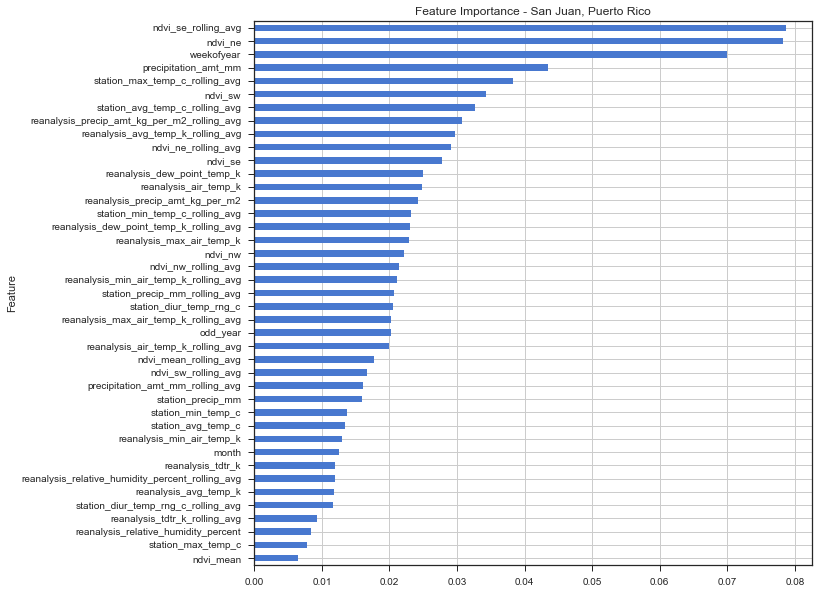

In [86]:
model = XGBRegressor()
feature_imp = pd.DataFrame()
for i in range(1,10):
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n,
    data_iq['total_cases'],
    test_size = 0.3
    )
    for i in range(1,10):
        model.fit(train_features_iq, train_outcomes_iq)
        imp = pd.DataFrame({'Feature': data_iq_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, figsize=(10,10))

### Updating Features

In [87]:
# ['month','odd_year','reanalysis_relative_humidity_percent', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_tdtr_k']
#Iquitos
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n[['ndvi_se_rolling_avg',
                'ndvi_ne_rolling_avg',
                'ndvi_nw_rolling_avg',
                'weekofyear',
                'station_max_temp_c_rolling_avg',
                'reanalysis_precip_amt_kg_per_m2_rolling_avg',
                'station_min_temp_c_rolling_avg']],
    data_iq['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation & Margin of Error

In [88]:
params = {'n_estimators':[1000], 'learning_rate':[0.03], 'max_depth':[10], 'subsample':[0.8], 'colsample_bytree':[0.701]}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(XGBRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
xgb_preds_iq = grid_search.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
xgb_mae_iq = mean_absolute_error(test_outcomes_iq, xgb_preds_iq)
xgb_mdae_iq = median_absolute_error(test_outcomes_iq, xgb_preds_iq)
xgb_evs_iq = explained_variance_score(test_outcomes_iq, xgb_preds_iq)
print(xgb_mae_iq)

4.195427194554755


### Predicted vs Actual

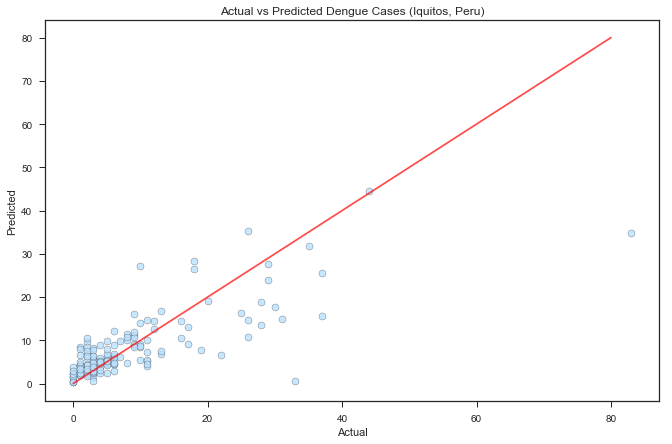

In [89]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (Iquitos, Peru)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_iq, xgb_preds_iq, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 80], [0, 80], 'red', alpha=0.7)

#### Residuals

Text(0.5,1,'Residuals')

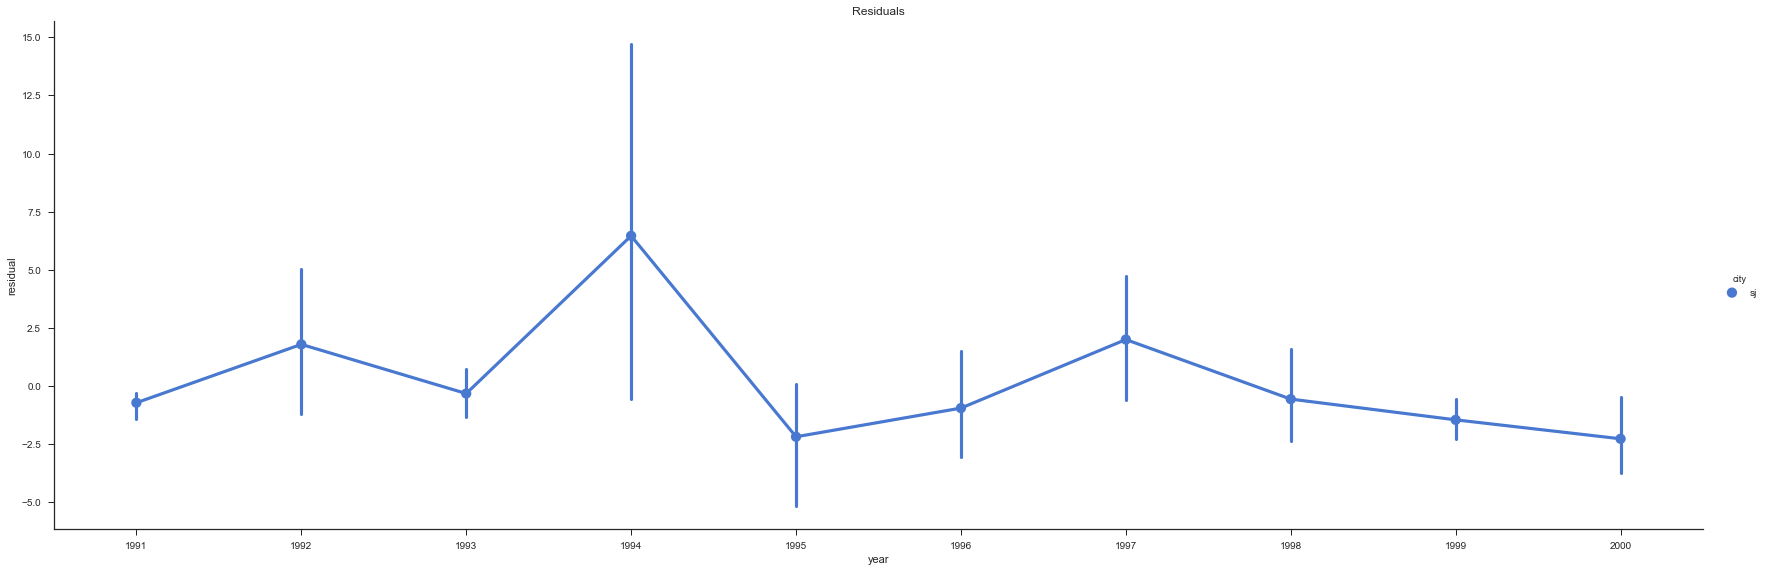

In [90]:
xgb_preds_week_iq = pd.DataFrame(test_features_iq)
xgb_preds_week_iq['Actual'] = test_outcomes_iq.values
xgb_preds_week_iq['Predicted'] = xgb_preds_iq
xgb_preds_week_iq = pd.merge(data_sj, xgb_preds_week_iq, left_index = True, right_index = True)
plot_d = xgb_preds_week_iq.assign(residual=xgb_preds_week_iq.Actual - xgb_preds_week_iq .Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=plot_d)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

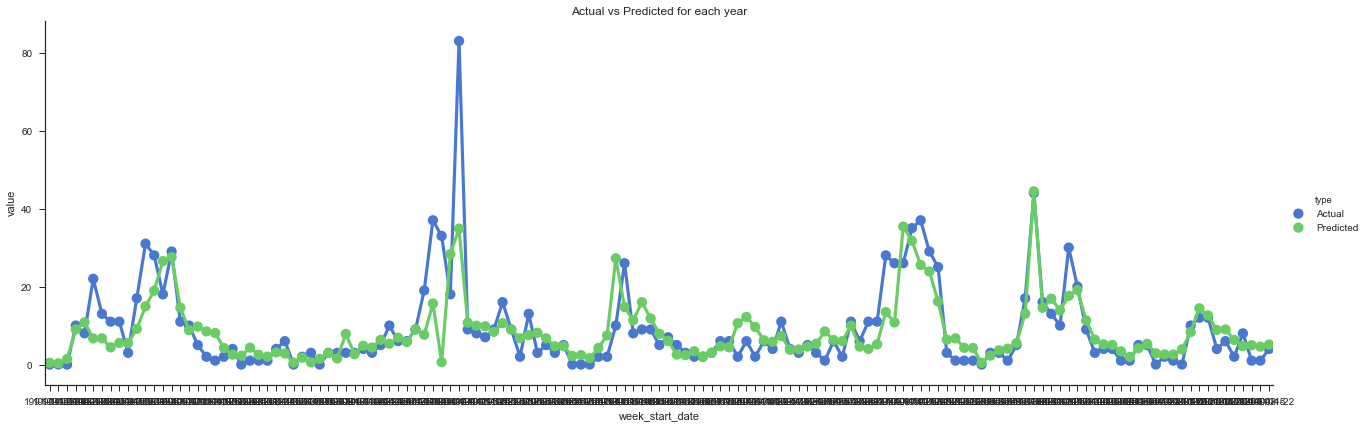

In [91]:
plot_d = plot_d.melt(id_vars=['city', 'year', 'weekofyear_x', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'odd_year', 'ndvi_mean', 'ndvi_mean_rolling_avg',
       'ndvi_ne_rolling_avg_x', 'ndvi_nw_rolling_avg_x',
       'ndvi_se_rolling_avg_x', 'ndvi_sw_rolling_avg',
       'precipitation_amt_mm_rolling_avg', 'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg',
       'reanalysis_max_air_temp_k_rolling_avg',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg_x',
       'reanalysis_relative_humidity_percent_rolling_avg',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg',
       'station_diur_temp_rng_c_rolling_avg',
       'station_max_temp_c_rolling_avg_x', 'station_min_temp_c_rolling_avg_x',
       'station_precip_mm_rolling_avg', 'ndvi_se_rolling_avg_y',
       'ndvi_ne_rolling_avg_y', 'ndvi_nw_rolling_avg_y', 'weekofyear_y',
       'station_max_temp_c_rolling_avg_y',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg_y',
       'station_min_temp_c_rolling_avg_y','residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=plot_d, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

### Final Model

In [92]:
xgb_preds_final_iq = xgb_reg.fit(train_features_iq, train_outcomes_iq).predict(
    data_test_iq_n[['ndvi_se_rolling_avg',
                'ndvi_ne_rolling_avg',
                'ndvi_nw_rolling_avg',
                'weekofyear',
                'station_max_temp_c_rolling_avg',
                'reanalysis_precip_amt_kg_per_m2_rolling_avg',
                'station_min_temp_c_rolling_avg']]
)

### Submission

In [93]:
submission_iq = data_test_iq[['city', 'year', 'weekofyear']].copy()
submission_iq['total_cases'] = np.round(xgb_preds_final_iq).astype(int)

In [94]:
frames = [submission_sj, submission_iq]
submission = pd.concat(frames)
submission.to_csv('xgb.csv', index = False)

## Decision Tree Regressor

After reading [this article](https://petolau.github.io/Regression-trees-for-forecasting-time-series-in-R/) we were inspired to try using decision trees.

We wanted to see if using a simple version of decision trees gave us a lesser mean absolute error and validate the idea of using XG Boost. Hence we used it.

## San Juan Decision Tree Regressor

### Training and Test Dataset

In [95]:
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n,
    data_sj['total_cases'],
    test_size = 0.3
)

### Feature Selection 
#### Recursive Feature Elimination

In [96]:
for n in range(1,20,1):
    
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(DecisionTreeRegressor(), n)
    fit = rfe.fit(test_features_sj, test_outcomes_sj)

    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj[data_sj_n.columns[fit.ranking_ == 1]],
        data_sj['total_cases'],
        test_size = 0.3
    )

    dt_reg = DecisionTreeRegressor()
    dt_preds_sj = dt_reg.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_sj, dt_preds_sj))

Features: 1 , MAE: 34.425689223057645
Features: 2 , MAE: 19.909774436090224
Features: 3 , MAE: 18.60902255639098
Features: 4 , MAE: 15.736842105263158
Features: 5 , MAE: 17.898496240601503
Features: 6 , MAE: 12.015037593984962
Features: 7 , MAE: 12.428571428571429
Features: 8 , MAE: 14.424812030075188
Features: 9 , MAE: 11.680451127819548
Features: 10 , MAE: 13.575187969924812
Features: 11 , MAE: 13.063909774436091
Features: 12 , MAE: 12.849624060150376
Features: 13 , MAE: 11.345864661654135
Features: 14 , MAE: 12.06766917293233
Features: 15 , MAE: 11.81578947368421
Features: 16 , MAE: 10.545112781954888
Features: 17 , MAE: 14.342105263157896
Features: 18 , MAE: 13.827067669172932
Features: 19 , MAE: 12.274436090225564


#### Feature Importance

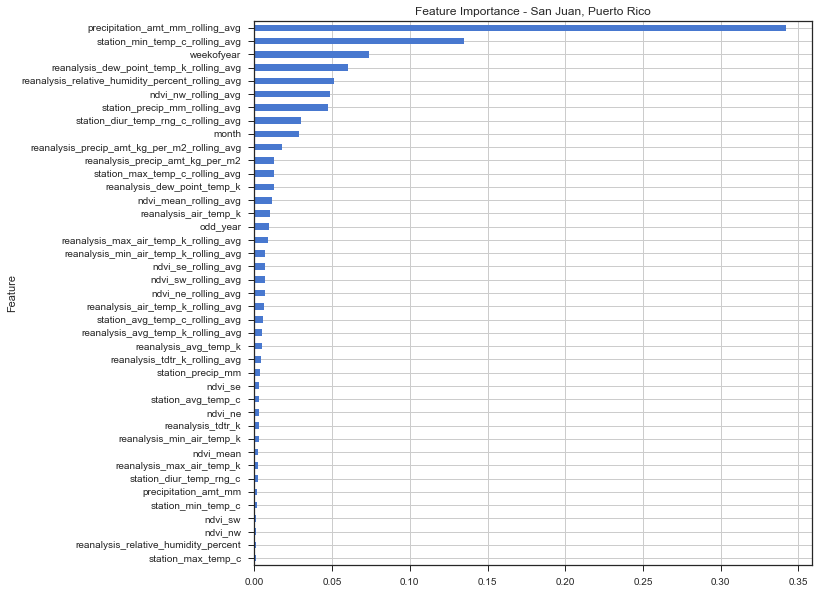

In [97]:
model = DecisionTreeRegressor()
feature_imp = pd.DataFrame({'Feature' : [], 'Importance' : []})
for i in range(1,20):
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )
    for i in range(1,20):
        model.fit(train_features_sj, train_outcomes_sj)
        imp = pd.DataFrame({'Feature': data_sj_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, figsize=(10,10))

### Updating Features

In [98]:
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n[['precipitation_amt_mm_rolling_avg',
                'weekofyear',
                'station_min_temp_c_rolling_avg',
                'reanalysis_dew_point_temp_k_rolling_avg',
                'station_precip_mm_rolling_avg',
                'reanalysis_relative_humidity_percent_rolling_avg',
                'ndvi_nw_rolling_avg']],
    data_sj['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation & Mean Absolute Error 

In [99]:
params = {'max_depth':range(5, 30)}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
dt_preds_sj = grid_search.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
dt_mae_sj = mean_absolute_error(test_outcomes_sj, dt_preds_sj)
dt_mdae_sj = median_absolute_error(test_outcomes_sj, dt_preds_sj)
dt_evs_sj = explained_variance_score(test_outcomes_sj, dt_preds_sj)
print(dt_mae_sj)

13.921697117417736


### Actual vs Predicted San Juan Decision Tree Scatter Plot

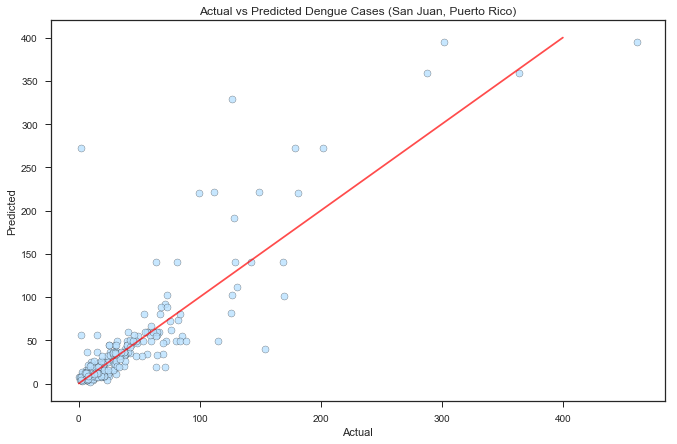

In [100]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (San Juan, Puerto Rico)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_sj, dt_preds_sj, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 400], [0, 400], 'red', alpha=0.7)

#### Residuals

Text(0.5,1,'Residuals')

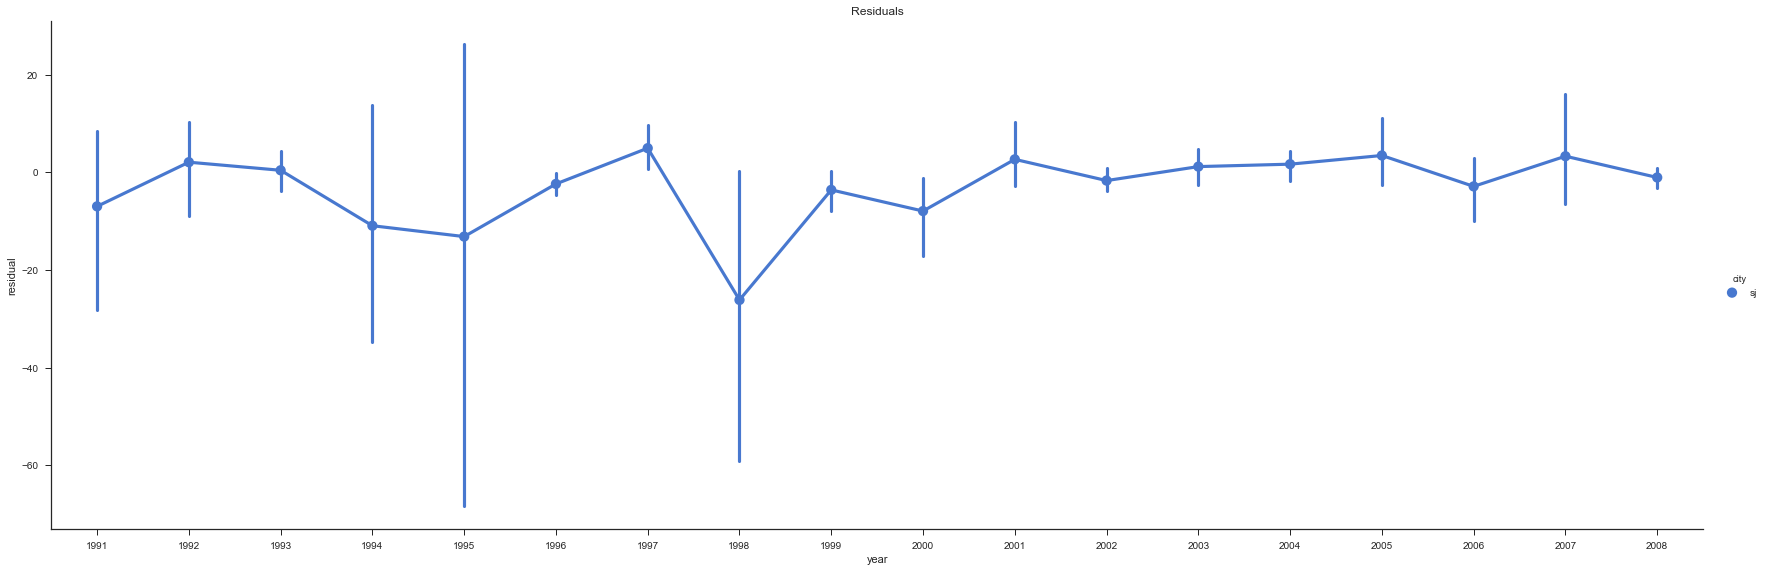

In [101]:
dt_preds_week_sj = pd.DataFrame(test_features_sj)
dt_preds_week_sj['Actual'] = test_outcomes_sj.values
dt_preds_week_sj['Predicted'] = dt_preds_sj
dt_preds_week_sj = pd.merge(data_sj, dt_preds_week_sj, left_index = True, right_index = True)
plot_d = dt_preds_week_sj.assign(residual=dt_preds_week_sj.Actual - dt_preds_week_sj .Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=plot_d)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

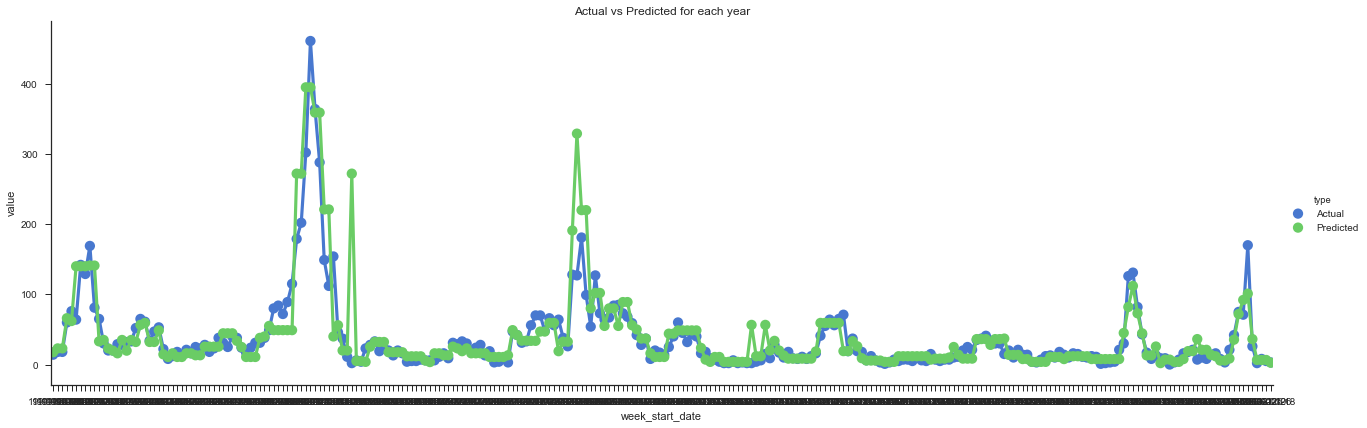

In [102]:
plot_d = plot_d.melt(id_vars=['city', 'year', 'weekofyear_x', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'odd_year', 'ndvi_mean', 'ndvi_mean_rolling_avg', 'ndvi_ne_rolling_avg',
       'ndvi_nw_rolling_avg_x', 'ndvi_se_rolling_avg', 'ndvi_sw_rolling_avg',
       'precipitation_amt_mm_rolling_avg_x',
       'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg_x',
       'reanalysis_max_air_temp_k_rolling_avg',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg',
       'reanalysis_relative_humidity_percent_rolling_avg_x',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg',
       'station_diur_temp_rng_c_rolling_avg', 'station_max_temp_c_rolling_avg',
       'station_min_temp_c_rolling_avg_x', 'station_precip_mm_rolling_avg_x',
       'precipitation_amt_mm_rolling_avg_y', 'weekofyear_y',
       'station_min_temp_c_rolling_avg_y',
       'reanalysis_dew_point_temp_k_rolling_avg_y',
       'station_precip_mm_rolling_avg_y',
       'reanalysis_relative_humidity_percent_rolling_avg_y',
       'ndvi_nw_rolling_avg_y','residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=plot_d, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

### Final Model

In [103]:
dt_preds_final_sj = dt_reg.fit(train_features_sj, train_outcomes_sj).predict(
    data_test_sj_n[['precipitation_amt_mm_rolling_avg',
                    'weekofyear',
                    'station_min_temp_c_rolling_avg',
                    'reanalysis_dew_point_temp_k_rolling_avg',
                    'station_precip_mm_rolling_avg',
                    'reanalysis_relative_humidity_percent_rolling_avg',
                    'ndvi_nw_rolling_avg']]
)

### Submission

In [104]:
submission_sj = data_test_sj[['city', 'year', 'weekofyear']].copy()
submission_sj['total_cases'] = np.round(dt_preds_final_sj).astype(int)

## Decision Tree Iquitos 

In [105]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n,
    data_iq['total_cases'],
    test_size = 0.3
)

### Feature Selection

#### Recursive Feature Elimination

In [106]:
for n in range(1,20,1):
    
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(DecisionTreeRegressor(), n)
    fit = rfe.fit(test_features_iq, test_outcomes_iq)

    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq[data_iq_n.columns[fit.ranking_ == 1]],
        data_iq['total_cases'],
        test_size = 0.3
    )

    dt_reg = DecisionTreeRegressor()
    dt_preds_iq = dt_reg.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_iq, dt_preds_iq))

Features: 1 , MAE: 9.624113475177305
Features: 2 , MAE: 7.00709219858156
Features: 3 , MAE: 7.98581560283688
Features: 4 , MAE: 5.368794326241135
Features: 5 , MAE: 4.98581560283688
Features: 6 , MAE: 5.51063829787234
Features: 7 , MAE: 5.453900709219858
Features: 8 , MAE: 5.319148936170213
Features: 9 , MAE: 4.574468085106383
Features: 10 , MAE: 5.3546099290780145
Features: 11 , MAE: 7.056737588652482
Features: 12 , MAE: 4.581560283687943
Features: 13 , MAE: 6.872340425531915
Features: 14 , MAE: 5.24113475177305
Features: 15 , MAE: 4.581560283687943
Features: 16 , MAE: 4.595744680851064
Features: 17 , MAE: 5.3546099290780145
Features: 18 , MAE: 5.070921985815603
Features: 19 , MAE: 6.425531914893617


#### Feature Importance

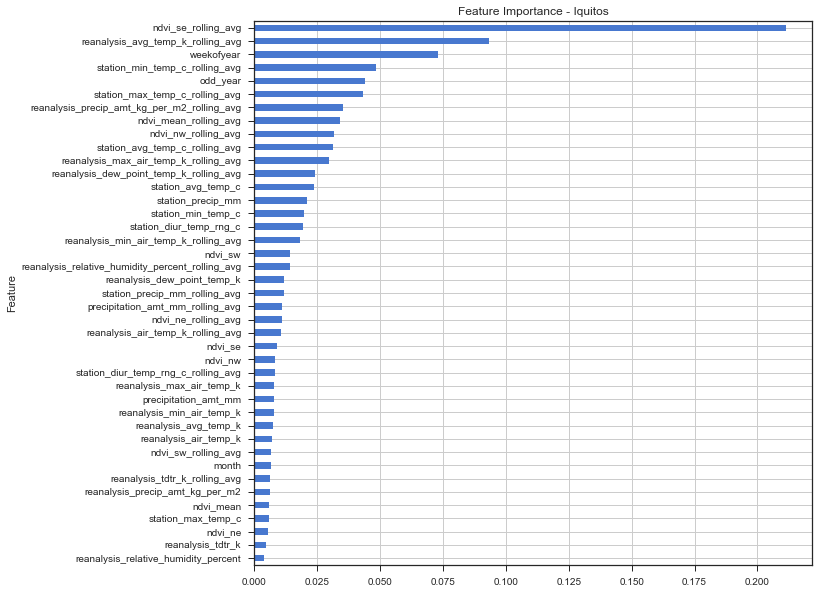

In [107]:
model = DecisionTreeRegressor()
feature_imp = pd.DataFrame({'Feature' : [], 'Importance' : []})
for i in range(1,20):
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )
    for i in range(1,20):
        model.fit(train_features_iq, train_outcomes_iq)
        imp = pd.DataFrame({'Feature': data_iq_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - Iquitos', grid = True, legend = False, figsize=(10,10))

#### Updating Features

In [108]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n[['ndvi_se_rolling_avg',
                'reanalysis_avg_temp_k_rolling_avg',
                'weekofyear',
                'station_avg_temp_c_rolling_avg',
                'reanalysis_max_air_temp_k_rolling_avg',
                'odd_year',
                'station_max_temp_c_rolling_avg',
                'reanalysis_min_air_temp_k_rolling_avg']],
    data_iq['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation & Margin of Error

In [109]:
params = {'n_estimators':range(5, 30)}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
dt_preds_iq = grid_search.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
dt_mae_iq = mean_absolute_error(test_outcomes_iq, dt_preds_iq)
dt_mdae_iq = median_absolute_error(test_outcomes_iq, dt_preds_iq)
dt_evs_iq = explained_variance_score(test_outcomes_iq, dt_preds_iq)
print(dt_mae_iq)

4.415130023640661


#### Actual vs Predicted Cases for Iquitos Decision Tree

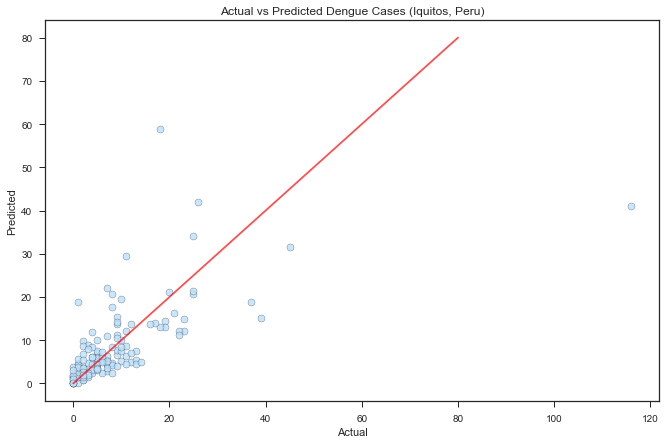

In [111]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (Iquitos, Peru)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_iq, dt_preds_iq, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 80], [0, 80], 'red', alpha=0.7)

#### Residuals

Text(0.5,1,'Residuals')

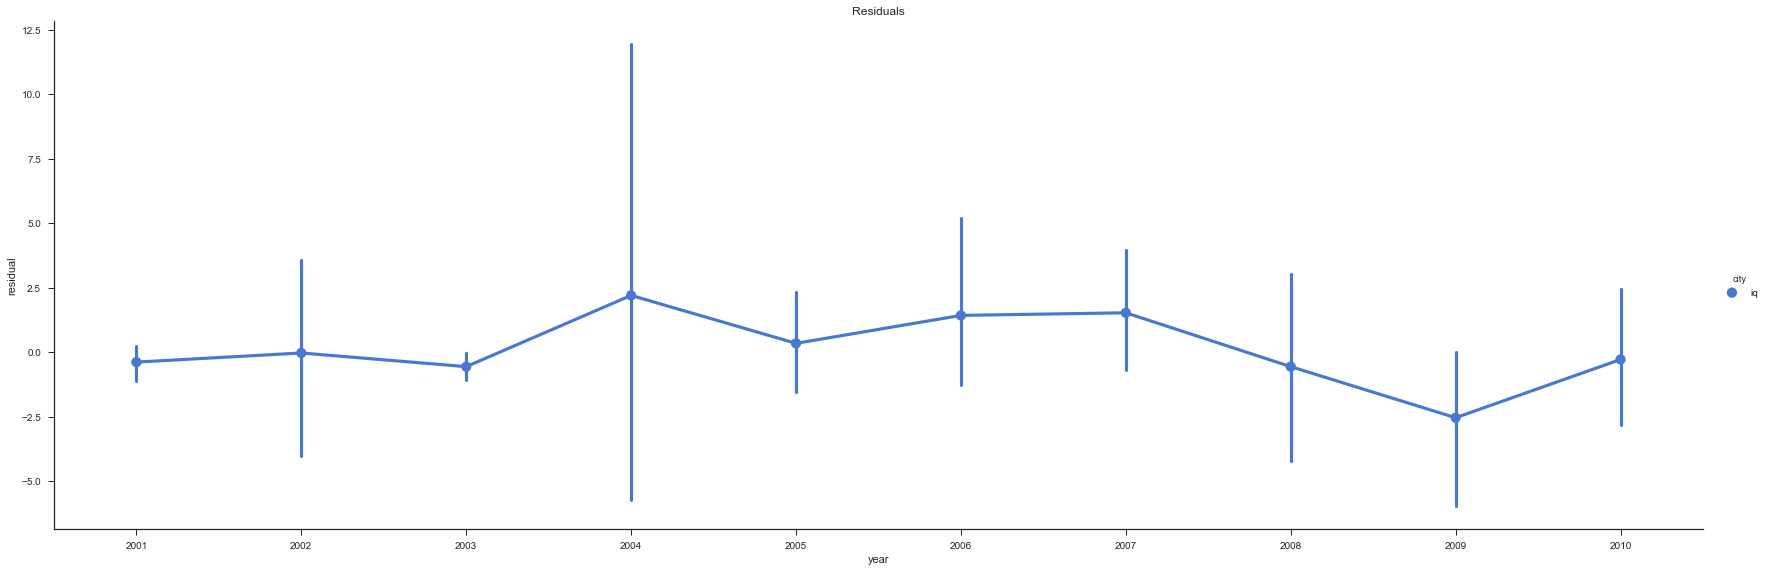

In [112]:
dt_preds_week_iq = pd.DataFrame(test_features_iq)
dt_preds_week_iq['Actual'] = test_outcomes_iq.values
dt_preds_week_iq['Predicted'] = dt_preds_iq
dt_preds_week_iq = pd.merge(data_iq, dt_preds_week_iq, left_index = True, right_index = True)
plot_d = dt_preds_week_iq.assign(residual=dt_preds_week_iq.Actual - dt_preds_week_iq .Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=plot_d)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

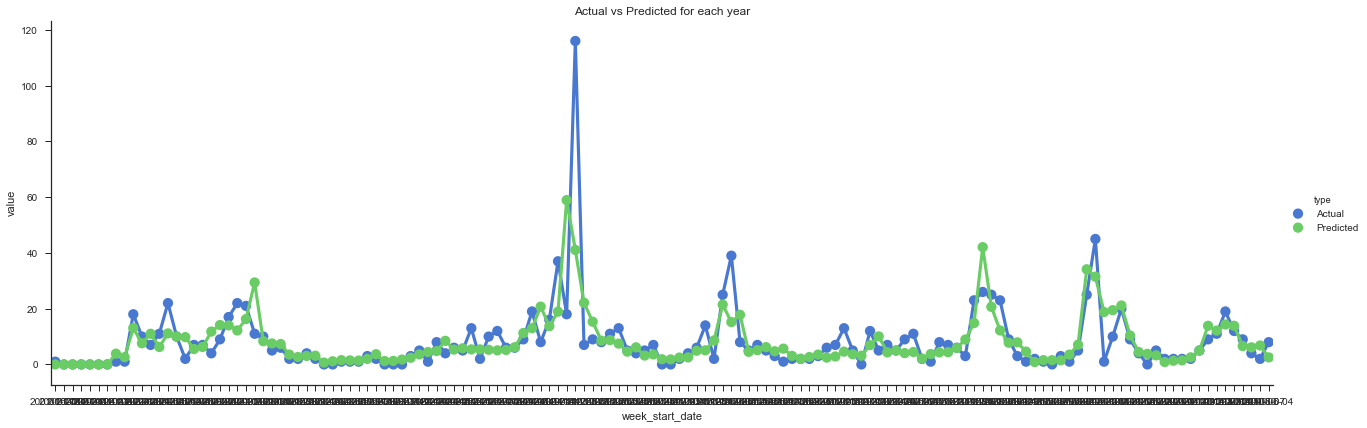

In [113]:
plot_d = plot_d.melt(id_vars=['city', 'year', 'weekofyear_x', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'odd_year_x', 'ndvi_mean', 'ndvi_mean_rolling_avg',
       'ndvi_ne_rolling_avg', 'ndvi_nw_rolling_avg', 'ndvi_se_rolling_avg_x',
       'ndvi_sw_rolling_avg', 'precipitation_amt_mm_rolling_avg',
       'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg_x',
       'reanalysis_dew_point_temp_k_rolling_avg',
       'reanalysis_max_air_temp_k_rolling_avg_x',
       'reanalysis_min_air_temp_k_rolling_avg_x',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg',
       'reanalysis_relative_humidity_percent_rolling_avg',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg_x',
       'station_diur_temp_rng_c_rolling_avg',
       'station_max_temp_c_rolling_avg_x', 'station_min_temp_c_rolling_avg',
       'station_precip_mm_rolling_avg', 'ndvi_se_rolling_avg_y',
       'reanalysis_avg_temp_k_rolling_avg_y', 'weekofyear_y',
       'station_avg_temp_c_rolling_avg_y',
       'reanalysis_max_air_temp_k_rolling_avg_y', 'odd_year_y',
       'station_max_temp_c_rolling_avg_y',
       'reanalysis_min_air_temp_k_rolling_avg_y','residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=plot_d, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

### Final Model

In [114]:
dt_preds_final_iq = dt_reg.fit(train_features_iq, train_outcomes_iq).predict(
    data_test_iq_n[['ndvi_se_rolling_avg',
                    'reanalysis_avg_temp_k_rolling_avg',
                    'weekofyear',
                    'station_avg_temp_c_rolling_avg',
                    'reanalysis_max_air_temp_k_rolling_avg',
                    'odd_year',
                    'station_max_temp_c_rolling_avg',
                    'reanalysis_min_air_temp_k_rolling_avg']]
)

### Submissions

In [115]:
submission_iq = data_test_iq[['city', 'year', 'weekofyear']].copy()
submission_iq['total_cases'] = np.round(dt_preds_final_iq).astype(int)

In [116]:
frames = [submission_sj, submission_iq]
submission = pd.concat(frames)
submission.to_csv('randomforest.csv', index = False)

## Random Forest Regression

[This article](http://astrohackweek.org/blog/time-series-rf.html) helped introduce us to how random forest regression is used for time series forecasting. Since our task is forecasting the total cases we decided to trying using random forest due to it's advantages over a simple decision tree. 

## San Juan Random Forest Regression

### Training and Test Data Split

In [117]:
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n,
    data_sj['total_cases'],
    test_size = 0.3
)

### Feature Selection
#### Recursive Feature Elimination

In [118]:
from sklearn.feature_selection import RFE

for n in range(1,20,1):
    
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(RandomForestRegressor(), n)
    fit = rfe.fit(test_features_sj, test_outcomes_sj)

    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj[data_sj_n.columns[fit.ranking_ == 1]],
        data_sj['total_cases'],
        test_size = 0.3
    )

    rf_reg = RandomForestRegressor()
    rf_preds_sj = rf_reg.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_sj, rf_preds_sj))

Features: 1 , MAE: 32.35543561284163
Features: 2 , MAE: 21.851879699248123
Features: 3 , MAE: 14.106766917293234
Features: 4 , MAE: 12.383082706766915
Features: 5 , MAE: 9.141729323308272
Features: 6 , MAE: 10.824436090225564
Features: 7 , MAE: 12.757518796992482
Features: 8 , MAE: 12.078571428571427
Features: 9 , MAE: 9.234586466165412
Features: 10 , MAE: 10.472556390977445
Features: 11 , MAE: 11.655639097744363
Features: 12 , MAE: 12.851503759398497
Features: 13 , MAE: 9.752255639097744
Features: 14 , MAE: 11.826315789473686
Features: 15 , MAE: 10.12218045112782
Features: 16 , MAE: 12.781954887218046
Features: 17 , MAE: 11.501127819548874
Features: 18 , MAE: 12.01654135338346
Features: 19 , MAE: 11.009398496240602


#### Random Forest Feature Importance

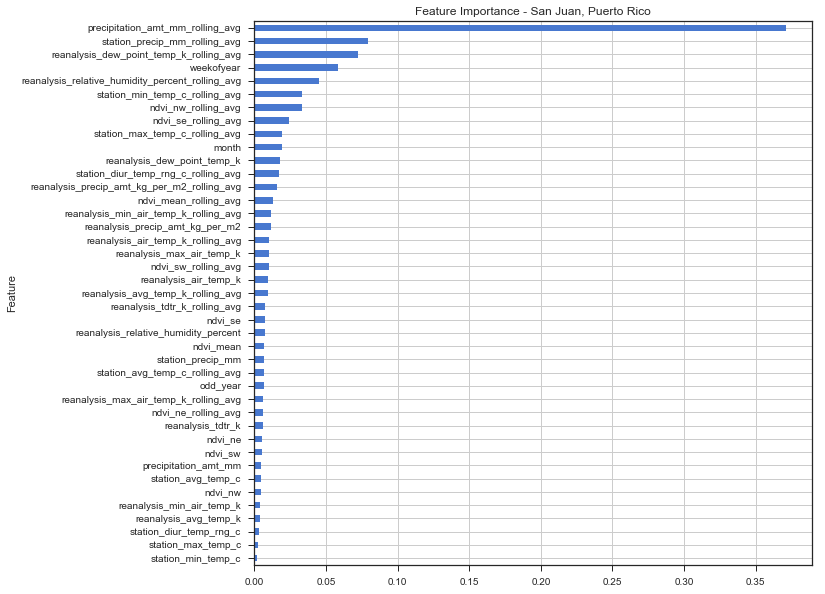

In [119]:
model = RandomForestRegressor()
feature_imp = pd.DataFrame({'Feature' : [], 'Importance' : []})
for i in range(1,10):
    train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
        data_sj_n,
        data_sj['total_cases'],
        test_size = 0.3
    )
    for i in range(1,10):
        model.fit(train_features_sj, train_outcomes_sj)
        imp = pd.DataFrame({'Feature': data_sj_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, figsize=(10,10))

### Updating Features

In [120]:
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    data_sj_n[['precipitation_amt_mm_rolling_avg',
                'reanalysis_dew_point_temp_k_rolling_avg',
                'month',
                'ndvi_nw_rolling_avg',
                'reanalysis_relative_humidity_percent_rolling_avg',
                'ndvi_se_rolling_avg']],
    data_sj['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation & Mean Absolute Error

In [121]:
params = {'n_estimators':range(5, 30)}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
rf_preds_sj = grid_search.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
rf_mae_sj = mean_absolute_error(test_outcomes_sj, rf_preds_sj)
rf_mdae_sj = median_absolute_error(test_outcomes_sj, rf_preds_sj)
rf_evs_sj = explained_variance_score(test_outcomes_sj, rf_preds_sj)
print(rf_mae_sj)

12.363721804511279


### Actual vs Predicted San Juan Random Forest Scatter Plot

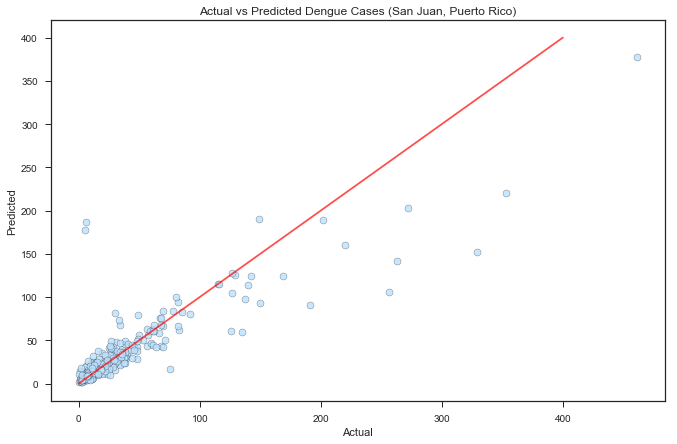

In [122]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (San Juan, Puerto Rico)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_sj, rf_preds_sj, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 400], [0, 400], 'red', alpha=0.7)

#### Residuals

Text(0.5,1,'Residuals')

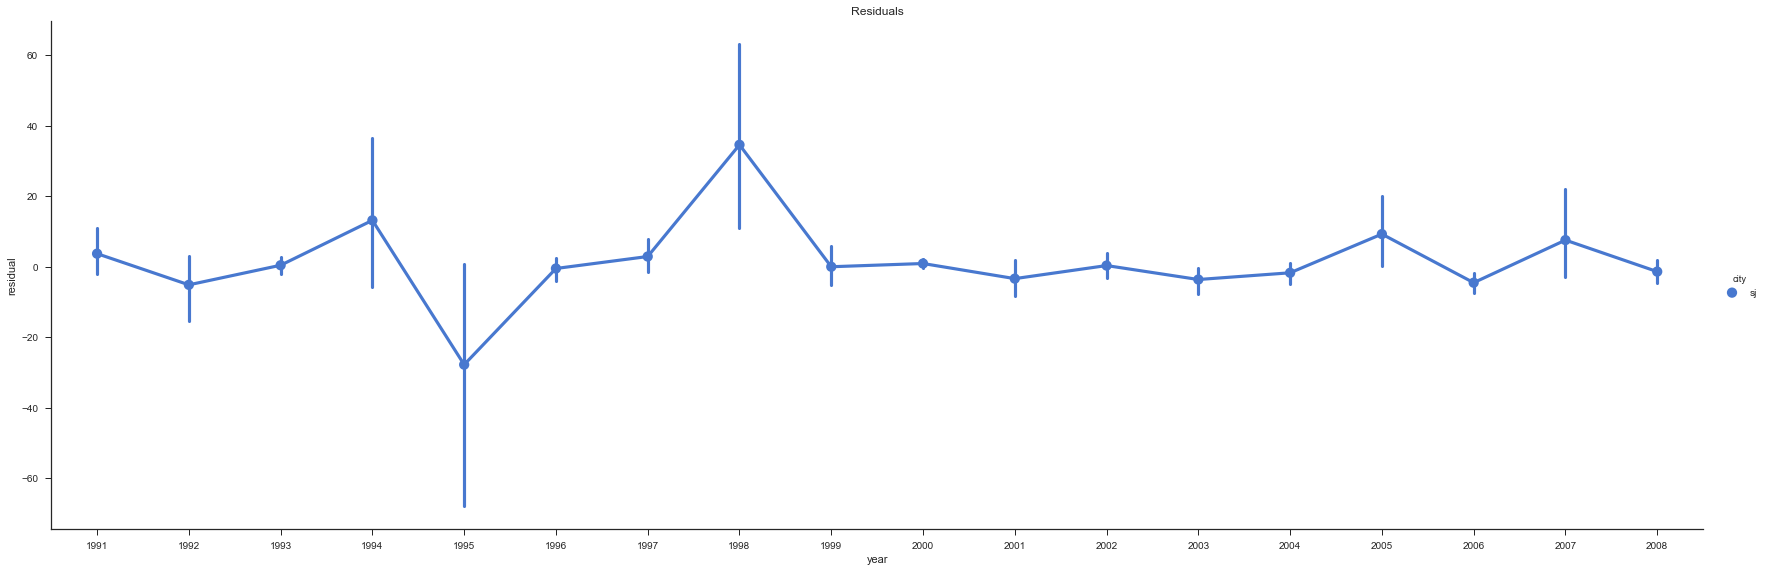

In [123]:
rf_preds_week_sj = pd.DataFrame(test_features_sj)
rf_preds_week_sj['Actual'] = test_outcomes_sj.values
rf_preds_week_sj['Predicted'] = rf_preds_sj
rf_preds_week_sj = pd.merge(data_sj, rf_preds_week_sj, left_index = True, right_index = True)
plot_d = rf_preds_week_sj.assign(residual=rf_preds_week_sj.Actual - rf_preds_week_sj .Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=plot_d)
plt.title("Residuals")

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Actual vs Predicted for each year')

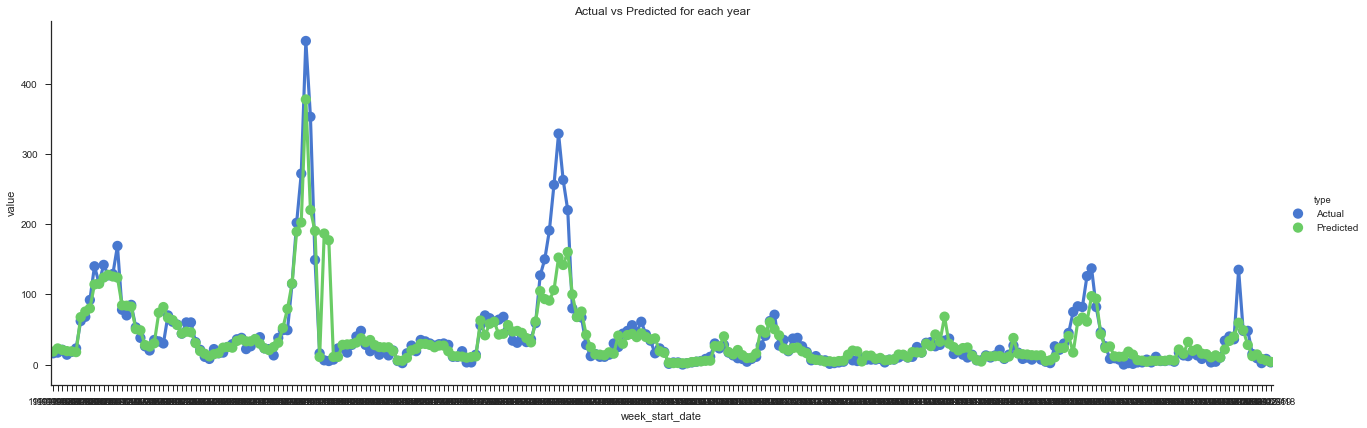

In [124]:
plot_d = plot_d.melt(id_vars=['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_x',
       'odd_year', 'ndvi_mean', 'ndvi_mean_rolling_avg', 'ndvi_ne_rolling_avg',
       'ndvi_nw_rolling_avg_x', 'ndvi_se_rolling_avg_x', 'ndvi_sw_rolling_avg',
       'precipitation_amt_mm_rolling_avg_x',
       'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg',
       'reanalysis_dew_point_temp_k_rolling_avg_x',
       'reanalysis_max_air_temp_k_rolling_avg',
       'reanalysis_min_air_temp_k_rolling_avg',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg',
       'reanalysis_relative_humidity_percent_rolling_avg_x',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg',
       'station_diur_temp_rng_c_rolling_avg', 'station_max_temp_c_rolling_avg',
       'station_min_temp_c_rolling_avg', 'station_precip_mm_rolling_avg',
       'precipitation_amt_mm_rolling_avg_y',
       'reanalysis_dew_point_temp_k_rolling_avg_y', 'month_y',
       'ndvi_nw_rolling_avg_y',
       'reanalysis_relative_humidity_percent_rolling_avg_y',
       'ndvi_se_rolling_avg_y','residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=plot_d, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

### Final Model

In [125]:
rf_preds_final_sj = rf_reg.fit(train_features_sj, train_outcomes_sj).predict(
    data_test_sj_n[['precipitation_amt_mm_rolling_avg',
                'reanalysis_dew_point_temp_k_rolling_avg',
                'month',
                'ndvi_nw_rolling_avg',
                'reanalysis_relative_humidity_percent_rolling_avg',
                'ndvi_se_rolling_avg']]
)

### Submission  for San Juan

In [126]:
submission_sj = data_test_sj[['city', 'year', 'weekofyear']].copy()
submission_sj['total_cases'] = np.round(rf_preds_final_sj).astype(int)

## Iquitos Random Forest Regression

### Training and Test Data

In [127]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n,
    data_iq['total_cases'],
    test_size = 0.3
)

### Feature Selection 
#### Recursive Feature Elimination

In [128]:
from sklearn.feature_selection import RFE

for n in range(1,20,1):
    
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )

    rfe = RFE(RandomForestRegressor(), n)
    fit = rfe.fit(test_features_iq, test_outcomes_iq)

    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq[data_iq_n.columns[fit.ranking_ == 1]],
        data_iq['total_cases'],
        test_size = 0.3
    )

    rf_reg = RandomForestRegressor()
    rf_preds_iq = rf_reg.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
    print('Features:', n, ', MAE:', mean_absolute_error(test_outcomes_iq, rf_preds_iq))

Features: 1 , MAE: 7.2444444444444445
Features: 2 , MAE: 7.494326241134754
Features: 3 , MAE: 4.5113475177304965
Features: 4 , MAE: 5.922695035460992
Features: 5 , MAE: 4.235460992907802
Features: 6 , MAE: 4.300709219858156
Features: 7 , MAE: 4.180141843971631
Features: 8 , MAE: 4.411347517730497
Features: 9 , MAE: 4.428368794326241
Features: 10 , MAE: 5.15531914893617
Features: 11 , MAE: 4.278723404255318
Features: 12 , MAE: 4.150354609929077
Features: 13 , MAE: 4.182978723404255
Features: 14 , MAE: 3.931205673758865
Features: 15 , MAE: 4.375886524822695
Features: 16 , MAE: 4.2858156028368795
Features: 17 , MAE: 5.041843971631206
Features: 18 , MAE: 4.87872340425532
Features: 19 , MAE: 4.546808510638298


#### Feature Importance

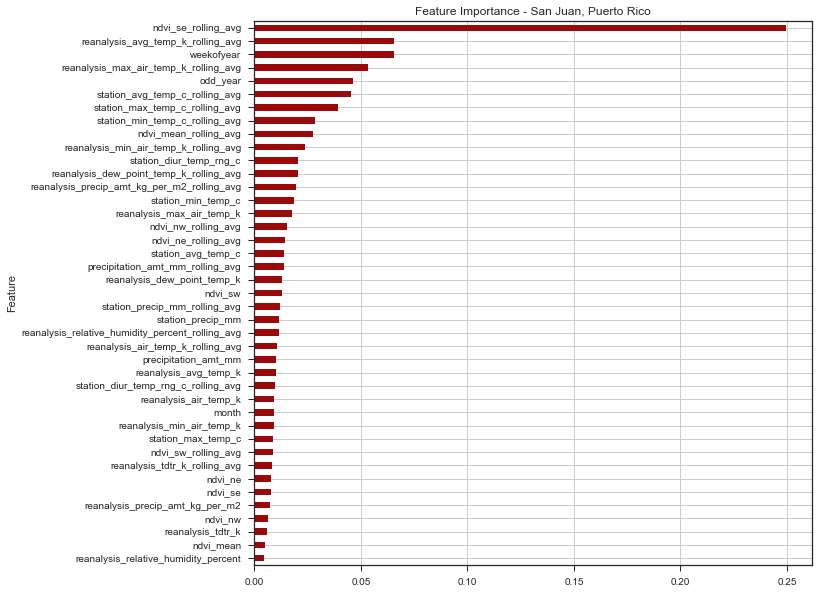

In [129]:
model = RandomForestRegressor()
feature_imp = pd.DataFrame({'Feature' : [], 'Importance' : []})
for i in range(1,10):
    train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
        data_iq_n,
        data_iq['total_cases'],
        test_size = 0.3
    )
    for i in range(1,10):
        model.fit(train_features_iq, train_outcomes_iq)
        imp = pd.DataFrame({'Feature': data_iq_n.columns, 'Importance':model.feature_importances_})
        frames = [feature_imp, imp]
        feature_imp = pd.concat(frames).reset_index(drop = True)
feature_imp = feature_imp.groupby(['Feature'])['Importance'].mean().to_frame(name = 'Importance').reset_index()
feature_imp = feature_imp.set_index('Feature')
feature_imp.sort_values(by='Importance').plot(kind='barh', title='Feature Importance - San Juan, Puerto Rico', grid = True, legend = False, color = '#9b0a0a', figsize=(10,10))

### Updating Features

In [130]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    data_iq_n[['ndvi_se_rolling_avg',
                'reanalysis_avg_temp_k_rolling_avg',
                'weekofyear',
                'station_avg_temp_c_rolling_avg',
                'reanalysis_max_air_temp_k_rolling_avg',
                'odd_year',
                'station_max_temp_c_rolling_avg',
                'reanalysis_min_air_temp_k_rolling_avg']],
    data_iq['total_cases'],
    test_size = 0.3
)

### Grid Search & Cross Validation & Mean Absolute Error

In [131]:
params = {'n_estimators':range(5, 30)}
folds = KFold(n_splits = 10, shuffle=True)
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=folds, scoring='neg_mean_absolute_error')
rf_preds_iq = grid_search.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
rf_mae_iq = mean_absolute_error(test_outcomes_iq, rf_preds_iq)
rf_mdae_iq = median_absolute_error(test_outcomes_iq, rf_preds_iq)
rf_evs_iq = explained_variance_score(test_outcomes_iq, rf_preds_iq)
print(rf_mae_iq)

3.7488716956802057


### Actual vs Predicted Iquitos Random Forest

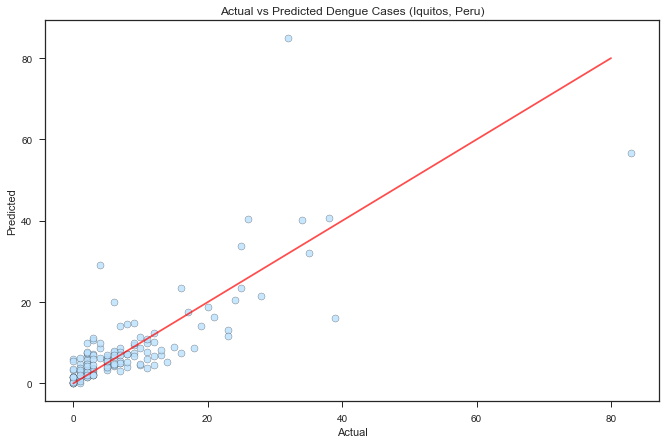

In [132]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (Iquitos, Peru)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(test_outcomes_iq, rf_preds_iq, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 80], [0, 80], 'red', alpha=0.7)

#### Residuals

In [133]:
rf_preds_week_iq = pd.DataFrame(test_features_iq)
rf_preds_week_iq['Actual'] = test_outcomes_iq.values
rf_preds_week_iq['Predicted'] = rf_preds_iq
rf_preds_week_iq = pd.merge(data_iq, rf_preds_week_iq, left_index = True, right_index = True)

#### Actual Vs Predicted Time Series Line Graph

Text(0.5,1,'Residuals')

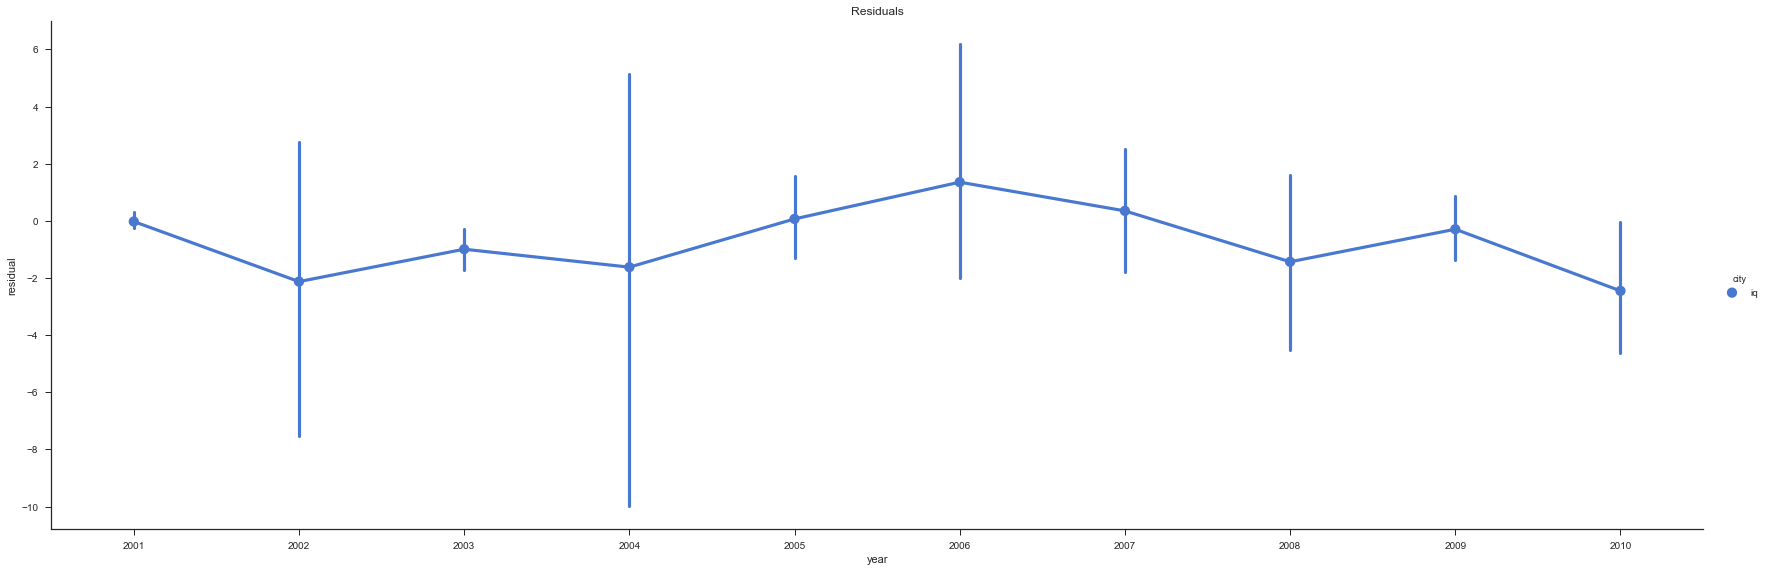

In [134]:
plot_d = rf_preds_week_iq.assign(residual=rf_preds_week_iq.Actual - rf_preds_week_iq .Predicted)
sns.factorplot(x="year", y="residual", hue="city", size=8, aspect=3,data=plot_d)
plt.title("Residuals")

Text(0.5,1,'Actual vs Predicted for each year')

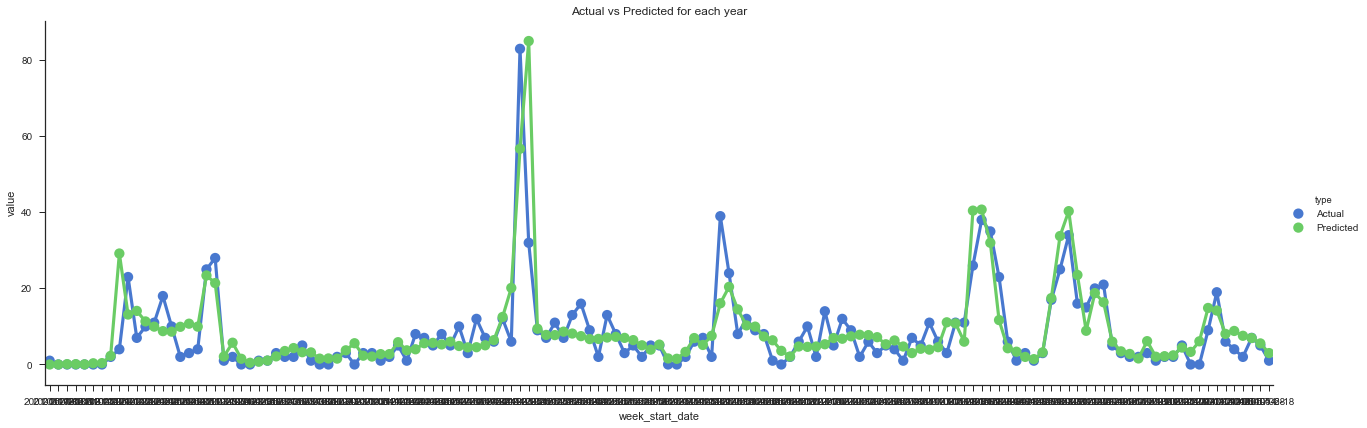

In [135]:
plot_d = plot_d.melt(id_vars=['city', 'year', 'weekofyear_x', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month',
       'odd_year_x', 'ndvi_mean', 'ndvi_mean_rolling_avg',
       'ndvi_ne_rolling_avg', 'ndvi_nw_rolling_avg', 'ndvi_se_rolling_avg_x',
       'ndvi_sw_rolling_avg', 'precipitation_amt_mm_rolling_avg',
       'reanalysis_air_temp_k_rolling_avg',
       'reanalysis_avg_temp_k_rolling_avg_x',
       'reanalysis_dew_point_temp_k_rolling_avg',
       'reanalysis_max_air_temp_k_rolling_avg_x',
       'reanalysis_min_air_temp_k_rolling_avg_x',
       'reanalysis_precip_amt_kg_per_m2_rolling_avg',
       'reanalysis_relative_humidity_percent_rolling_avg',
       'reanalysis_tdtr_k_rolling_avg', 'station_avg_temp_c_rolling_avg_x',
       'station_diur_temp_rng_c_rolling_avg',
       'station_max_temp_c_rolling_avg_x', 'station_min_temp_c_rolling_avg',
       'station_precip_mm_rolling_avg', 'ndvi_se_rolling_avg_y',
       'reanalysis_avg_temp_k_rolling_avg_y', 'weekofyear_y',
       'station_avg_temp_c_rolling_avg_y',
       'reanalysis_max_air_temp_k_rolling_avg_y', 'odd_year_y',
       'station_max_temp_c_rolling_avg_y',
       'reanalysis_min_air_temp_k_rolling_avg_y','residual'], var_name='type')

sns.factorplot(x='week_start_date', y="value", hue="type", data=plot_d, size = 6, aspect =3)
plt.title("Actual vs Predicted for each year")

### Final Model Submission

In [136]:
rf_preds_final_iq = rf_reg.fit(train_features_iq, train_outcomes_iq).predict(
    data_test_iq_n[['ndvi_se_rolling_avg',
                    'reanalysis_avg_temp_k_rolling_avg',
                    'weekofyear',
                    'station_avg_temp_c_rolling_avg',
                    'reanalysis_max_air_temp_k_rolling_avg',
                    'odd_year',
                    'station_max_temp_c_rolling_avg',
                    'reanalysis_min_air_temp_k_rolling_avg']]
)

In [137]:
submission_iq = data_test_iq[['city', 'year', 'weekofyear']].copy()
submission_iq['total_cases'] = np.round(rf_preds_final_iq).astype(int)

In [138]:
frames = [submission_sj, submission_iq]
submission = pd.concat(frames)
submission.to_csv('rf.csv', index = False)

## One Hot Encoding (Adding Dummies) with KNN

We will encode categorical integer features using a one-hot aka one-of-K scheme. we use one hot encoder to perform “binarization” of the category and include it as a feature to train the model. A 1 in a particular column will tell the computer the correct category for that row’s data. In other words, we have created an additional binary column for each category.

Refferred to:

* https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

* https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

### Creating Dummies

In [139]:
sj = data_sj.copy()
sj_dum = pd.get_dummies(sj, prefix=['weekofyear', 'month'], columns=['weekofyear', 'month'])
sj_dum = sj_dum.drop(['city', 'week_start_date'], axis=1)

iq = data_iq.copy()
iq_dum = pd.get_dummies(iq, prefix=['weekofyear', 'month'], columns=['weekofyear', 'month'])
iq_dum = iq_dum.drop(['city', 'week_start_date'], axis=1)

test_sj = data_test_sj.copy()
test_sj_dum = pd.get_dummies(test_sj, prefix=['weekofyear', 'month'], columns=['weekofyear', 'month'])
test_sj_dum  = test_sj_dum.drop(['city', 'week_start_date'], axis=1)

### San Juan

In [140]:
train_features_sj, test_features_sj, train_outcomes_sj, test_outcomes_sj = train_test_split(
    sj_dum,
    data_sj['total_cases'],
    test_size = 0.3
)

reg = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', KNeighborsRegressor(n_neighbors = 4, weights = 'distance'))
])

reg = reg.fit(train_features_sj, train_outcomes_sj).predict(test_features_sj)
print(mean_absolute_error(test_outcomes_sj, reg))

4.735043367947577


## Iquitos

In [141]:
train_features_iq, test_features_iq, train_outcomes_iq, test_outcomes_iq = train_test_split(
    iq_dum,
    data_iq['total_cases'],
    test_size = 0.3
)

reg = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', KNeighborsRegressor(n_neighbors = 4, weights = 'distance'))
])

reg = reg.fit(train_features_iq, train_outcomes_iq).predict(test_features_iq)
print(mean_absolute_error(test_outcomes_iq, reg))

5.225599372641924


## Why did we did not use dummies?

1. We received a better margin of error using KNN (our best model) without dummies on Driven Data
2. We could have worked more on optimizing this but due to time constraints we could not

# Comparision of Models

In [142]:
algs_mae = pd.DataFrame({'San Juan': [knr_mae_sj, xgb_mae_sj, dt_mae_sj, rf_mae_sj],
                      'Iquitos': [knr_mae_iq, xgb_mae_iq, dt_mae_iq,rf_mae_iq]},
                      index=['KNN', 'XGBoost', 'DecisionTree', 'RandomForest'])

algs_mdae = pd.DataFrame({'San Juan': [knr_mdae_sj, xgb_mdae_sj, dt_mdae_sj, rf_mdae_sj],
                      'Iquitos': [knr_mdae_iq, xgb_mdae_iq, dt_mdae_iq,rf_mdae_iq]},
                      index=['KNN', 'XGBoost', 'DecisionTree', 'RandomForest'])

algs_evs = pd.DataFrame({'San Juan': [knr_evs_sj, xgb_evs_sj, dt_evs_sj, rf_evs_sj],
                      'Iquitos': [knr_evs_iq, xgb_evs_iq, dt_evs_iq,rf_evs_iq]},
                      index=['KNN', 'XGBoost', 'DecisionTree', 'RandomForest'])

In [149]:
print("Mean Absolute Error")
print("XG Boost has the lowest MAE")
algs_mae

Mean Absolute Error
XG Boost has the lowest MAE


San Juan   Iquitos
KNN            9.547511  3.776723
XGBoost        7.587810  4.195427
DecisionTree  13.921697  4.415130
RandomForest  12.363722  3.748872

In [150]:
print("Median Absolute Error")
print("Random Forest has the lowest MDAE")
algs_mdae

Median Absolute Error
Random Forest has the lowest MDAE


San Juan   Iquitos
KNN           4.527511  2.253439
XGBoost       4.557379  2.438111
DecisionTree  6.000000  2.133333
RandomForest  4.732143  1.727273

In [151]:
print("Explained Variance Score")
print("Decision Tree has the best Explained Variance Score")
algs_evs

Explained Variance Score
Decision Tree has the best Explained Variance Score


San Juan   Iquitos
KNN           0.853981  0.497566
XGBoost       0.930455  0.582080
DecisionTree  0.677907  0.439068
RandomForest  0.749952  0.548072

Let us visualize this and see how the models compare to each other. 

Text(0,0.5,'Mean Abs Error')

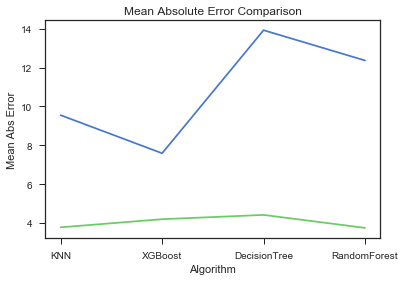

In [143]:
plt.subplots(figsize=(6,4))
plt.plot(algs_mae)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Mean Abs Error')

Text(0,0.5,'Median Abs Error')

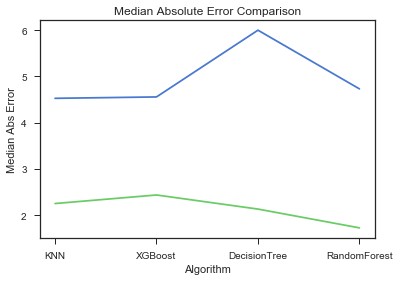

In [144]:
plt.subplots(figsize=(6,4))
plt.plot(algs_mdae)
plt.title('Median Absolute Error Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Median Abs Error')

Text(0,0.5,'Explained Variance Score')

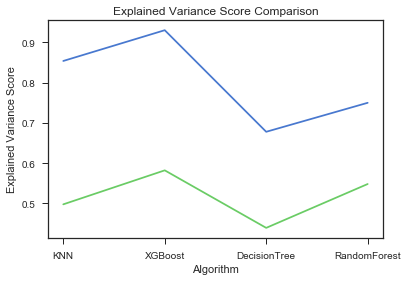

In [145]:
plt.subplots(figsize=(6,4))
plt.plot(algs_evs)
plt.title('Explained Variance Score Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Explained Variance Score')

----
Thank You

Best Model: KNN (Score: 19.4533)